---


| | |
|---|---|
| **Autor notatnika** | Damian Sałkowski |
| **Wersja** | 1.0 |
| **Wydawca** | [sensai.academy](https://sensai.academy/) |
| **Lekcja** | Komunikacja z API Modeli Językowych |
| **Tydzień programu** | 2 |
| **Pytania? Napisz na discord. 📩 ** | **damian_17365** |


---


# Komunikacja z API Modeli Językowych


Witamy w notatniku poświęconym komunikacji z API popularnych modeli językowych, takich jak GPT (OpenAI) czy Gemini (Google). W tej lekcji zgłębimy podstawy interakcji z tymi potężnymi narzędziami za pomocą kodu Python. Nauczymy się, jak wysyłać zapytania (prompty) do modeli, odbierać i przetwarzać ich odpowiedzi, a także jak zarządzać kluczami API w bezpieczny sposób.

#**❗️ Ważne: Zanim zaczniesz, zrób kopię tego notatnika!**

Aby móc edytować, uruchamiać kod i zapisywać zmiany, musisz pracować na własnej kopii tego pliku.

**Jak skopiować notatnik w Google Colab:**
1.  Przejdź do menu na górze strony.
2.  Kliknij **`Plik`**.
3.  Z rozwijanego menu wybierz opcję **`Zapisz kopię na Dysku`**.
4.  Nowa karta otworzy się z Twoją osobistą kopią notatnika (nazwa pliku będzie zaczynać się od "Kopia notatnika...").
5.  **Wszystkie dalsze kroki wykonuj w tej nowo otwartej kopii.**

## 1. Wprowadzenie do API Modeli Językowych

Interfejsy programowania aplikacji (API) działają jako pośrednicy, umożliwiając różnym aplikacjom komunikowanie się i wymianę danych. API Modeli Językowych w szczególności umożliwiają specjalistom SEO programowy dostęp i wykorzystanie mocy LLM do różnych zadań związanych z SEO. Ten programowy dostęp pozwala na automatyzację, skalowalność i integrację z istniejącymi narzędziami i przepływami pracy SEO. API Modeli Językowych stanowią zatem niezbędny pomost, który pozwala specjalistom SEO wyjść poza proste korzystanie z narzędzi opartych na SI z interfejsem użytkownika i bezpośrednio integrować możliwości SI z ich niestandardowymi rozwiązaniami i zautomatyzowanymi procesami.

Celem tej lekcji jest wyjaśnienie, jak komunikować się z API Modeli Językowych, ze szczególnym uwzględnieniem protokołu HTTP, kluczowych koncepcji API, powszechnych metod komunikacji, popularnych usług i ich zastosowań w SEO.

In [ ]:
#@title Instalacja bibliotek
# Zainstalujemy biblioteki potrzebne do komunikacji z API oraz do wykonywania bezpośrednich żądań HTTP.
!pip install openai google-generativeai anthropic httpx requests --quiet
print("Biblioteki zainstalowane!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 5.7 MB/s eta 0:00:00
Biblioteki zainstalowane!


## 2. Konfiguracja Kluczy API

Aby korzystać z API komercyjnych usług, takich jak OpenAI, Google Gemini, Anthropic Claude, Mistral AI czy Jina AI, potrzebujesz kluczy API. Te klucze służą do uwierzytelniania Twoich żądań i śledzenia Twojego użycia (co jest ważne, ponieważ korzystanie z API jest zazwyczaj płatne).

**Ważne:** Nigdy nie udostępniaj swoich kluczy API i nie umieszczaj ich bezpośrednio w kodzie, który będziesz publikować lub udostępniać! Najbezpieczniejszym sposobem jest przechowywanie ich w zmiennych środowiskowych, najlepiej za pomocą **Colab Secrets**.

Poniżej znajduje się komórka kodu z formularzem, w którym możesz wprowadzić swoje klucze API. Jeśli nie masz klucza dla danej usługi, możesz zostawić pole puste.

**Instrukcja dodawania kluczy do Colab Secrets:**

1.  Po lewej stronie interfejsu Colab, znajdź ikonę "klucza" (🔑 Sekrety), kliknij ją.
2.  Kliknij "Dodaj nowy sekret".
3.  W polu "Nazwa" wpisz dokładnie jedną z nazw kluczy użytych w skrypcie poniżej (np. `SECRET_OPENAI_API_KEY`).
4.  W polu "Wartość" wklej swój klucz API skopiowany z panelu dostawcy usługi.
5.  Upewnij się, że przełącznik "Notebook access" jest włączony dla tego sekretu.
6.  Powtórz dla każdego klucza, którego chcesz użyć.

Skrypt poniżej odczyta klucze z Colab Secrets i ustawi je jako zmienne środowiskowe, które biblioteki API automatycznie wykryją.

In [ ]:
#@title Wprowadź klucze API (z Colab Secrets)

# Ważne: Klucze API najlepiej przechowywać w bezpieczny sposób, np. w Google Colab Secrets.
# Po lewej stronie interfejsu Colab, znajdź ikonę "klucza" (Sekrety), kliknij ją, a następnie
# dodaj nowe sekrety o nazwach zgodnych z poniższymi zmiennymi (np. SECRET_OPENAI_API_KEY).
# Wartości kluczy skopiuj z panelu dostawcy usługi.
# Ta komórka pobierze klucze z Colab Secrets i ustawi je jako zmienne środowiskowe.
# Jeśli nie masz klucza dla danej usługi, możesz pominąć dodawanie go do sekretów i jego pole zostanie puste.

import os
from google.colab import userdata

#@markdown Klucz OpenAI: Znajdź na https://platform.openai.com/account/api-keys
OPENAI_API_KEY = userdata.get('SECRET_OPENAI_API_KEY') #@param {type:"string"}
#@markdown Klucz Google Gemini: Znajdź na https://aistudio.google.com/app/apikey
GEMINI_API_KEY = userdata.get('SECRET_GEMINI_API_KEY') #@param {type:"string"}
#@markdown Klucz Anthropic Claude: Znajdź na https://console.anthropic.com/settings/keys
CLAUDE_API_KEY = userdata.get('SECRET_CLAUDE_API_KEY') #@param {type:"string"}
#@markdown Klucz Jina AI: Znajdź na https://jina.ai/reader/
JINA_API_KEY = userdata.get('SECRET_JINA_API_KEY') #@param {type:"string"}
#@markdown Klucz OpenRouter: Znajdź na https://openrouter.ai/settings/keys
OPENROUTER_API_KEY = userdata.get('SECRET_OPENROUTER_API_KEY') #@param {type:"string"}


# Ustawienie kluczy jako zmiennych środowiskowych
# Biblioteki klienckie (SDK) często automatycznie szukają klucza w zmiennych środowiskowych.
if OPENAI_API_KEY:
  os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY
  print("OpenAI API Key załadowany ze zmiennych środowiskowych.")
else:
  print("Brak OpenAI API Key w Colab Secrets.")

if GEMINI_API_KEY:
  os.environ['GEMINI_API_KEY'] = GEMINI_API_KEY
  print("Gemini API Key załadowany ze zmiennych środowiskowych.")
else:
  print("Brak Gemini API Key w Colab Secrets.")

if CLAUDE_API_KEY:
  os.environ['CLAUDE_API_KEY'] = CLAUDE_API_KEY
  print("Claude API Key załadowany ze zmiennych środowiskowych.")
else:
  print("Brak Claude API Key w Colab Secrets.")

if JINA_API_KEY:
  os.environ['JINA_API_KEY'] = JINA_API_KEY
  print("Jina AI API Key załadowany ze zmiennych środowiskowych.")
else:
  print("Brak Jina AI API Key w Colab Secrets.")

if OPENROUTER_API_KEY:
  os.environ['OPENROUTER_API_KEY'] = OPENROUTER_API_KEY
  print("OpenRouter API Key załadowany ze zmiennych środowiskowych.")
else:
  print("Brak OpenRouter API Key w Colab Secrets.")


print("\nStatus ładowania kluczy API sprawdzony. Pamiętaj, że klucze są dostępne tylko dla tej sesji Colab.")

OpenAI API Key załadowany ze zmiennych środowiskowych.
Gemini API Key załadowany ze zmiennych środowiskowych.
Claude API Key załadowany ze zmiennych środowiskowych.
Jina AI API Key załadowany ze zmiennych środowiskowych.
OpenRouter API Key załadowany ze zmiennych środowiskowych.

Status ładowania kluczy API sprawdzony. Pamiętaj, że klucze są dostępne tylko dla tej sesji Colab.


## 3. Co to jest API?

API (Application Programming Interface), czyli Interfejs Programowania Aplikacji, to zestaw reguł, protokołów i narzędzi, które umożliwiają różnym aplikacjom komunikowanie się ze sobą. API działają jako **pośrednicy**, pozwalając jednej aplikacji na żądanie danych lub funkcjonalności od innej aplikacji.

Wyobraź sobie API jako menu w restauracji. Menu (API) mówi Ci, co możesz zamówić (jakie żądania możesz wysłać) i czego możesz się spodziewać (jakie odpowiedzi otrzymasz). Nie musisz wiedzieć, jak kucharz przygotowuje dania w kuchni (jak działa wewnętrznie druga aplikacja); wystarczy, że wiesz, jak korzystać z menu.

W kontekście modeli językowych, API pozwala Twojemu programowi (np. skryptowi Python) na wysyłanie tekstu lub innych danych do zdalnego modelu językowego i otrzymywanie od niego odpowiedzi (np. wygenerowanego tekstu, analizy).

## 4. Jak działa HTTP API?

Większość API Modeli Językowych, z którymi będziemy się komunikować, to **HTTP API**. Wykorzystują one protokół HTTP (Hypertext Transfer Protocol), ten sam, który służy do przeglądania stron internetowych. Komunikacja odbywa się przez internet, zazwyczaj w modelu **klient-serwer**.

*   **Klient:** Twoja aplikacja (np. skrypt Python w Colab), która inicjuje komunikację i wysyła żądanie.
*   **Serwer:** Zdalny system (należący do dostawcy usługi LLM), który odbiera, przetwarza żądanie i wysyła odpowiedź.

Cykl komunikacji to **Żądanie (Request) -> Odpowiedź (Response)**:

1.  **Klient tworzy Żądanie HTTP:** Określa, co chce zrobić (np. wysłać tekst do przetworzenia), do kogo wysłać żądanie (adres serwera/endpoint), jakie dane przesłać i jak się uwierzytelnić.
2.  **Klient wysyła Żądanie do Serwera.**
3.  **Serwer odbiera Żądanie:** Weryfikuje je, przetwarza (np. uruchamia model językowy), generuje wynik.
4.  **Serwer tworzy Odpowiedź HTTP:** Zawiera wynik operacji (np. wygenerowany tekst), informację o tym, czy operacja się powiodła (kod statusu), i ewentualnie dodatkowe metadane.
5.  **Serwer wysyła Odpowiedź z powrotem do Klienta.**
6.  **Klient odbiera i przetwarza Odpowiedź.**

Zrozumienie tego prostego cyklu jest kluczowe do skutecznej pracy z API. W kolejnych sekcjach omówimy szczegóły żądania i odpowiedzi (metody HTTP, nagłówki, treść, kody statusu).

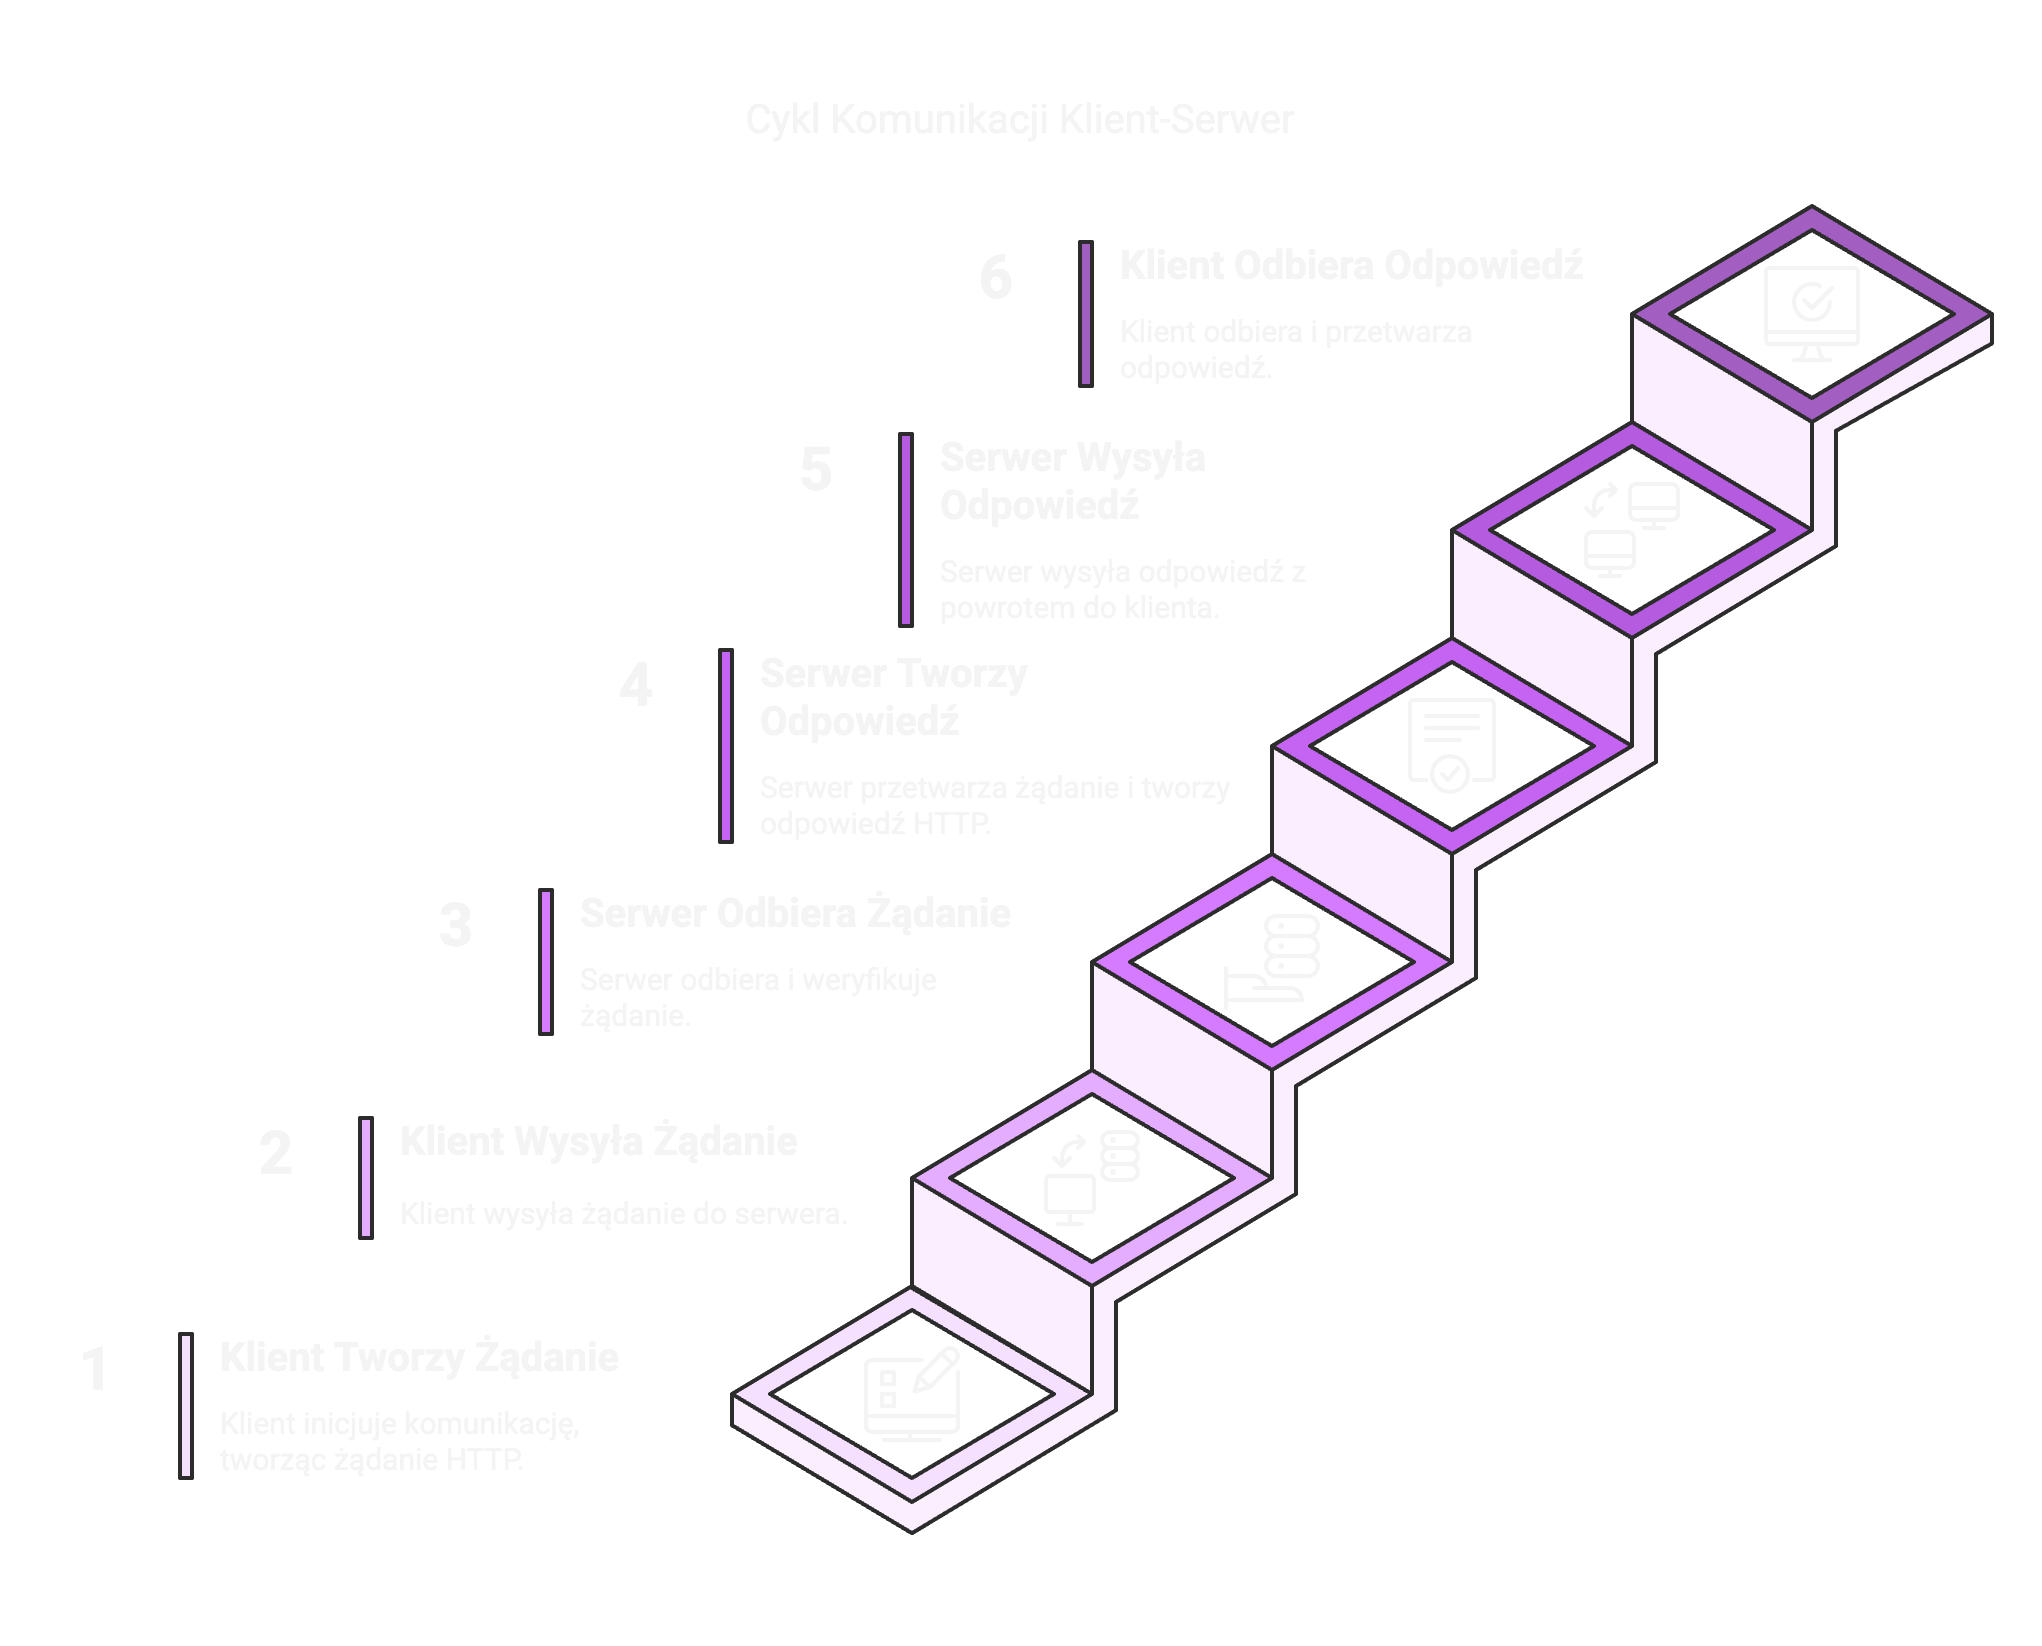

## 5. Podstawowe Koncepcje API HTTP (REST)

Większość nowoczesnych API, w tym API Modeli Językowych, wykorzystuje styl architektoniczny zwany **REST (Representational State Transfer)**. API RESTful opierają się na standardach HTTP i ułatwiają budowanie skalowalnych usług internetowych. Zrozumienie tych pojęć jest kluczowe:

*   **Endpoint (Punkt Końcowy):** Specyficzny adres URL, do którego wysyłasz żądanie, aby uzyskać dostęp do określonej funkcjonalności lub zasobu. Każda operacja, którą możesz wykonać (np. generowanie tekstu, tworzenie osadzeń), ma swój dedykowany endpoint.
    *   *Przykład:* `https://api.openai.com/v1/chat/completions` (endpoint do czatu w OpenAI)
    *   *Przykład:* `https://generativelanguage.googleapis.com/v1beta/models/gemini-pro:generateContent` (endpoint do generowania treści w Google Gemini)

*   **Metoda HTTP:** Określa rodzaj akcji, którą chcesz wykonać na zasobie pod danym endpointem. Najważniejsze dla API LLM:
    *   `POST`: Najczęściej używana metoda. Służy do wysyłania danych do serwera w celu ich przetworzenia lub utworzenia nowego zasobu. Używamy jej do wysyłania zapytań do modeli językowych.
    *   `GET`: Służy do pobierania danych z serwera. Może być używana np. do pobrania listy dostępnych modeli lub informacji o koncie.

*   **Nagłówki (Headers):** Dodatkowe informacje o żądaniu lub odpowiedzi, które nie są częścią głównych danych. Kluczowe nagłówki to:
    *   `Authorization`: Zawiera dane uwierzytelniające (Twój klucz API). Często w formacie `Bearer TWÓJ_KLUCZ_API`. Wskazuje serwerowi, kim jesteś i czy masz uprawnienia do wykonania żądania.
    *   `Content-Type`: Informuje serwer, w jakim formacie są dane w treści żądania (np. `application/json`).
    *   `Accept`: Informuje serwer, jakiego formatu danych oczekujesz w odpowiedzi.

*   **Parametry (Parameters):** Dodatkowe dane w żądaniu, które wpływają na jego przetwarzanie lub filtrują wyniki. Mogą być przekazywane na dwa sposoby:
    *   **Parametry zapytania (Query Parameters):** Dodawane na końcu URL po znaku `?`, oddzielone `&` (np. `/models?limit=10`). Mniej powszechne w żądaniach POST do LLM.
    *   **Parametry w treści (Body Parameters):** Dane przesyłane w treści żądania (szczególnie dla POST, PUT, PATCH). Dla LLM API są to kluczowe parametry w formacie JSON, takie jak `model`, `messages`, `temperature`, `max_tokens`.

*   **Treść (Body):** Główne dane przesyłane w żądaniu POST/PUT/PATCH (np. Twoje zapytanie do modelu w JSON) lub otrzymywane w odpowiedzi GET/POST (np. wygenerowany tekst, wyniki zapytania).

*   **Uwierzytelnianie (Authentication):** Proces weryfikacji Twojej tożsamości przez serwer, zazwyczaj przy użyciu klucza API przesłanego w nagłówku `Authorization`.

*   **Kod Statusu (Status Code):** Trzycyfrowa liczba w odpowiedzi HTTP, informująca o wyniku żądania. Kluczowe kody:
    *   `200 OK`: Żądanie powiodło się.
    *   `400 Bad Request`: Błąd w żądaniu po stronie klienta (np. brakujący parametr, nieprawidłowy format danych).
    *   `401 Unauthorized`: Brak lub nieprawidłowe uwierzytelnienie (klucz API).
    *   `403 Forbidden`: Uwierzytelnienie powiodło się, ale użytkownik nie ma uprawnień do wykonania tej operacji.
    *   `404 Not Found`: Endpoint lub zasób nie istnieje.
    *   `429 Too Many Requests`: Przekroczono limit szybkości (rate limit).
    *   `500 Internal Server Error`: Błąd na serwerze API.

Zrozumienie tych elementów pozwoli Ci prawidłowo konstruować żądania i interpretować odpowiedzi, niezależnie od konkretnego dostawcy API.

# 6. Format Danych - JSON (JavaScript Object Notation)

Kiedy aplikacje komunikują się przez API HTTP, muszą wymieniać dane w ustandaryzowanym formacie, który obie strony potrafią zrozumieć. W przypadku zdecydowanej większości nowoczesnych web API, w tym API Modeli Językowych, tym formatem jest **JSON**.

**Co to jest JSON?**

*   **JSON (JavaScript Object Notation)** to lekki, tekstowy format wymiany danych.
*   Choć jego nazwa pochodzi od JavaScriptu, jest to format **niezależny od języka programowania**. Kod w Pythonie, Javie, PHP, czy dowolnym innym popularnym języku może łatwo przetwarzać dane JSON.
*   Jest zaprojektowany tak, aby był **czytelny dla człowieka** i jednocześnie **łatwy do sparsowania (przetworzenia) przez maszyny**.

**Dlaczego API tak powszechnie używają JSON?**

1.  **Prostota i Czytelność:** Struktura JSON jest znacznie prostsza i często bardziej zwięzła niż starsze formaty jak XML.
2.  **Lekkość:** Tekstowa reprezentacja danych jest zazwyczaj mniej "gadatliwa" niż XML, co oznacza mniej danych do przesłania przez sieć - szybsza komunikacja.
3.  **Szerokie Wsparcie:** Praktycznie każdy język programowania ma wbudowane lub łatwo dostępne biblioteki do pracy z JSON.
4.  **Naturalne Mapowanie:** Struktura JSON bardzo dobrze odwzorowuje powszechne struktury danych używane w programowaniu, takie jak obiekty/słowniki i listy/tablice.
5.  **Standard de facto:** Stał się dominującym standardem dla API typu RESTful.

**Jak rozumieć strukturę JSON?**

JSON opiera się na dwóch podstawowych strukturach:

1.  **Obiekt (Object):**
    *   Nieuporządkowany zbiór par **klucz-wartość**.
    *   Zaczyna się i kończy nawiasem klamrowym `{}`.
    *   Klucze (keys) muszą być **ciągami znaków** (strings) ujętymi w cudzysłów `""`.
    *   Wartości (values) mogą być:
        *   Ciągiem znaków (`"jakiś tekst"`)
        *   Liczbą (`123` lub `3.14`)
        *   Wartością logiczną (`true` lub `false`)
        *   Tablicą (Array) (`[...]`)
        *   Innym Obiektem (`{...}`)
        *   Wartością `null` (reprezentującą brak wartości)
    *   Pary klucz-wartość oddzielone są dwukropkiem `:`, a poszczególne pary przecinkiem `,`.

    *Przykład Obiektu JSON:*
    ```json
    {
      "nazwa": "Model GPT-4o Mini",
      "liczba_parametrow": null, // null oznacza brak danych
      "dostepny": true,
      "cena_wejscia_1k": 0.00015
    }
    ```

2.  **Tablica (Array):**
    *   Uporządkowana **lista wartości**.
    *   Zaczyna się i kończy nawiasem kwadratowym `[]`.
    *   Wartości w tablicy mogą być dowolnego typu dozwolonego w JSON (string, number, boolean, object, array, null).
    *   Elementy listy oddzielone są przecinkiem `,`.

    *Przykład Tablicy JSON:*
    ```json
    [
      "pierwszy pomysł na tytuł",
      "drugi pomysł na tytuł",
      100, // Można mieszać typy
      { "uwaga": "To jest obiekt w tablicy" }
    ]
    ```

**JSON w Praktyce API:**

W komunikacji z API LLM najczęściej spotkasz się z obiektami JSON. Treść (body) żądania POST to zazwyczaj obiekt JSON zawierający klucze takie jak `model`, `messages` (którego wartością jest tablica obiektów JSON!), `temperature` itp. Podobnie, odpowiedź serwera w treści (body) to najczęściej obiekt JSON zawierający klucze takie jak `id`, `choices` (będące tablicą obiektów), `usage` (będące obiektem) itp.

**JSON a Python:**

Biblioteki Pythona (jak wbudowana biblioteka `json`) pozwalają na łatwą konwersję między tymi strukturami:
*   Obiekt JSON `<=>` Słownik Python (`dict`)
*   Tablica JSON `<=>` Lista Python (`list`)
*   String JSON `<=>` String Python (`str`)
*   Number JSON `<=>` Liczba Python (`int` lub `float`)
*   Boolean JSON (`true`/`false`) `<=>` Wartość logiczna Python (`True`/`False`)
*   Null JSON (`null`) `<=>` `None` w Pythonie

Zrozumienie tej prostej, ale potężnej struktury jest niezbędne do efektywnej pracy z większością nowoczesnych API. Zobaczmy teraz, jak to wygląda w praktyce w Pythonie.

In [ ]:
# Python posiada wbudowaną bibliotekę `json` do pracy z tym formatem.

import json

# ----- 1. Konwersja danych z Pythona do JSON (Serializacja) -----
# Załóżmy, że mamy dane w strukturach Pythona (słownik, lista),
# które chcemy wysłać jako treść żądania API.

print("--- 1. Python -> JSON (Serializacja) ---")

# Przykład danych Python (słownik zawierający listę słowników)
dane_python = {
    "model": "przykladowy-model-v2",
    "wiadomosci": [
        {"rola": "system", "tresc": "Bądź pomocny."},
        {"rola": "uzytkownik", "tresc": "Opowiedz dowcip."}
    ],
    "temperatura": 0.7,
    "czy_aktywny": True,
    "limit_tokenow": None # None w Pythonie
}

print(f"Oryginalne dane w Pythonie (typ: {type(dane_python)}):")
print(dane_python)

# Używamy json.dumps() (dump string), aby przekonwertować obiekt Python na string w formacie JSON.
# `indent=2` dodaje wcięcia, aby wynik był bardziej czytelny (przydatne do debugowania).
json_string = json.dumps(dane_python, indent=2, ensure_ascii=False) # ensure_ascii=False dla polskich znaków

print(f"\nDane po konwersji do JSON string (typ: {type(json_string)}):")
print(json_string)
# Zauważ, jak 'True' stało się 'true', a 'None' stało się 'null'. Klucze i stringi są w cudzysłowach.

print("\n")

# ----- 2. Konwersja danych z JSON do Pythona (Deserializacja/Parsowanie) -----
# Załóżmy, że otrzymaliśmy odpowiedź od API w postaci stringa JSON.

print("--- 2. JSON -> Python (Deserializacja) ---")

# Przykład stringa JSON (symulujący odpowiedź API)
json_odpowiedz_string = """
{
  "id": "resp_12345",
  "obiekt": "wynik_generowania",
  "utworzono": 1718000000,
  "wybor": [
    {
      "indeks": 0,
      "wiadomosc": {
        "rola": "asystent",
        "tresc": "Dlaczego pomidor jest czerwony? Bo zobaczył sałatkę!"
      },
      "powod_zakonczenia": "stop"
    }
  ],
  "zuzycie": {
    "tokeny_prompt": 25,
    "tokeny_odpowiedzi": 18,
    "lacznie_tokenow": 43
  }
}
"""

print(f"Otrzymany JSON string (typ: {type(json_odpowiedz_string)}):")
print(json_odpowiedz_string)

# Używamy json.loads() (load string), aby sparsować string JSON do obiektu Python (słownika/listy).
dane_sparsowane_python = json.loads(json_odpowiedz_string)

print(f"\nDane po sparsowaniu JSON do Pythona (typ: {type(dane_sparsowane_python)}):")
print(dane_sparsowane_python)

# Teraz możemy łatwo uzyskać dostęp do danych używając standardowej notacji Pythona:
print("\nPrzykładowy dostęp do danych w sparsowanym obiekcie:")
try:
    wygenerowana_tresc = dane_sparsowane_python['wybor'][0]['wiadomosc']['tresc']
    laczne_tokeny = dane_sparsowane_python['zuzycie']['lacznie_tokenow']
    print(f"  Wygenerowana treść: '{wygenerowana_tresc}'")
    print(f"  Łącznie tokenów: {laczne_tokeny}")
except (KeyError, IndexError, TypeError) as e:
    print(f"  Błąd podczas dostępu do danych: {e}")

print("\n--- Koniec demonstracji JSON w Pythonie ---")

--- 1. Python -> JSON (Serializacja) ---
Oryginalne dane w Pythonie (typ: <class 'dict'>):
{'model': 'przykladowy-model-v2', 'wiadomosci': [{'rola': 'system', 'tresc': 'Bądź pomocny.'}, {'rola': 'uzytkownik', 'tresc': 'Opowiedz dowcip.'}], 'temperatura': 0.7, 'czy_aktywny': True, 'limit_tokenow': None}

Dane po konwersji do JSON string (typ: <class 'str'>):
{
  "model": "przykladowy-model-v2",
  "wiadomosci": [
    {
      "rola": "system",
      "tresc": "Bądź pomocny."
    },
    {
      "rola": "uzytkownik",
      "tresc": "Opowiedz dowcip."
    }
  ],
  "temperatura": 0.7,
  "czy_aktywny": true,
  "limit_tokenow": null
}


--- 2. JSON -> Python (Deserializacja) ---
Otrzymany JSON string (typ: <class 'str'>):

{
  "id": "resp_12345",
  "obiekt": "wynik_generowania",
  "utworzono": 1718000000,
  "wybor": [
    {
      "indeks": 0,
      "wiadomosc": {
        "rola": "asystent",
        "tresc": "Dlaczego pomidor jest czerwony? Bo zobaczył sałatkę!"
      },
      "powod_zakonczenia"

## 7. Komunikacja z API LLM: Cykl Żądanie-Odpowiedź i JSON

W kontekście API Modeli Językowych, standardowy cykl żądanie-odpowiedź HTTP wygląda następująco:

1.  **Klient tworzy Żądanie (POST):** Najczęściej wysyłasz żądanie metodą `POST` do konkretnego endpointu (np. `/v1/chat/completions`). W tym żądaniu przekazujesz:
    *   **Endpoint URL:** Adres serwera i ścieżka do konkretnej funkcji.
    *   **Nagłówki:** Przede wszystkim `Authorization` (z Twoim kluczem API) i `Content-Type: application/json`.
    *   **Treść (Body):** Twoje zapytanie do modelu i parametry kontrolujące jego zachowanie (np. `model`, `messages`, `temperature`, `max_tokens`). Te dane są przesyłane w formacie **JSON**.

2.  **Serwer API odbiera i przetwarza Żądanie:** Serwer weryfikuje Twój klucz API (uwierzytelnianie), analizuje dane JSON w treści żądania, przekazuje odpowiednie instrukcje i dane do wybranego modelu językowego.

3.  **Model Językowy generuje Odpowiedź:** Model przetwarza dane wejściowe i generuje tekst lub inne wyjście zgodnie z Twoimi instrukcjami i parametrami.

4.  **Serwer API tworzy Odpowiedź HTTP:** Pakuje wygenerowane przez model dane (oraz metadane, takie jak użycie tokenów, informacje o modelu) w format **JSON** i umieszcza je w treści odpowiedzi HTTP. Dodaje też odpowiednie nagłówki (np. `Content-Type: application/json`) i kluczowy **kod statusu**.

5.  **Klient odbiera Odpowiedź:** Twój program odbiera odpowiedź HTTP.

6.  **Klient przetwarza Odpowiedź:** Sprawdza kod statusu (np. czy to 200 OK, czy jakiś błąd), a następnie parsuje (czyta i interpretuje) dane **JSON** z treści odpowiedzi, aby uzyskać wygenerowany tekst lub inne potrzebne informacje.

### Format Danych: JSON

Jak widać, **JSON (JavaScript Object Notation)** jest podstawowym formatem wymiany danych. Jego struktura jest prosta i opiera się na:

*   **Obiektach:** Kolekcja par klucz-wartość, ujęta w nawiasy klamrowe `{}`. Klucze to ciągi znaków, wartości mogą być ciągami znaków, liczbami, booleanami (`true`/`false`), listami lub innymi obiektami JSON.
    ```json
    {
      "klucz1": "wartość tekstowa",
      "klucz2": 123,
      "klucz3": true
    }
    ```
*   **Listach (Tablicach):** Uporządkowana kolekcja wartości, ujęta w nawiasy kwadratowe `[]`.
```json
    [
      "pierwszy element",
      "drugi element",
      {"obiekt_w_liscie": "wartość"}
    ]
    ```

**Przykład Treści Żądania (POST body) w JSON (częsta struktura dla API czatu):**

```json
{
  "model": "gpt-4o-mini",
  "messages": [
    {"role": "system", "content": "Jesteś ekspertem w optymalizacji treści."},
    {"role": "user", "content": "Przepisz ten akapit tak, aby był bardziej angażujący dla czytelnika bloga o podróżach."},
    {"role": "assistant", "content": "Jasne, podaj akapit!"},
    {"role": "user", "content": "Samotne podróżowanie może być przerażające, ale oferuje unikalne doświadczenia, które pozwalają na głębsze poznanie siebie i otoczenia."}
  ],
  "temperature": 0.8,
  "max_tokens": 100
}
```

Przykład Treści Odpowiedzi (Response body) w JSON (częsta struktura):
 ```json
{
  "id": "chatcmpl-...",
  "object": "chat.completion",
  "created": 1717945000,
  "model": "gpt-4o-mini-...",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Podróżujesz samotnie? To może brzmieć onieśmielająco, ale otwiera drzwi do niezwykłych przygód! Odkryj świat na własnych zasadach i zanurz się w doświadczeniach, które pozwolą Ci lepiej poznać samego siebie i fascynujące miejsca wokół."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 60,
    "completion_tokens": 55,
    "total_tokens": 115
  },
  "system_fingerprint": "fp_..."
}
 ```

Twoim zadaniem, korzystając z Python, jest utworzenie odpowiedniej struktury danych (zazwyczaj słowników i list) w Pythonie, która zostanie zamieniona na JSON do wysłania, a następnie odczytanie danych z JSON-owej odpowiedzi (która zostanie zamieniona z powrotem na słowniki i listy Python) w celu wyodrębnienia potrzebnych informacji, np. tekstu wygenerowanego przez model z pola response['choices'][0]['message']['content'].

Teraz, gdy rozumiemy format danych i cykl komunikacji, możemy przejść do praktycznych sposobów wysyłania tych żądań.

## 8. Dwa Sposoby Komunikacji z API: Bezpośrednio vs. Biblioteka

Skoro rozumiemy już, jak działają API HTTP i format danych JSON, przyjrzyjmy się, w jaki sposób możemy wysyłać te żądania z naszego kodu Python. Istnieją zasadniczo dwa główne podejścia:

1.  **Bezpośrednia komunikacja za pomocą ogólnych bibliotek HTTP:** Używasz bibliotek takich jak `requests` (bardzo popularna) lub `httpx` (nowsza, wspierająca `async`) do ręcznego konstruowania i wysyłania żądań HTTP. Sam musisz zadbać o ustawienie odpowiednich nagłówków, serializację danych Python do JSON, wysłanie żądania, sprawdzenie kodu statusu odpowiedzi i sparsowanie JSON-owej odpowiedzi z powrotem do struktur Python.
    *   **Zalety:** Pełna kontrola nad żądaniem. Działa z *każdym* API HTTP. Wymaga znajomości tylko podstaw HTTP i JSON.
    *   **Wady:** Kod bywa bardziej szczegółowy ("boilerplate"). Musisz ręcznie obsługiwać błędy, ponawianie prób, itp.

2.  **Komunikacja za pomocą dedykowanych bibliotek SDK dostarczanych przez dostawcę API:** Większość dużych dostawców API Modeli Językowych (OpenAI, Google, Anthropic, Mistral) udostępnia własne biblioteki (Software Development Kits) dla popularnych języków programowania, w tym Python. Te biblioteki zostały stworzone specjalnie do komunikacji z ich API i **znacznie upraszczają proces**. Zamiast ręcznie tworzyć żądanie HTTP, używasz metod udostępnionych przez bibliotekę (np. `client.chat.completions.create()`), przekazując parametry jako argumenty funkcji. Biblioteka zajmuje się całą niskopoziomową komunikacją HTTP "pod spodem".
    *   **Zalety:** Znacznie prostszy i czytelniejszy kod. Wbudowana obsługa uwierzytelniania, automatyczne ponawianie prób w przypadku błędów przejściowych, łatwiejsze parsowanie odpowiedzi (biblioteka często zwraca gotowe obiekty Python, a nie surowe słowniki z JSON), obsługa strumieniowania i innych specyficznych funkcji API.
    *   **Wady:** Wymaga zainstalowania i nauki użycia konkretnej biblioteki dla każdego dostawcy. Jesteś zależny od biblioteki - jeśli API się zmieni, biblioteka musi zostać zaktualizowana.

**Wnioski:**

Chociaż zrozumienie bezpośredniej komunikacji HTTP jest bardzo cenne (pomaga debugować i pracować z dowolnym API), w codziennej pracy z popularnymi API Modeli Językowych **zaleca się używanie dedykowanych bibliotek SDK**. Są one szybsze w użyciu, mniej podatne na błędy wynikające z manualnego konstruowania żądań i często oferują dodatkowe funkcje ułatwiające życie programiście.

W kolejnych sekcjach pokażemy przykłady obu podejść, abyś mógł zobaczyć różnice i zrozumieć, co dzieje się "pod maską" bibliotek SDK.

## 8.1 Bezpośrednia Komunikacja HTTP (za pomocą biblioteki `requests`)

Zobaczmy teraz, jak wygląda ręczne wysyłanie żądania HTTP do API przy użyciu popularnej biblioteki `requests`. Wykorzystamy ją do komunikacji z endpointem API OpenAI (lub kompatybilnym, takim jak OpenRouter, jeśli go skonfigurowano i używasz odpowiedniego modelu), ponieważ jego struktura żądań i odpowiedzi jest dobrze udokumentowana i często naśladowana.

Pamiętaj, że w tym podejściu sami musimy zadbać o każdy szczegół żądania i odpowiedzi.

In [ ]:
#@title Przykład Bezpośredniej Komunikacji HTTP (z wykorzystaniem requests)
# Użyjemy biblioteki requests do wysłania żądania POST do API czatu.
# Pamiętaj, że potrzebujesz skonfigurowanego klucza API w Colab Secrets (np. SECRET_OPENAI_API_KEY).

import requests
import json # Biblioteka do pracy z formatem JSON
import os # Biblioteka do odczytu zmiennych środowiskowych

# Pobranie klucza API ze zmiennych środowiskowych
# Użyj klucza dla usługi, do której chcesz wysłać żądanie.
# Tutaj użyjemy klucza OpenAI dla przykładu, ale możesz go zmienić na inny
# jeśli chcesz przetestować z kompatybilnym API (np. OpenRouter, Jina AI z modelem czatu).
api_key = os.environ.get("OPENAI_API_KEY") # Zmień na np. os.environ.get("OPENROUTER_API_KEY") jeśli używasz OpenRouter
# api_key = os.environ.get("OPENROUTER_API_KEY") # Odkomentuj i użyj tego, jeśli testujesz z OpenRouter

if not api_key:
    print("Brak klucza API w zmiennych środowiskowych. Skonfiguruj klucz w Colab Secrets i uruchom ponownie komórkę konfiguracji.")
else:
    # 1. Definicja Endpointu API
    # To jest pełny URL, do którego wysyłamy żądanie POST.
    # Dla OpenAI:
    url = "https://api.openai.com/v1/chat/completions"
    # Dla OpenRouter (jeśli używasz klucza OpenRouter):
    # url = "https://openrouter.ai/api/v1/chat/completions" # Odkomentuj, jeśli testujesz z OpenRouter

    # 2. Definicja Nagłówków HTTP
    # Nagłówki dostarczają metadanych o żądaniu.
    headers = {
        "Content-Type": "application/json", # Informujemy serwer, że treść żądania to JSON
        "Authorization": f"Bearer {api_key}" # Przekazujemy klucz API do uwierzytelnienia
    }

    # 3. Definicja Treści Żądania (Body) jako słownika Python
    # Ta struktura musi być zgodna z dokumentacją API usługi (dla endpointu czatu).
    # Dla OpenAI (i kompatybilnych):
    body_data = {
        "model": "gpt-3.5-turbo", # Nazwa modelu (zmień na inny, jeśli testujesz inną usługę/model przez OpenRouter)
        # "model": "openai/gpt-3.5-turbo", # Przykład dla OpenRouter
        "messages": [ # Kontekst rozmowy jako lista wiadomości
            {"role": "system", "content": "Jesteś pomocnym asystentem, który udziela zwięzłych odpowiedzi."},
            {"role": "user", "content": "Czym jest long-tail keyword w SEO?"}
        ],
        "max_tokens": 80, # Maksymalna liczba tokenów w odpowiedzi
        "temperature": 0.5 # Kontrola kreatywności (niższa wartość = mniej losowo)
    }

    # 4. Konwersja słownika Python do stringa JSON
    # Biblioteka requests może to zrobić automatycznie, jeśli użyjemy parametru `json=`,
    # ale pokażmy jawnie, jak to się robi:
    # json_body = json.dumps(body_data)

    print(f"Wysyłam żądanie POST do: {url}")
    # print(f"Nagłówki: {headers}") # Ostrożnie z drukowaniem klucza!
    # print(f"Treść (Python dict): {body_data}")

    # 5. Wysyłanie Żądania POST
    try:
        # Używamy requests.post() do wysłania żądania.
        # Parametr `json=body_data` jest skrótem, który ustawia Content-Type
        # i konwertuje słownik `body_data` na string JSON.
        response = requests.post(url, headers=headers, json=body_data)

        # 6. Obsługa Odpowiedzi
        print(f"\nOtrzymano odpowiedź ze status code: {response.status_code}")

        # Sprawdzenie kodu statusu
        if response.status_code == 200: # Sukces!
            # Parsowanie treści odpowiedzi (JSON string) z powrotem do słownika Python
            response_data = response.json()
            print("Odpowiedź API (sparsowany JSON):")
            # print(json.dumps(response_data, indent=2)) # Opcjonalnie: wydrukuj całą strukturę odpowiedzi

            # Wyciągnięcie wygenerowanego tekstu z parsowanej odpowiedzi
            # Ścieżka do tekstu zależy od struktury JSON API (dla czatu OpenAI/kompatybilnych to 'choices' -> 0 -> 'message' -> 'content')
            try:
                generated_text = response_data['choices'][0]['message']['content']
                print("\nWygenerowany tekst:")
                print(generated_text)
                print(f"\nUżycie tokenów: {response_data.get('usage', {}).get('total_tokens', 'N/A')}")
            except (KeyError, IndexError):
                print("Nie udało się wyodrębnić tekstu z odpowiedzi JSON o oczekiwanej strukturze.")
                print("Surowa treść odpowiedzi:")
                print(response.text) # Wydrukuj surową odpowiedź, jeśli parsowanie się nie powiodło

        elif response.status_code in [400, 401, 403, 404, 429, 500]: # Typowe błędy API
             print("\nWystąpił błąd API:")
             print(f"Status: {response.status_code}")
             print("Treść błędu:")
             # Serwer często zwraca szczegóły błędu w treści, często w JSON
             try:
                 error_details = response.json()
                 print(json.dumps(error_details, indent=2))
             except json.JSONDecodeError:
                 # Jeśli treść błędu nie jest w JSON, wydrukuj surowy tekst
                 print(response.text)

        else:
            # Obsługa innych, mniej typowych kodów statusu
            print(f"\nOtrzymano nieoczekiwany status code: {response.status_code}")
            print("Surowa treść odpowiedzi:")
            print(response.text)


    except requests.exceptions.RequestException as e:
        # Obsługa błędów związanych z siecią lub samym wysyłaniem żądania
        print(f"\nWystąpił błąd podczas wysyłania żądania HTTP: {e}")

Wysyłam żądanie POST do: https://api.openai.com/v1/chat/completions

Otrzymano odpowiedź ze status code: 200
Odpowiedź API (sparsowany JSON):

Wygenerowany tekst:
Long-tail keyword w SEO to długi, bardziej specyficzny termin, który użytkownicy wpisują w wyszukiwarkę internetową, aby znaleźć dokładne informacje na temat konkretnego tematu. Te dłuższe frazy kluczowe są mniej popularne, ale mogą przyn

Użycie tokenów: 123


## 8.2 Komunikacja za pomocą Dedykowanych Bibliotek SDK

Jak widzieliśmy w poprzednim przykładzie, bezpośrednia komunikacja HTTP wymaga od nas ręcznego zarządzania wieloma szczegółami (konstruowanie URL, nagłówki, JSON, obsługa odpowiedzi, błędy). To podejście jest elastyczne, ale może być uciążliwe, zwłaszcza przy częstych interakcjach z API.

Dostawcy API często udostępniają **dedykowane biblioteki SDK (Software Development Kit)** dla różnych języków programowania. Te biblioteki są stworzone specjalnie do komunikacji z danym API i abstrakcjonują większość niskopoziomowych szczegółów HTTP.

Zamiast:

*   Ręcznie budować URL endpointu
*   Tworzyć słownik nagłówków z kluczem API
*   Tworzyć słownik danych żądania i konwertować go na JSON
*   Wysyłać żądanie za pomocą `requests.post()`
*   Sprawdzać `response.status_code`
*   Parsować `response.json()`
*   Wyciągać dane z zagnieżdżonych słowników/list

Używając biblioteki SDK, zazwyczaj robisz:

*   Inicjalizujesz obiekt klienta API (często biblioteka sama pobiera klucz API ze zmiennych środowiskowych).
*   Wywołujesz konkretną metodę obiektu klienta, która odpowiada funkcji API, przekazując parametry jako argumenty funkcji (np. `client.chat.completions.create(model=..., messages=...)`).
*   Biblioteka wysyła żądanie, odbiera odpowiedź, obsługuje typowe błędy i parsje dane, zwracając wynik jako łatwy w użyciu obiekt Python.

Zobaczmy, jak wygląda komunikacja z API OpenAI przy użyciu ich oficjalnej biblioteki Python (`openai`).

## 8. Definicja Wspólnego Promptu dla Modelów

Zanim przejdziemy do wywoływania API poszczególnych modeli za pomocą ich dedykowanych bibliotek, zdefiniujmy prompt (instrukcję dla modelu) w jednej, centralnej komórce. Będziemy używać tego samego promptu dla wszystkich testowanych modeli, aby móc porównać różnice w ich odpowiedziach na identyczne zapytanie.

Możesz edytować poniższe pola formularza, aby zmienić prompt i zobaczyć, jak różne modele zareagują.

Prompt zazwyczaj składa się z dwóch głównych części:

1.  **Instrukcja Systemowa (`system_prompt`):** Określa rolę, jaką model ma przyjąć lub ogólne wytyczne dotyczące stylu, formatu czy ograniczeń (np. "Jesteś ekspertem SEO.", "Odpowiadaj tylko w języku polskim.").
2.  **Zapytanie Użytkownika (`user_prompt`):** Właściwe pytanie lub zadanie, które chcesz wykonać (np. "Zaproponuj 5 pomysłów na tytuły...").

In [ ]:
#@title Edytuj Wspólny Prompt
# Zdefiniuj poniżej instrukcję systemową i zapytanie użytkownika,
# które będą wysyłane do wszystkich kolejnych modeli językowych.

system_prompt = "Jesteś ekspertem SEO." #@param {type:"string"}
user_prompt = "Zaproponuj 5 pomysłów na tytuły (headlines) do posta blogowego na temat 'Zastosowania SI w nowoczesnym SEO'." #@param {type:"string"}

print("Wspólny Prompt zdefiniowany:")
print(f"  System: {system_prompt}")
print(f"  Użytkownik: {user_prompt}")

# Te zmienne (system_prompt i user_prompt) będą teraz dostępne
# dla wszystkich kolejnych komórek kodu w tym notatniku.

Wspólny Prompt zdefiniowany:
  System: Jesteś ekspertem SEO.
  Użytkownik: Zaproponuj 5 pomysłów na tytuły (headlines) do posta blogowego na temat 'Zastosowania SI w nowoczesnym SEO'.


### 8.2.1 Komunikacja z API OpenAI (za pomocą biblioteki `openai`)

Kontynuujemy testowanie API poszczególnych dostawców za pomocą ich dedykowanych bibliotek. W tej komórce użyjemy API OpenAI i ich biblioteki `openai`, korzystając z **wspólnego promptu zdefiniowanego w Komórce 11**.

Wygenerowana odpowiedź od modelu OpenAI zostanie zapisana w zmiennej o nazwie `openai_generated_text`, abyśmy mogli później porównać ją z odpowiedziami innych modeli.

In [ ]:
#@title Komunikacja z API OpenAI (biblioteka openai) - Użyj Wspólnego Promptu i Zapisz Odpowiedź
# Upewnij się, że:
# 1. SECRET_OPENAI_API_KEY jest skonfigurowany w Colab Secrets.
# 2. Komórka 2 (Konfiguracja Kluczy) została uruchomiona.
# 3. Komórka 11 (Definicja Wspólnego Promptu) została uruchomiona.

import os
from openai import OpenAI
from openai import APIError, AuthenticationError, RateLimitError

# Zmienna, w której zapiszemy odpowiedź od modelu OpenAI.
# Zostanie zainicjowana jako None, a jeśli API zwróci tekst, zostanie zaktualizowana.
openai_generated_text = None

openai_api_key = os.environ.get("OPENAI_API_KEY")

if not openai_api_key:
    print("Brak klucza OpenAI API. Skonfiguruj klucz w Colab Secrets i uruchom ponownie Komórkę 2.")
else:
    try:
        print("Inicjalizacja klienta OpenAI API...")
        client = OpenAI()

        # --- Użycie Wspólnego Promptu ze zmiennych globalnych (Komórka 11) ---
        # Pamiętaj, że system_prompt i user_prompt muszą być zdefiniowane
        # poprzez uruchomienie Komórki 11 PRZED uruchomieniem tej komórki.
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
        # -----------------------------------------------------------------

        print("Wysyłam żądanie do API OpenAI z wspólnym promptem...")
        completion = client.chat.completions.create(
            model="gpt-4o", # Model OpenAI (możesz zmienić na inny, np. "gpt-3.5-turbo")
            messages=messages,
            max_tokens=200, # Ustawiamy limit, aby pomieścić odpowiedź
            temperature=0.8
        )

        if completion.choices:
            # Zapisujemy wygenerowany tekst do zmiennej
            openai_generated_text = completion.choices[0].message.content
            print("\nOdpowiedź z OpenAI API została wygenerowana i zapisana w zmiennej 'openai_generated_text'.")
            print("Oto podgląd odpowiedzi:")
            print(openai_generated_text) # Drukujemy podgląd odpowiedzi
            if completion.usage:
                 print(f"\nUżycie tokenów: Wejście={completion.usage.prompt_tokens}, Wyjście={completion.usage.completion_tokens}, Całość={completion.usage.total_tokens}")
        else:
            print("Nie otrzymano odpowiedzi od modelu.")

    except AuthenticationError as e:
        print(f"\nBłąd uwierzytelnienia: {e}")
        print("Sprawdź swój klucz OpenAI API w Colab Secrets.")
    except RateLimitError as e:
        print(f"\nBłąd limitu szybkości (Rate Limit): {e}")
        print("Wysyłasz zbyt wiele żądań w krótkim czasie. Spróbuj ponownie później lub zwiększ limit na koncie OpenAI.")
    except APIError as e:
        print(f"\nOgólny błąd API OpenAI: {e}")
        print("Sprawdź szczegóły błędu powyżej.")
    except Exception as e:
        print(f"\nWystąpił nieoczekiwany błąd: {e}")



Inicjalizacja klienta OpenAI API...
Wysyłam żądanie do API OpenAI z wspólnym promptem...

Odpowiedź z OpenAI API została wygenerowana i zapisana w zmiennej 'openai_generated_text'.
Oto podgląd odpowiedzi:
1. "Rewolucja w SEO: Jak Sztuczna Inteligencja Zmienia Zasady Gry"
2. "Sztuczna Inteligencja w SEO: Narzędzia i Techniki, Które Musisz Znać"
3. "Optymalizacja SEO z SI: Przewodnik po Nowoczesnych Strategiach"
4. "Zastosowanie AI w SEO: Jak Technologia Pomaga Zdobywać Wyższe Pozycje"
5. "Przyszłość SEO: Wykorzystanie Sztucznej Inteligencji do Zwiększenia Widoczności Online"

Użycie tokenów: Wejście=52, Wyjście=132, Całość=184


### 8.2.2 Komunikacja z API Google Gemini (za pomocą biblioteki `google-generativeai`)

Teraz przetestujemy API Google Gemini za pomocą ich oficjalnej biblioteki `google-generativeai`. Ponownie użyjemy **wspólnego promptu zdefiniowanego w Komórce 11**. Zgodnie z dokumentacją tej biblioteki, instrukcję systemową przekazujemy podczas inicjalizacji modelu.

Wygenerowana odpowiedź od modelu Google Gemini zostanie zapisana w zmiennej o nazwie `gemini_generated_text`.

**Wspólny Prompt, którego używamy (z Komórki 11):**

*   **Instrukcja Systemowa (`system_prompt`):** Jesteś ekspertem SEO.
*   **Zapytanie Użytkownika (`user_prompt`):** Zaproponuj 5 pomysłów na tytuły (headlines) do posta blogowego na temat 'Zastosowania SI w nowoczesnym SEO'.

In [ ]:
#@title Komunikacja z API Google Gemini (biblioteka google-generativeai) - Użyj Wspólnego Promptu i Zapisz Odpowiedź (Poprawiona)
# Upewnij się, że:
# 1. SECRET_GEMINI_API_KEY jest skonfigurowany w Colab Secrets.
# 2. Komórka 2 (Konfiguracja Kluczy) została uruchomiona.
# 3. Komórka 11 (Definicja Wspólnego Promptu) została uruchomiona.

import os
import google.generativeai as genai # Importujemy bibliotekę Google Generative AI
# Importujemy potencjalne błędy specyficzne dla Google Cloud/Gemini
from google.api_core import exceptions as google_exceptions

# Zmienna, w której zapiszemy odpowiedź od modelu Gemini.
gemini_generated_text = None

gemini_api_key = os.environ.get("GEMINI_API_KEY")

if not gemini_api_key:
    print("Brak klucza Google Gemini API. Skonfiguruj klucz w Colab Secrets i uruchom ponownie Komórkę 2.")
else:
    try:
        print("Konfiguracja API Google Gemini...")
        # 1. Konfiguracja API Key
        genai.configure(api_key=gemini_api_key)

        # 2. Wybór modelu i przekazanie instrukcji systemowej
        # Wybieramy model Gemini. 'gemini-1.5-flash-latest' jest dobrym, szybkim modelem.
        model_name = "gemini-2.0-flash"
        print(f"Ładowanie modelu: {model_name}...")
        # Przekazujemy system_instruction TUTAJ, podczas tworzenia modelu
        model = genai.GenerativeModel(
            model_name=model_name,
            system_instruction=system_prompt # <-- TUTAJ PRZEKAZUJEMY INSTRUKCJĘ SYSTEMOWĄ
        )

        # --- Użycie Wspólnego Promptu ze zmiennych globalnych (Komórka 11) ---
        # user_prompt (z Komórki 11)
        # Instrukcja systemowa została już przekazana podczas inicjalizacji modelu powyżej.
        # -----------------------------------------------------------------

        print(f"Wysyłam zapytanie do modelu {model_name} z wspólnym promptem...")

        # 3. Wywołanie metody API
        # generate_content przyjmuje tylko prompt użytkownika i opcje konfiguracji.
        generation_config = {
            "temperature": 0.8,
            "max_output_tokens": 200
        }

        response = model.generate_content(
            user_prompt, # Przekazujemy TYLKO prompt użytkownika
            generation_config=generation_config
        )

        # 4. Przetworzenie odpowiedzi i zapis do zmiennej
        print("\nPrzetwarzam odpowiedź z Google Gemini API...")

        # Sprawdzenie, czy odpowiedź zawiera tekst
        if hasattr(response, 'text'):
            gemini_generated_text = response.text
            print("Odpowiedź od Google Gemini została wygenerowana i zapisana w zmiennej 'gemini_generated_text'.")
            print("Oto podgląd odpowiedzi:")
            print(gemini_generated_text)

            if response.usage_metadata:
                 print(f"\nUżycie tokenów: Wejście={response.usage_metadata.prompt_token_count}, Wyjście={response.usage_metadata.candidates_token_count}, Całość={response.usage_metadata.total_token_count}")
            else:
                 print("\nInformacje o użyciu tokenów niedostępne.")

        elif response.prompt_feedback and response.prompt_feedback.block_reason:
            print(f"Zapytanie zostało zablokowane przez Google Gemini. Powód: {response.prompt_feedback.block_reason}")
            if response.prompt_feedback.safety_ratings:
                print("Szczegóły blokady bezpieczeństwa:")
                for rating in response.prompt_feedback.safety_ratings:
                    print(f"    Kategoria: {rating.category}, Prawdopodobieństwo: {rating.probability}")
            gemini_generated_text = f"BLOKADA TREŚCI: {response.prompt_feedback.block_reason}"
        else:
            print("Nie otrzymano oczekiwanej odpowiedzi tekstowej ani informacji o blokadzie od Google Gemini.")
            gemini_generated_text = "BŁĄD: Brak odpowiedzi tekstowej lub blokady."
            # Opcjonalnie wydrukuj pełną odpowiedź do debugowania
            # try:
            #     import json
            #     print("\nPełna odpowiedź (Debug):")
            #     print(json.dumps(response.to_dict(), indent=2))
            # except Exception as e_debug:
            #      print(f"Nie udało się wydrukować pełnej odpowiedzi do debugowania: {e_debug}")


    # 5. Obsługa specyficznych błędów API
    except google_exceptions.PermissionDenied as e:
        print(f"\nBłąd uprawnień (Permission Denied) API Google Gemini: {e}")
        print("Sprawdź swój klucz Google Gemini API w Colab Secrets.")
        gemini_generated_text = f"BŁĄD API: Permission Denied - {e}"
    except google_exceptions.ResourceExhausted as e:
        print(f"\nBłąd limitu zasobów (Rate Limit/Quota Exceeded) API Google Gemini: {e}")
        print("Przekroczono limit użycia. Spróbuj ponownie później lub zwiększ limit na swoim koncie Google Cloud.")
        gemini_generated_text = f"BŁĄD API: Resource Exhausted - {e}"
    except google_exceptions.InvalidArgument as e:
         print(f"\nBłąd nieprawidłowego argumentu API Google Gemini: {e}")
         print("Sprawdź poprawność nazwy modelu, promptu i parametrów.")
         gemini_generated_text = f"BŁĄD API: Invalid Argument - {e}"
    except Exception as e:
        print(f"\nWystąpił nieoczekiwany błąd podczas komunikacji z Google Gemini API: {e}")
        gemini_generated_text = f"BŁĄD: {e}"

# Po zakończeniu działania komórki, zmienna `gemini_generated_text`
# będzie zawierać wygenerowany tekst, informację o blokadzie lub informację o błędzie.

Konfiguracja API Google Gemini...
Ładowanie modelu: gemini-2.0-flash...
Wysyłam zapytanie do modelu gemini-2.0-flash z wspólnym promptem...

Przetwarzam odpowiedź z Google Gemini API...
Odpowiedź od Google Gemini została wygenerowana i zapisana w zmiennej 'gemini_generated_text'.
Oto podgląd odpowiedzi:
Jasne, oto 5 propozycji tytułów do posta blogowego na temat "Zastosowania SI w nowoczesnym SEO", z naciskiem na ich chwytliwość i SEO-friendly aspekty:

1.  **SI Rewolucjonizuje SEO: 5 Sposobów, w Jakie Sztuczna Inteligencja Zmienia Zasady Gry** (Długi, ale konkretny, zawiera słowa kluczowe, wskazuje korzyści)
2.  **SEO 2.0: Jak Wykorzystać SI, aby Zdominować Wyniki Wyszukiwania w 2024** (Wskazuje na aktualność, używa chwytliwego "SEO 2.0", obiecuje konkrety)
3.  **Sztuczna Inteligencja w SEO: Sekret Sukcesu, Którego Nie Możesz Ignorować** (Wzbudza cie

Użycie tokenów: Wejście=38, Wyjście=190, Całość=228


### 8.2.3 Komunikacja z API Anthropic Claude (za pomocą biblioteki `anthropic`)

Kontynuujemy porównywanie odpowiedzi modeli na **wspólny prompt zdefiniowany w Komórce 11**. Teraz kolej na API Anthropic Claude i ich bibliotekę `anthropic`.

Wygenerowana odpowiedź od modelu Anthropic Claude zostanie zapisana w zmiennej o nazwie `claude_generated_text`.

**Wspólny Prompt, którego używamy (z Komórki 11):**

*   **Instrukcja Systemowa (`system_prompt`):** Jesteś ekspertem SEO.
*   **Zapytanie Użytkownika (`user_prompt`):** Zaproponuj 5 pomysłów na tytuły (headlines) do posta blogowego na temat 'Zastosowania SI w nowoczesnym SEO'.

In [ ]:
#@title Komunikacja z API Anthropic Claude (biblioteka anthropic) - Poprawiona Obsługa Użycia Tokenów
# Upewnij się, że:
# 1. SECRET_CLAUDE_API_KEY jest skonfigurowany w Colab Secrets.
# 2. Komórka 2 (Konfiguracja Kluczy) została uruchomiona.
# 3. Komórka 11 (Definicja Wspólnego Promptu) została uruchomiona.

import os
from anthropic import Anthropic # Importujemy klasę klienta
# Poprawione importy błędów (zgodnie z nowszymi wersjami biblioteki)
from anthropic import (
    AuthenticationError,
    RateLimitError,
    APIStatusError,
    APIConnectionError
)

# Zmienna, w której zapiszemy odpowiedź od modelu Claude.
claude_generated_text = None

claude_api_key = os.environ.get("CLAUDE_API_KEY")

if not claude_api_key:
    print("Brak klucza Anthropic Claude API. Skonfiguruj klucz w Colab Secrets i uruchom ponownie Komórkę 2.")
    print("Pomiń wykonanie tej komórki, jeśli nie masz klucza.")
else:
    try:
        print("Inicjalizacja klienta Anthropic API...")
        # 1. Inicjalizacja klienta API - Jawne przekazanie klucza API
        client = Anthropic(
            api_key=claude_api_key
        )

        # --- Użycie Wspólnego Promptu ze zmiennych globalnych (Komórka 11) ---
        # Anthropic Messages API oczekuje listy słowników z rolą i treścią.
        # Instrukcja systemowa jest osobnym parametrem metody create().
        messages = [
             {"role": "user", "content": user_prompt} # Tylko prompt użytkownika tutaj
        ]
        # -----------------------------------------------------------------

        # 2. Wywołanie metody API (tworzenie wiadomości)
        print("Wysyłam żądanie do API Anthropic Claude z wspólnym promptem...")

        # Anthropic API Messages endpoint wymaga parametra max_tokens
        # Instrukcja systemowa jest przekazywana jako argument `system`.
        message = client.messages.create(
            model="claude-3-5-sonnet-latest", # Model Claude Haiku (szybki, ekonomiczny)
            system=system_prompt,
            messages=messages,
            max_tokens=250,
            temperature=0.8
        )

        # 3. Przetworzenie odpowiedzi i zapis do zmiennej
        print("\nPrzetwarzam odpowiedź z Anthropic Claude API...")

        if message.content and isinstance(message.content, list) and message.content[0].type == 'text':
            claude_generated_text = message.content[0].text
            print("Odpowiedź od Anthropic Claude została wygenerowana i zapisana w zmiennej 'claude_generated_text'.")
            print("Oto podgląd odpowiedzi:")
            print(claude_generated_text)

            # Informacje o użyciu tokenów
            if message.usage:
                 # --- Poprawka tutaj: Sumujemy input_tokens i output_tokens ---
                 total_tokens_used = message.usage.input_tokens + message.usage.output_tokens
                 print(f"\nUżycie tokenów: Wejście={message.usage.input_tokens}, Wyjście={message.usage.output_tokens}, Całość={total_tokens_used}")
                 # -----------------------------------------------------------
            else:
                 print("\nInformacje o użyciu tokenów niedostępne.")

        else:
            print("Nie otrzymano oczekiwanej odpowiedzi tekstowej od modelu Anthropic Claude.")
            claude_generated_text = "BŁĄD: Brak odpowiedzi tekstowej lub błędu."


    # 4. Obsługa specyficznych błędów API Anthropic
    except AuthenticationError as e:
        print(f"\nBłąd uwierzytelnienia API Anthropic: {e}")
        print("Sprawdź swój klucz Anthropic Claude API w Colab Secrets.")
        claude_generated_text = f"BŁĄD API: Authentication Error - {e}"
    except RateLimitError as e:
        print(f"\nBłąd limitu szybkości (Rate Limit) API Anthropic: {e}")
        print("Wysyłasz zbyt wiele żądań w krótkim czasie. Spróbuj ponownie później lub zwiększ limit na koncie Anthropic.")
        claude_generated_text = f"BŁĄD API: Rate Limit Error - {e}"
    except APIStatusError as e:
         print(f"\nOgólny błąd statusu API Anthropic (np. 4xx, 5xx): Status={e.status_code}, Message={e.response.text}")
         print("Sprawdź szczegóły błędu powyżej.")
         claude_generated_text = f"BŁĄD API: Status {e.status_code} - {e.response.text}"
    except APIConnectionError as e:
         print(f"\nBłąd połączenia z API Anthropic: {e}")
         print("Sprawdź połączenie internetowe lub status usługi Anthropic.")
         claude_generated_text = f"BŁĄD API: Connection Error - {e}"
    except Exception as e:
        print(f"\nWystąpił nieoczekiwany błąd: {e}")
        # W przypadku błędu, spróbujmy uzyskać więcej informacji o błędzie z obiektu błędu
        # print(f"Typ błędu: {type(e)}") # Debugowanie typu błędu
        # print(f"Błąd jako string: {str(e)}") # Debugowanie stringowej reprezentacji błędu
        claude_generated_text = f"BŁĄD: {e}"


# Po zakończeniu działania komórki, zmienna `claude_generated_text`
# będzie zawierać wygenerowany tekst lub informację o błędzie.

Inicjalizacja klienta Anthropic API...
Wysyłam żądanie do API Anthropic Claude z wspólnym promptem...

Przetwarzam odpowiedź z Anthropic Claude API...
Odpowiedź od Anthropic Claude została wygenerowana i zapisana w zmiennej 'claude_generated_text'.
Oto podgląd odpowiedzi:
Oto 5 propozycji tytułów zoptymalizowanych pod SEO, które są jednocześnie przyciągające uwagę:

1. "Sztuczna Inteligencja w SEO: 7 Przełomowych Zastosowań, Które Zmienią Twój Marketing [2024]"

2. "Jak AI Rewolucjonizuje SEO? Praktyczny Przewodnik dla Właścicieli Stron WWW"

3. "SEO + Sztuczna Inteligencja: Top 5 Narzędzi AI, Które Zwiększą Twoją Widoczność w Google"

4. "Automatyzacja SEO z AI: Od Analizy Konkurencji po Optymalizację Contentu [Poradnik]"

5. "Przyszłość SEO Jest Tutaj: Kompletny Guide do Wykorzystania Sztucznej Inteligencji w Pozycjonowaniu"

Każ

Użycie tokenów: Wejście=59, Wyjście=250, Całość=309


### 8.2.4 Komunikacja z API OpenRouter (za pomocą biblioteki `openai` i `base_url`)

OpenRouter to ciekawa platforma, która agreguje dostęp do wielu różnych modeli językowych (od OpenAI, Anthropic, Mistral, Google i wielu innych) poprzez **jedno, spójne API**, które jest w dużej mierze **kompatybilne z formatem API OpenAI**.

Dzięki tej kompatybilności, możemy często używać dobrze znanej biblioteki `openai` do komunikacji z OpenRouterem, po prostu wskazując jej inny adres URL endpointu (`base_url`) i używając klucza API OpenRouter.

W tej komórce użyjemy API OpenRouter, biblioteki `openai`, **wspólnego promptu zdefiniowanego w Komórce 11** i zapiszemy odpowiedź w zmiennej `openrouter_generated_text`.

**Wspólny Prompt, którego używamy (z Komórki 11):**

*   **Instrukcja Systemowa (`system_prompt`):** Jesteś ekspertem SEO.
*   **Zapytanie Użytkownika (`user_prompt`):** Zaproponuj 5 pomysłów na tytuły (headlines) do posta blogowego na temat 'Zastosowania SI w nowoczesnym SEO'.

In [ ]:
#@title Komunikacja z API OpenRouter (Bezpośrednio z requests) - Debugowanie Pełnej Odpowiedzi
# Upewnij się, że:
# 1. SECRET_OPENROUTER_API_KEY jest skonfigurowany w Colab Secrets.
# 2. Komórka 2 (Konfiguracja Kluczy) została uruchomiona.
# 3. Komórka 11 (Definicja Wspólnego Promptu) została uruchomiona.

import os
import requests # Importujemy bibliotekę requests do bezpośrednich żądań HTTP
import json     # Importujemy bibliotekę do pracy z formatem JSON

# Zmienna, w której zapiszemy wygenerowany tekst od modelu przez OpenRouter.
openrouter_generated_text = None
# Zmienna na obiekt usage (może być None, jeśli API go nie zwróci lub wystąpi błąd)
openrouter_usage = None

# Pobranie klucza API ze zmiennych środowiskowych (ustawionych w Komórce 2)
openrouter_api_key = os.environ.get("OPENROUTER_API_KEY")

if not openrouter_api_key:
    print("Brak klucza OpenRouter API. Skonfiguruj klucz w Colab Secrets i uruchom ponownie Komórkę 2.")
    print("Pomiń wykonanie tej komórki, jeśli nie masz klucza.")
else:
    try:
        print("Przygotowuję bezpośrednie żądanie HTTP do API OpenRouter...")
        # 1. Definicja Endpointu API
        url = "https://openrouter.ai/api/v1/chat/completions" # Endpoint czatu OpenRouter

        # 2. Definicja Nagłówków HTTP
        headers = {
            "Authorization": f"Bearer {openrouter_api_key}", # Uwierzytelnienie z kluczem OpenRouter
            "Content-Type": "application/json",             # Informujemy serwer, że wysyłamy JSON
            # Opcjonalne nagłówki do rankingów na openrouter.ai (można pominąć)
            # "HTTP-Referer": "https://twoja-strona.pl",
            # "X-Title": "Twoja Aplikacja",
        }

        # 3. Definicja Treści Żądania (Body) jako słownika Python
        model_to_use = "deepseek/deepseek-chat-v3-0324:free" # Konkretny model Qwen

        body_data = {
            "model": model_to_use, # Używamy wskazanego modelu Qwen
            "messages": [
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            "max_tokens": 200,
            "temperature": 0.8
        }

        # 4. Wysyłanie Żądania POST
        print(f"Wysyłam bezpośrednie żądanie POST do OpenRouter dla modelu {model_to_use}...")
        response = requests.post(url, headers=headers, json=body_data)

        # --- Debugging Output: Pełna Odpowiedź ---
        print("\n--- PEŁNA ODPOWIEDŹ HTTP Z OPENROUTER (DEBUG) ---")
        print(f"Status Code: {response.status_code}")
        print("Nagłówki Odpowiedzi:")
        for header, value in response.headers.items():
             print(f"  {header}: {value}")

        print("\nSurowa Treść Odpowiedzi:")
        raw_response_text = response.text
        print(raw_response_text)

        print("\nParsowana Treść Odpowiedzi (JSON):")
        try:
            response_data = response.json()
            print(json.dumps(response_data, indent=2))
        except json.JSONDecodeError:
            print("Treść odpowiedzi nie jest poprawnym JSONem.")
            response_data = None # Ustawiamy na None, jeśli nie udało się sparsować JSON
        print("\n--- KONIEC DEBUG OUTPUT ---")
        # ---------------------------------------


        # 5. Obsługa Odpowiedzi (na podstawie sparsowanych danych JSON)
        if response.status_code == 200 and response_data is not None: # Sukces i udało się sparsować JSON
            # Wyciągnięcie wygenerowanego tekstu z parsowanej odpowiedzi
            try:
                # Sprawdzamy, czy struktura odpowiedzi jest zgodna z oczekiwaniami (jak w OpenAI)
                if 'choices' in response_data and len(response_data['choices']) > 0 and 'message' in response_data['choices'][0] and 'content' in response_data['choices'][0]['message']:
                    openrouter_generated_text = response_data['choices'][0]['message']['content']
                    print("\nOdpowiedź od OpenRouter API została wygenerowana i zapisana w zmiennej 'openrouter_generated_text'.")
                    print("Oto podgląd wygenerowanego tekstu:")
                    print(openrouter_generated_text)

                    # Spróbujmy zapisać obiekt 'usage' jeśli istnieje
                    if 'usage' in response_data:
                         openrouter_usage = response_data.get('usage')
                         print(f"\nInformacje o użyciu tokenów dostępne: {openrouter_usage}")
                    else:
                         print("\nInformacje o użyciu tokenów niedostępne w odpowiedzi.")
                else:
                     # Jeśli status 200, ale struktura JSON nie jest oczekiwana
                     print("\nStatus 200 OK, ale struktura odpowiedzi JSON nie zawiera oczekiwanego pola tekstu.")
                     openrouter_generated_text = "BŁĄD STRUKTURY JSON: Nie znaleziono pola 'choices[0].message.content'."
                     openrouter_usage = None

            except (KeyError, IndexError) as e:
                print(f"\nNie udało się wyodrębnić tekstu z odpowiedzi JSON o oczekiwanej strukturze: {e}")
                openrouter_generated_text = f"BŁĄD PARSOWANIA (Struktura JSON): {e}"
                openrouter_usage = None


        elif response.status_code in [400, 401, 403, 404, 429, 500]: # Typowe błędy API
             print(f"\nWystąpił błąd API OpenRouter: Status {response.status_code}")
             # Treść błędu została już wydrukowana w sekcji debugowania.
             # Zapisujemy informację o błędzie do zmiennej
             if response_data and response_data.get('message'):
                 openrouter_generated_text = f"BŁĄD API: Status {response.status_code} - {response_data.get('message')}"
             else:
                 openrouter_generated_text = f"BŁĄD API: Status {response.status_code} - Brak szczegółów w odpowiedzi."
             openrouter_usage = None

        else:
            # Obsługa innych, mniej typowych kodów statusu
            print(f"\nOtrzymano nieoczekiwany status code od OpenRouter: {response.status_code}")
            # Surowa treść została już wydrukowana.
            openrouter_generated_text = f"BŁĄD: Nieoczekiwany status {response.status_code}"
            openrouter_usage = None


    except requests.exceptions.RequestException as e:
        # Obsługa błędów związanych z siecią lub samym wysyłaniem żądania
        print(f"\nWystąpił błąd podczas wysyłania żądania HTTP do OpenRouter: {e}")
        openrouter_generated_text = f"BŁĄD POŁĄCZENIA: {e}"
        openrouter_usage = None
    except Exception as e:
        print(f"\nWystąpił nieoczekiwany błąd: {e}")
        openrouter_generated_text = f"BŁĄD: {e}"
        openrouter_usage = None


# Po zakończeniu działania komórki, zmienna `openrouter_generated_text`
# będzie zawierać wygenerowany tekst, informację o błędzie lub informację o blokadzie.
# Zmienna `openrouter_usage` będzie zawierać słownik z użyciem tokenów lub None.

Przygotowuję bezpośrednie żądanie HTTP do API OpenRouter...
Wysyłam bezpośrednie żądanie POST do OpenRouter dla modelu deepseek/deepseek-chat-v3-0324:free...

--- PEŁNA ODPOWIEDŹ HTTP Z OPENROUTER (DEBUG) ---
Status Code: 200
Nagłówki Odpowiedzi:
  Date: Fri, 02 May 2025 12:18:31 GMT
  Content-Type: application/json
  Transfer-Encoding: chunked
  Connection: keep-alive
  Access-Control-Allow-Origin: *
  x-clerk-auth-message: Invalid JWT form. A JWT consists of three parts separated by dots. (reason=token-invalid, token-carrier=header)
  x-clerk-auth-reason: token-invalid
  x-clerk-auth-status: signed-out
  Vary: Accept-Encoding
  Server: cloudflare
  CF-RAY: 939776302ece1320-IAD
  Content-Encoding: gzip

Surowa Treść Odpowiedzi:

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         

         
{"id":"gen-1746188311-5nCRyT7P

## 9. Porównanie Odpowiedzi Modeli

Po kolei wywołaliśmy API czterech różnych dostawców (OpenAI, Google Gemini, Anthropic Claude, OpenRouter) używając **tego samego wspólnego promptu zdefiniowanego w Komórce 11**.

Teraz zestawmy wygenerowane odpowiedzi, aby zobaczyć, jak różnią się w praktyce. Każdy model ma swoje unikalne cechy, które mogą wpływać na styl, format i treść odpowiedzi, nawet przy identycznej instrukcji.

Zmienne zawierające odpowiedzi to:
*   `openai_generated_text`
*   `gemini_generated_text`
*   `claude_generated_text`
*   `openrouter_generated_text`

Jeśli dany model nie zwrócił odpowiedzi (np. z powodu błędu lub braku klucza API), w zmiennej będzie zapisana informacja o błędzie lub `None`. Tabela poniżej uwzględni te przypadki.

In [ ]:
#@title Porównanie Wygenerowanych Odpowiedzi Modeli (Tabela HTML - Bez Tokenów i Naprzemiennych Tłem)

# Upewnij się, że poprzednie komórki (12, 13, 14, 15)
# zostały uruchomione, aby zmienne *_generated_text były dostępne.

from IPython.display import display, HTML
import textwrap

print("Generuję tabelę porównawczą odpowiedzi modeli (bez tokenów i naprzemiennych tłem)...")

# Wyświetlenie wspólnego promptu nad tabelą
prompt_html = f"""
<p><strong>Prompt Użyty do Wszystkich Modeli:</strong><br>
System: <code>{system_prompt}</code><br>
Użytkownik: <code>{user_prompt}</code>
</p>
"""
display(HTML(prompt_html))


# Przygotowanie danych modeli - upewnij się, że te zmienne istnieją!
models_data = [
    {"name": "OpenAI", "text": openai_generated_text, "model_display": "gpt-4o"},
    {"name": "Google Gemini", "text": gemini_generated_text, "model_display": "gemini-2.0-flash"},
    {"name": "Anthropic Claude", "text": claude_generated_text, "model_display": "claude-3-5-sonnet-latest"},
    {"name": "OpenRouter", "text": openrouter_generated_text, "model_display": "deepseek/deepseek-chat-v3-0324:free"},
]

# Budowanie tabeli HTML
html_string = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    font-family: sans-serif;
    font-size: 14px;
  }
  th, td {
    border: 1px solid #ddd;
    padding: 10px;
    vertical-align: top;
  }
  th {
    background-color: #f2f2f2;
    text-align: left;
    font-weight: bold;
  }
  /* USUNIĘTO: tr:nth-child(even) { background-color: #f9f9f9; } */
  /* Wszystkie wiersze będą miały domyślne tło (zazwyczaj białe/transparentne) */

   td:nth-child(1) { /* Kolumna Nazwa Dostawcy */
    width: 100px;
    white-space: nowrap;
    font-weight: bold;
  }
   td:nth-child(2) { /* Kolumna Model */
    width: 120px;
    white-space: nowrap;
   }
   td:nth-child(3) { /* Kolumna Odpowiedź */
    width: 70%;
    word-break: break-word;
   }
   td:nth-child(4) { /* Kolumna Status */
    width: 80px;
    white-space: nowrap;
    text-align: center;
   }
   .status-success { color: green; font-weight: bold; }
   .status-error { color: red; font-weight: bold; }
   .status-warning { color: orange; font-weight: bold; }
</style>
<table>
  <thead>
    <tr>
      <th>Dostawca API</th>
      <th>Model (orientacyjnie)</th>
      <th>Wygenerowana Odpowiedź</th>
      <th>Status</th>
    </tr>
  </thead>
  <tbody>
"""

# Dodawanie wierszy do tabeli
for model_data in models_data:
    name = model_data["name"]
    response_text = model_data["text"]
    model_display = model_data["model_display"]

    # Określenie statusu i przypisanie klasy CSS
    status = "Sukces"
    status_class = "status-success"
    if response_text is None:
        status = "Brak danych"
        status_class = "status-warning"
    elif isinstance(response_text, str) and (response_text.startswith("BŁĄD") or response_text.startswith("BLOKADA TREŚCI")):
        status = "Błąd/Blokada"
        status_class = "status-error"

    # Formatowanie tekstu odpowiedzi dla HTML (zamiana znaków nowej linii na <br>)
    formatted_text = "Brak odpowiedzi tekstowej." if response_text is None else str(response_text)
    # Jeśli status to błąd/blokada, wyświetlamy cały tekst błędu/blokady jako odpowiedź
    if status == "Błąd/Blokada":
         formatted_text = f"<strong>{status}:</strong> {formatted_text}"
    else:
         # Delikatne formatowanie - zamień tylko podwójne \n na <br><br> dla akapitów
         # i pojedyncze na <br> dla wierszy
         formatted_text = formatted_text.replace('\n\n', '<br><br>').replace('\n', '<br>')
         # Zabezpieczenie przed pustymi liniami na początku/końcu
         formatted_text = formatted_text.strip('<br>')


    html_string += f"""
    <tr>
      <td>{name}</td>
      <td>{model_display}</td>
      <td>{formatted_text}</td>
      <td class="{status_class}">{status}</td>
    </tr>
    """

# Zamykanie tabeli HTML
html_string += """
  </tbody>
</table>
"""

# Wyświetlanie tabeli HTML
display(HTML(html_string))

print("\n--- KONIEC TABELI PORÓWNAWCZEJ ---")

Generuję tabelę porównawczą odpowiedzi modeli (bez tokenów i naprzemiennych tłem)...


Dostawca API,Model (orientacyjnie),Wygenerowana Odpowiedź,Status
OpenAI,gpt-4o,"1. ""Rewolucja w SEO: Jak Sztuczna Inteligencja Zmienia Zasady Gry""2. ""Sztuczna Inteligencja w SEO: Narzędzia i Techniki, Które Musisz Znać""3. ""Optymalizacja SEO z SI: Przewodnik po Nowoczesnych Strategiach""4. ""Zastosowanie AI w SEO: Jak Technologia Pomaga Zdobywać Wyższe Pozycje""5. ""Przyszłość SEO: Wykorzystanie Sztucznej Inteligencji do Zwiększenia Widoczności Online""",Sukces
Google Gemini,gemini-2.0-flash,"Jasne, oto 5 propozycji tytułów do posta blogowego na temat ""Zastosowania SI w nowoczesnym SEO"", z naciskiem na ich chwytliwość i SEO-friendly aspekty:1. **SI Rewolucjonizuje SEO: 5 Sposobów, w Jakie Sztuczna Inteligencja Zmienia Zasady Gry** (Długi, ale konkretny, zawiera słowa kluczowe, wskazuje korzyści)2. **SEO 2.0: Jak Wykorzystać SI, aby Zdominować Wyniki Wyszukiwania w 2024** (Wskazuje na aktualność, używa chwytliwego ""SEO 2.0"", obiecuje konkrety)3. **Sztuczna Inteligencja w SEO: Sekret Sukcesu, Którego Nie Możesz Ignorować** (Wzbudza cie",Sukces
Anthropic Claude,claude-3-5-sonnet-latest,"Oto 5 propozycji tytułów zoptymalizowanych pod SEO, które są jednocześnie przyciągające uwagę:1. ""Sztuczna Inteligencja w SEO: 7 Przełomowych Zastosowań, Które Zmienią Twój Marketing [2024]""2. ""Jak AI Rewolucjonizuje SEO? Praktyczny Przewodnik dla Właścicieli Stron WWW""3. ""SEO + Sztuczna Inteligencja: Top 5 Narzędzi AI, Które Zwiększą Twoją Widoczność w Google""4. ""Automatyzacja SEO z AI: Od Analizy Konkurencji po Optymalizację Contentu [Poradnik]""5. ""Przyszłość SEO Jest Tutaj: Kompletny Guide do Wykorzystania Sztucznej Inteligencji w Pozycjonowaniu""Każ",Sukces
OpenRouter,deepseek/deepseek-chat-v3-0324:free,"Oto 5 propozycji tytułów (headlines) dla posta blogowego o zastosowaniach sztucznej inteligencji w nowoczesnym SEO: 1. **""Jak Sztuczna Inteligencja Rewolucjonizuje SEO? Najnowsze Trendy i Narzędzia""** 2. **""5 Kluczowych Zastosowań SI w SEO, Które Musisz Poznać""** 3. **""AI w SEO: Jak Algorytmy Uczące Się Wpływają na Pozycjonowanie Stron?""** 4. **""Od Analizy Danych po Personalizację – Jak SI Zmienia Przyszłość SEO?""** 5. **""ChatGPT, Bard i Inne: Jak Narzędzia SI Wspierają Optymalizację Stron?""** Każdy z tytułów przyciąga uwagę,",Sukces



--- KONIEC TABELI PORÓWNAWCZEJ ---


## 10. Podsumowanie Różnic w Komunikacji API

Podczas pracy z różnymi dostawcami API Modeli Językowych, zauważyliśmy, że choć wszystkie opierają się na protokole HTTP i formacie JSON (zazwyczaj), szczegóły implementacji i sposób użycia dedykowanych bibliotek SDK (lub bezpośrednich żądań) mogą się znacząco różnić.

Poniższa tabela podsumowuje kluczowe różnice w sposobie komunikacji. **Spróbowaliśmy ją dostosować, aby była nieco węższa**, choć czytelność długich fragmentów tekstu wciąż zależy od rozmiaru okna przeglądarki.

| Dostawca API    | Użyta Biblioteka(y)             | Inicjalizacja Klienta/Modelu                     | Przekazanie Promptu (System / Użytkownik)                                  | Przekazanie Parametrów (np. max_tokens, temperature) | Dostęp do Odpowiedzi Tekstowej                 |
| :-------------- | :------------------------------ | :----------------------------------------------- | :------------------------------------------------------------------------- | :--------------------------------------------------- | :--------------------------------------------- |
| **OpenAI**      | `openai` (dedykowana SDK)       | `client = OpenAI(api_key=...)` (lub ze zmiennych) | System & Użytkownik jako elementy listy w parametrze `messages=[{...}]`    | Bezpośrednie argumenty `create()`                | `response.choices[0].message.content`          |
| **Google Gemini** | `google-generativeai` (SDK)   | `genai.configure(api_key=...)`<br>`model = genai.GenerativeModel(model_name=..., system_instruction=...)` | System: parametr `system_instruction` w `GenerativeModel`.<br>Użytkownik: pierwszy argument w `generate_content()`. | Słownik `generation_config` w `generate_content()` | `response.text` (po sprawdzeniu `hasattr`)    |
| **Anthropic Claude** | `anthropic` (dedykowana SDK) | `client = Anthropic(api_key=...)`                | System: parametr `system` w `messages.create()`.<br>Użytkownik: element listy w parametrze `messages=[{...}]`. | Bezpośrednie argumenty `messages.create()` (np. `max_tokens` jest wymagany) | `response.content[0].text` (po sprawdzeniu typu) |
| **OpenRouter**  | `requests` (bezpośrednie HTTP)  | Brak inicjalizacji klienta SDK (ręczne żądanie)  | System & Użytkownik jako elementy listy w kluczu `"messages"` w treści JSON | Klucze w treści JSON (`"model"`, `"max_tokens"`, `"temperature"`) | Parsowanie JSON, dostęp `response_data['choices'][0]['message']['content']` |

**Kluczowe Wnioski:**

*   **SDK Upraszczają:** Dedykowane biblioteki SDK (OpenAI, Gemini, Claude) znacznie redukują ilość kodu potrzebną do komunikacji w porównaniu do bezpośrednich żądań HTTP (`requests`), obsługując za nas serializację JSON, nagłówki, parsowanie odpowiedzi i typową obsługę błędów.
*   **Różnice w SDK:** Nawet między SDK istnieją różnice w sposobie inicjalizacji (konfiguracja vs. obiekt klienta), przekazywania promptu systemowego i użytkownika, oraz dostępu do wygenerowanego tekstu i metadanych. Zawsze warto sprawdzić dokumentację konkretnej biblioteki.
*   **Kompatybilność API:** Niektóre usługi (jak OpenRouter, a także DeepSeek, o którym wspomniano wcześniej) celowo implementują API kompatybilne z formatem OpenAI. Pozwala to na użycie biblioteki `openai` ze zmienionym `base_url`, co ułatwia przełączanie się między dostawcami lub korzystanie z agregatorów.
*   **Bezpośrednie HTTP jako Opcja:** Choć bardziej szczegółowa, bezpośrednia komunikacja HTTP (`requests`) działa z każdym RESTful API i daje pełną kontrolę, co jest przydatne do debugowania lub pracy z mniej popularnymi usługami bez dedykowanych SDK.

Zrozumienie tych różnic pomoże Ci szybko adaptować się do nowych API Modeli Językowych i wybierać najbardziej efektywny sposób integracji z nimi w Twoich projektach SEO.

# 11. Szacowanie Liczby Tokenów Wejściowych (System + User) ⚙️👤➡️🔢

Wiele interakcji z modelami językowymi, zwłaszcza w trybie czatu, składa się z dwóch głównych części promptu wejściowego:

1.  **Prompt Systemowy:** Ogólne instrukcje, kontekst, definicja roli lub osobowości, w jakiej ma działać model (np. "Jesteś pomocnym asystentem", "Odpowiadaj tylko w formacie JSON").
2.  **Prompt Użytkownika:** Konkretne pytanie, polecenie lub zadanie dla modelu w danej turze konwersacji.

Oba te teksty są łączone (wraz z ewentualną historią rozmowy) i wysyłane do API, a ich łączna długość w tokenach składa się na koszt wejściowy.

W tej sekcji oszacujemy, ile tokenów zawiera wprowadzony przez Ciebie prompt systemowy *oraz* prompt użytkownika.

**Jak to działa?**

1.  **Wpisz Prompty:** W polach tekstowych poniżej wprowadź tekst promptu systemowego (jeśli go używasz - możesz zostawić puste) oraz tekst promptu użytkownika.
2.  **Uruchom Komórkę:** Użyjemy tokenizera `cl100k_base` z biblioteki `tiktoken`, aby policzyć tokeny dla każdego z promptów osobno, a następnie zsumować wyniki.
3.  **Sprawdź Wynik:** Poniżej formularza wyświetli się liczba oszacowanych tokenów dla promptu systemowego, promptu użytkownika oraz ich łączna suma.

**Pamiętaj:** Nadal używamy tokenizera `cl100k_base` jako **szacunku**. Rzeczywista liczba tokenów naliczona przez API różnych dostawców (OpenAI, Google, Anthropic) może się nieznacznie różnić, podobnie jak sposób, w jaki wewnętrznie łączą oni prompt systemowy i użytkownika (mogą dodawać np. specjalne tokeny separatorów).

In [ ]:
#@title Kalkulator Liczby Tokenów Promptu (System + User) - Poprawiony Zapis Globalny
#@markdown Wprowadź tekst promptu systemowego i użytkownika. Ich łączna długość w tokenach zostanie zapisana do GLOBAL_INPUT_TOKENS.

# Instalacja i import tokenizera (jeśli jeszcze nie ma)
try:
    import tiktoken
except ImportError:
    print("Instalowanie biblioteki tiktoken...")
    !pip install tiktoken -q
    import tiktoken
    print("Instalacja zakończona.")

from IPython.display import display, HTML

# --- Zmienne Globalne ---
# Definiujemy zmienną globalną, do której zapiszemy wynik.
# Inicjalizujemy ją na 0.
GLOBAL_INPUT_TOKENS = 0

# --- Formularz Użytkownika ---
# Te zmienne (system_prompt, user_prompt) są lokalne dla tej komórki,
# ale ich wartości użyjemy do obliczenia GLOBAL_INPUT_TOKENS.
#@markdown **Wpisz swój prompt systemowy (opcjonalny):**
system_prompt = "Jesteś pomocnym asystentem AI. Odpowiadaj zwięźle." #@param {type:"string"}

#@markdown ---
#@markdown **Wpisz swój prompt użytkownika:**
user_prompt = "Wyjaśnij, czym jest tokenizacja w kontekście LLM." #@param {type:"string"}

# --- Obliczenia i Zapis do Zmiennej Globalnej ---

if not system_prompt and not user_prompt:
    print("Proszę wprowadzić tekst przynajmniej jednego promptu (systemowego lub użytkownika).")
    GLOBAL_INPUT_TOKENS = 0 # Upewnij się, że jest 0, jeśli nie ma promptu
else:
    try:
        # Używamy 'cl100k_base'
        encoding = tiktoken.get_encoding("cl100k_base")

        # Tokenizacja każdego promptu osobno
        system_tokens = len(encoding.encode(system_prompt)) if system_prompt else 0
        user_tokens = len(encoding.encode(user_prompt)) if user_prompt else 0

        # Obliczenie sumy tokenów
        total_input_tokens = system_tokens + user_tokens

        # --- KLUCZOWY KROK: Zapis do zmiennej globalnej ---
        GLOBAL_INPUT_TOKENS = total_input_tokens
        # ----------------------------------------------------

        # Formatowanie wyniku do wyświetlenia (bez zmian)
        result_html = f"""
        <h3>🔢 Wynik Tokenizacji Promptów (System + User)</h3>
        """
        if system_prompt:
             result_html += f"""
             <p><b>Prompt systemowy:</b></p>
             <blockquote style="border-left: 3px solid #ccc; padding-left: 10px; margin-left: 5px; font-style: italic;">{system_prompt[:500]}{'...' if len(system_prompt) > 500 else ''}</blockquote>
             <p><em>Oszacowane tokeny: {system_tokens}</em></p>
             <hr>
             """
        else:
             result_html += "<p><em>Prompt systemowy: (nie wprowadzono)</em></p><hr>"

        if user_prompt:
            result_html += f"""
             <p><b>Prompt użytkownika:</b></p>
             <blockquote style="border-left: 3px solid #ccc; padding-left: 10px; margin-left: 5px; font-style: italic;">{user_prompt[:500]}{'...' if len(user_prompt) > 500 else ''}</blockquote>
             <p><em>Oszacowane tokeny: {user_tokens}</em></p>
             <hr>
             """
        else:
             result_html += "<p><em>Prompt użytkownika: (nie wprowadzono)</em></p><hr>"


        result_html += f"""
        <p><b>Łączna oszacowana liczba tokenów wejściowych (Input): <span style='font-size: 1.1em; font-weight: bold;'>{GLOBAL_INPUT_TOKENS}</span></b></p>
        <hr>
        <p><small><b>Uwaga:</b> Użyto tokenizera `cl100k_base`. Rzeczywista liczba tokenów może się różnić. Wartość <b>{GLOBAL_INPUT_TOKENS}</b> została zapisana do użycia w następnym kalkulatorze.</small></p>
        """
        display(HTML(result_html))

    except Exception as e:
        print(f"❌ Wystąpił nieoczekiwany błąd podczas tokenizacji: {e}")
        GLOBAL_INPUT_TOKENS = 0 # Resetuj w razie błędu

# Wyświetl potwierdzenie zapisu wartości globalnej
print(f"\n--- Zapisano GLOBAL_INPUT_TOKENS = {GLOBAL_INPUT_TOKENS} ---")
print("\n--- Koniec Kalkulatora Tokenów Promptu (System + User) ---")

Instalowanie biblioteki tiktoken...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.2 MB/s eta 0:00:00
Instalacja zakończona.



--- Zapisano GLOBAL_INPUT_TOKENS = 40 ---

--- Koniec Kalkulatora Tokenów Promptu (System + User) ---


## 12. Kalkulator Kosztów Użycia API

Zrozumienie kosztów jest kluczowe przy pracy z API Modeli Językowych, ponieważ są one zazwyczaj rozliczane na podstawie zużycia (liczby tokenów). Ceny różnią się znacząco w zależności od dostawcy i konkretnego modelu (modele "Pro" czy "Large" są droższe od modeli "Flash", "Mini" czy "Haiku").

Aktualne ceny modeli możesz zawsze sprawdzić na tej stronie: https://llm-price.com/


**Ważne:**

*   Ceny są zazwyczaj podawane za **1000 tokenów** (czasem za 1 milion tokenów - przelicz wtedy na 1000!).
*   Ceny podane jako domyślne wartości w formularzach są **orientacyjne i mogą być nieaktualne**. Zawsze sprawdź aktualne cenniki u dostawców:
    *   OpenAI: [https://openai.com/api/pricing/](https://openai.com/api/pricing/)
    *   Google Gemini: [https://ai.google.dev/gemini-api/docs/pricing?hl=pl](https://ai.google.dev/gemini-api/docs/pricing?hl=pl)
    *   Anthropic Claude: [https://docs.anthropic.com/en/docs/about-claude/models/all-models](https://docs.anthropic.com/en/docs/about-claude/models/all-models)
    *   OpenRouter: [https://openrouter.ai/models](https://openrouter.ai/models) (ceny są wyświetlane dla każdego modelu)
*   Kalkulacja zadziała tylko dla modeli, dla których poprzednia komórka API **zwróciła informacje o użyciu tokenów** (czyli żądanie powiodło się lub zwróciło błąd, który nadal zawierał obiekt `usage`).
*   Koszt dotyczy **tylko pojedynczego zapytania** wysłanego z poprzednich komórek API. Przy wielu zapytaniach koszty będą się sumować.


In [ ]:
import pandas as pd
import io

# Dane modeli dostarczone przez użytkownika (w formacie tekstowym)
# Usunięto nagłówek i dostosowano format dla łatwiejszego parsowania
model_data_text = """
Llama Guard 4 12B;Meta;0.0500;0.0500
Qwen3 30B A3B (free);Qwen;0.0000;0.0000
Qwen3 30B A3B;Qwen;0.1000;0.3000
Qwen3 8B (free);Qwen;0.0000;0.0000
Qwen3 14B (free);Qwen;0.0000;0.0000
Qwen3 14B;Qwen;0.0800;0.2400
Qwen3 32B (free);Qwen;0.0000;0.0000
Qwen3 32B;Qwen;0.1000;0.3000
Qwen3 235B A22B (free);Qwen;0.0000;0.0000
Qwen3 235B A22B;Qwen;0.2000;0.6000
Gemini 2.5 Pro Preview;Google;1.2500;10.0000
Gemini 2.5 Flash Preview;Google;0.1500;0.6000
Gemini 2.5 Flash Preview (thinking);Google;0.1500;3.5000
o4 Mini High;OpenAI;1.1000;4.4000
o3;OpenAI;10.0000;40.0000
o4 Mini;OpenAI;1.1000;4.4000
Shisa AI: Shisa V2 Llama 3.3 70B (free);Meta;0.0000;0.0000
GPT-4.1;OpenAI;2.0000;8.0000
GPT-4.1 Mini;OpenAI;0.4000;1.6000
GPT-4.1 Nano;OpenAI;0.1000;0.4000
Llama 4 Maverick (free);Meta;0.0000;0.0000
Llama 4 Maverick;Meta;0.1700;0.6000
Llama 4 Scout (free);Meta;0.0000;0.0000
Llama 4 Scout;Meta;0.0800;0.3000
Ministral 8B;Mistral;0.1000;0.1000
DeepSeek V3 Base (free);DeepSeek;0.0000;0.0000
Typhoon2 8B Instruct;Meta;0.1800;0.1800
Typhoon2 70B Instruct;Meta;0.8800;0.8800
Qwen2.5 VL 3B Instruct (free);Qwen;0.0000;0.0000
Gemini 2.5 Pro Experimental;Google;0.0000;0.0000
Qwen2.5 VL 32B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5 VL 32B Instruct;Qwen;0.9000;0.9000
DeepSeek V3 0324 (free);DeepSeek;0.0000;0.0000
DeepSeek V3 0324;DeepSeek;0.2700;1.1000
o1-pro;OpenAI;150.0000;600.0000
Mistral Small 3.1 24B (free);Mistral;0.0000;0.0000
Mistral Small 3.1 24B;Mistral;0.1000;0.3000
Gemma 3 1B (free);Google;0.0000;0.0000
Gemma 3 4B (free);Google;0.0000;0.0000
Gemma 3 4B;Google;0.0200;0.0400
Gemma 3 12B (free);Google;0.0000;0.0000
Gemma 3 12B;Google;0.0500;0.1000
GPT-4o-mini Search Preview;OpenAI;0.1500;0.6000
GPT-4o Search Preview;OpenAI;2.5000;10.0000
Gemma 3 27B (free);Google;0.0000;0.0000
Gemma 3 27B;Google;0.1000;0.2000
DeepSeek R1 Zero (free);DeepSeek;0.0000;0.0000
QwQ 32B (free);Qwen;0.0000;0.0000
QwQ 32B;Qwen;0.1500;0.2000
GPT-4.5 (Preview);OpenAI;75.0000;150.0000
Gemini 2.0 Flash Lite;Google;0.0750;0.3000
Claude 3.7 Sonnet;Anthropic;3.0000;15.0000
Claude 3.7 Sonnet (thinking);Anthropic;3.0000;15.0000
Claude 3.7 Sonnet (self-moderated);Anthropic;3.0000;15.0000
Saba;Mistral;0.2000;0.6000
Llama Guard 3 8B;Meta;0.0550;0.0550
o3 Mini High;OpenAI;1.1000;4.4000
R1 Distill Llama 8B;DeepSeek;0.0400;0.0400
Gemini 2.0 Flash;Google;0.1000;0.4000
Qwen VL Plus;Qwen;0.2100;0.6300
Qwen VL Max;Qwen;0.8000;3.2000
Qwen-Turbo;Qwen;0.0500;0.2000
Qwen2.5 VL 72B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5 VL 72B Instruct;Qwen;0.7000;0.7000
Qwen-Plus;Qwen;0.4000;1.2000
Qwen-Max;Qwen;1.6000;6.4000
o3 Mini;OpenAI;1.1000;4.4000
R1 Distill Qwen 1.5B;DeepSeek;0.1800;0.1800
Mistral Small 3 (free);Mistral;0.0000;0.0000
Mistral Small 3;Mistral;0.0600;0.1200
R1 Distill Qwen 32B (free);DeepSeek;0.0000;0.0000
R1 Distill Qwen 32B;DeepSeek;0.1200;0.1800
R1 Distill Qwen 14B (free);DeepSeek;0.0000;0.0000
R1 Distill Qwen 14B;DeepSeek;0.1500;0.1500
R1 Distill Llama 70B (free);DeepSeek;0.0000;0.0000
R1 Distill Llama 70B;DeepSeek;0.1000;0.4000
R1 (free);DeepSeek;0.0000;0.0000
R1;DeepSeek;0.5000;2.1800
Codestral 2501;Mistral;0.3000;0.9000
DeepSeek V3 (free);DeepSeek;0.0000;0.0000
DeepSeek V3;DeepSeek;0.3800;0.8900
o1;OpenAI;15.0000;60.0000
EVA Llama 3.33 70B;Meta;4.0000;6.0000
Gemini 2.0 Flash Experimental (free);Google;0.0000;0.0000
Llama 3.3 70B Instruct (free);Meta;0.0000;0.0000
Llama 3.3 70B Instruct;Meta;0.1000;0.2500
QwQ 32B Preview (free);Qwen;0.0000;0.0000
QwQ 32B Preview;Qwen;0.2000;0.2000
LearnLM 1.5 Pro Experimental (free);Google;0.0000;0.0000
EVA Qwen2.5 72B;Qwen;0.9000;1.2000
GPT-4o (2024-11-20);OpenAI;2.5000;10.0000
Mistral Large 2411;Mistral;2.0000;6.0000
Mistral Large 2407;Mistral;2.0000;6.0000
Pixtral Large 2411;Mistral;2.0000;6.0000
Qwen2.5 Coder 32B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5 Coder 32B Instruct;Qwen;0.0700;0.1500
EVA Qwen2.5 32B;Qwen;2.6000;3.4000
Claude 3.5 Haiku (self-moderated);Anthropic;0.8000;4.0000
Claude 3.5 Haiku;Anthropic;0.8000;4.0000
Claude 3.5 Haiku (2024-10-22) (self-moderated);Anthropic;0.8000;4.0000
Claude 3.5 Haiku (2024-10-22);Anthropic;0.8000;4.0000
Claude 3.5 Sonnet (self-moderated);Anthropic;3.0000;15.0000
Claude 3.5 Sonnet;Anthropic;3.0000;15.0000
Ministral 8B;Mistral;0.1000;0.1000
Ministral 3B;Mistral;0.0400;0.0400
Qwen2.5 7B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5 7B Instruct;Qwen;0.0500;0.1000
Gemini 1.5 Flash 8B;Google;0.0375;0.1500
Llama 3.2 3B Instruct (free);Meta;0.0000;0.0000
Llama 3.2 3B Instruct;Meta;0.0150;0.0250
Llama 3.2 1B Instruct (free);Meta;0.0000;0.0000
Llama 3.2 1B Instruct;Meta;0.0100;0.0100
Llama 3.2 90B Vision Instruct;Meta;0.9000;0.9000
Llama 3.2 11B Vision Instruct (free);Meta;0.0000;0.0000
Llama 3.2 11B Vision Instruct;Meta;0.0490;0.0490
Qwen2.5 72B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5 72B Instruct;Qwen;0.1200;0.3900
Qwen2.5-VL 72B Instruct;Qwen;0.6000;0.6000
o1-preview;OpenAI;15.0000;60.0000
o1-preview (2024-09-12);OpenAI;15.0000;60.0000
o1-mini;OpenAI;1.1000;4.4000
o1-mini (2024-09-12);OpenAI;1.1000;4.4000
Pixtral 12B;Mistral;0.1000;0.1000
Qwen2.5-VL 7B Instruct (free);Qwen;0.0000;0.0000
Qwen2.5-VL 7B Instruct;Qwen;0.2000;0.2000
Gemini 1.5 Flash 8B Experimental;Google;0.0000;0.0000
ChatGPT-4o;OpenAI;5.0000;15.0000
GPT-4o (2024-08-06);OpenAI;2.5000;10.0000
Llama 3.1 405B (base) (free);Meta;0.0000;0.0000
Llama 3.1 405B (base);Meta;2.0000;2.0000
Mistral Nemo 12B Celeste;Mistral;0.8000;1.2000
Llama 3.1 8B Instruct (free);Meta;0.0000;0.0000
Llama 3.1 8B Instruct;Meta;0.0200;0.0300
Llama 3.1 405B Instruct;Meta;0.8000;0.8000
Llama 3.1 70B Instruct;Meta;0.1000;0.2800
Codestral Mamba;Mistral;0.2500;0.2500
Mistral Nemo (free);Mistral;0.0000;0.0000
Mistral Nemo;Mistral;0.0300;0.0700
GPT-4o-mini;OpenAI;0.1500;0.6000
GPT-4o-mini (2024-07-18);OpenAI;0.1500;0.6000
Gemma 2 27B;Google;0.8000;0.8000
Gemma 2 9B (free);Google;0.0000;0.0000
Gemma 2 9B;Google;0.0800;0.0800
Claude 3.5 Sonnet (2024-06-20) (self-moderated);Anthropic;3.0000;15.0000
Claude 3.5 Sonnet (2024-06-20);Anthropic;3.0000;15.0000
Qwen 2 72B Instruct;Qwen;0.9000;0.9000
Mistral 7B Instruct (free);Mistral;0.0000;0.0000
Mistral 7B Instruct;Mistral;0.0280;0.0540
Mistral 7B Instruct v0.3;Mistral;0.0280;0.0540
Gemini 1.5 Flash;Google;0.0750;0.3000
GPT-4o;OpenAI;2.5000;10.0000
GPT-4o (extended);OpenAI;6.0000;18.0000
LlamaGuard 2 8B;Meta;0.2000;0.2000
GPT-4o (2024-05-13);OpenAI;5.0000;15.0000
Llama 3 8B Instruct;Meta;0.0300;0.0600
Llama 3 70B Instruct;Meta;0.3000;0.4000
Mixtral 8x22B Instruct;Mistral;0.9000;0.9000
Gemini 1.5 Pro;Google;1.2500;5.0000
GPT-4 Turbo;OpenAI;10.0000;30.0000
Claude 3 Haiku (self-moderated);Anthropic;0.2500;1.2500
Claude 3 Haiku;Anthropic;0.2500;1.2500
Claude 3 Opus (self-moderated);Anthropic;15.0000;75.0000
Claude 3 Opus;Anthropic;15.0000;75.0000
Claude 3 Sonnet (self-moderated);Anthropic;3.0000;15.0000
Claude 3 Sonnet;Anthropic;3.0000;15.0000
Mistral Large;Mistral;2.0000;6.0000
GPT-3.5 Turbo (older v0613);OpenAI;1.0000;2.0000
GPT-4 Turbo Preview;OpenAI;10.0000;30.0000
Mistral Medium;Mistral;2.7500;8.1000
Mistral Small;Mistral;0.2000;0.6000
Mistral Tiny;Mistral;0.2500;0.2500
Mistral 7B Instruct v0.2;Mistral;0.2000;0.2000
Gemini Pro Vision 1.0;Google;0.5000;1.5000
Mixtral 8x7B Instruct;Mistral;0.2400;0.2400
Claude v2.1 (self-moderated);Anthropic;8.0000;24.0000
Claude v2.1;Anthropic;8.0000;24.0000
Claude v2 (self-moderated);Anthropic;8.0000;24.0000
Claude v2;Anthropic;8.0000;24.0000
GPT-3.5 Turbo 16k (older v1106);OpenAI;1.0000;2.0000
GPT-4 Turbo (older v1106);OpenAI;10.0000;30.0000
PaLM 2 Chat 32k;Google;1.0000;2.0000
PaLM 2 Code Chat 32k;Google;1.0000;2.0000
GPT-3.5 Turbo Instruct;OpenAI;1.5000;2.0000
Mistral 7B Instruct v0.1;Mistral;0.2000;0.2000
GPT-3.5 Turbo 16k;OpenAI;3.0000;4.0000
GPT-4 32k;OpenAI;60.0000;120.0000
GPT-4 32k (older v0314);OpenAI;60.0000;120.0000
Claude v2.0 (self-moderated);Anthropic;8.0000;24.0000
Claude v2.0;Anthropic;8.0000;24.0000
PaLM 2 Chat;Google;1.0000;2.0000
PaLM 2 Code Chat;Google;1.0000;2.0000
Llama 2 70B Chat;Meta;0.9000;0.9000
GPT-3.5 Turbo;OpenAI;0.5000;1.5000
GPT-3.5 Turbo 16k;OpenAI;0.5000;1.5000
GPT-4;OpenAI;30.0000;60.0000
GPT-4 (older v0314);OpenAI;30.0000;60.0000
"""

# Wczytanie danych do Pandas DataFrame
data = io.StringIO(model_data_text)
df_models = pd.read_csv(data, sep=';', header=None, names=['model_name', 'provider', 'input_price_1M', 'output_price_1M'])

# Czyszczenie nazw modeli (usuwanie białych znaków na końcach)
df_models['model_name'] = df_models['model_name'].str.strip()
df_models['provider'] = df_models['provider'].str.strip()

# Konwersja cen na liczby (obsługa błędów, gdyby coś poszło nie tak)
df_models['input_price_1M'] = pd.to_numeric(df_models['input_price_1M'], errors='coerce')
df_models['output_price_1M'] = pd.to_numeric(df_models['output_price_1M'], errors='coerce')

# Obliczenie cen za 1000 tokenów
df_models['input_price_1k'] = df_models['input_price_1M'] / 1000.0
df_models['output_price_1k'] = df_models['output_price_1M'] / 1000.0

# Filtrowanie dostawców
allowed_providers = ['OpenAI', 'Google', 'Anthropic']
df_filtered = df_models[df_models['provider'].isin(allowed_providers)].copy() # Używamy .copy() aby uniknąć SettingWithCopyWarning

# Usunięcie duplikatów modeli (jeśli istnieją, zostawiamy pierwszy napotkany)
# Sortujemy najpierw, aby potencjalnie nowsze wersje (jeśli tak są ułożone w liście) były wyżej
df_filtered = df_filtered.sort_index().drop_duplicates(subset=['provider', 'model_name'], keep='first')


# Przygotowanie danych dla formularza
# Słownik przechowujący ceny { (provider, model_name): {'input': cena_1k, 'output': cena_1k} }
model_prices = {}
for index, row in df_filtered.iterrows():
    model_prices[(row['provider'], row['model_name'])] = {
        'input': row['input_price_1k'],
        'output': row['output_price_1k']
    }

# Listy modeli dla każdego dostawcy (do użycia w dropdownach)
# Dodajemy opcję "--- Wybierz model ---", aby uniknąć domyślnego wyboru i kosztu
default_option = "--- Wybierz model ---"
openai_models_list = [default_option] + sorted(df_filtered[df_filtered['provider'] == 'OpenAI']['model_name'].tolist())
google_models_list = [default_option] + sorted(df_filtered[df_filtered['provider'] == 'Google']['model_name'].tolist())
anthropic_models_list = [default_option] + sorted(df_filtered[df_filtered['provider'] == 'Anthropic']['model_name'].tolist())

print("Dane modeli zostały przetworzone i przygotowane dla kalkulatora.")
# Możesz odkomentować poniższe linie, aby zobaczyć przetworzone dane:
# print("\nPrzefiltrowane modele:")
# print(df_filtered[['provider', 'model_name', 'input_price_1k', 'output_price_1k']].to_string())
# print("\nListy modeli dla formularza:")
# print("OpenAI:", openai_models_list)
# print("Google:", google_models_list)
# print("Anthropic:", anthropic_models_list)
# print("\nSłownik cen (fragment):")
# print(list(model_prices.items())[:5]) # Wyświetl tylko pierwsze 5 dla przykładu

Dane modeli zostały przetworzone i przygotowane dla kalkulatora.


Kalkulator Kosztów dla Wcześniej Zdefiniowanych Promptów 🧮

Ten kalkulator wykorzystuje **prompty (systemowy i użytkownika)** oraz **obliczoną liczbę tokenów wejściowych**, które zostały zdefiniowane i zapisane w **poprzedniej komórce (nr 6)**.

Twoim zadaniem jest teraz tylko:

1.  **Wybrać Model(e):** Z list rozwijanych wybierz konkretny model lub opcję `"--- Wszystkie modele ---"` dla każdego dostawcy (OpenAI, Google, Anthropic), którego koszt chcesz oszacować.
2.  **Podać Oczekiwaną Długość Odpowiedzi:** Wpisz *średnią przewidywaną* liczbę tokenów, jaką model ma wygenerować w odpowiedzi na Twoje prompty.
3.  **Określić Liczbę Zapytań:** Użyj suwaka, aby wskazać, ile razy planujesz wysłać *ten sam zestaw promptów* (o tej samej długości wejściowej i oczekiwanej długości wyjściowej) do API.
4.  **Uruchomić Komórkę:** Kalkulator pobierze liczbę tokenów wejściowych z poprzedniej komórki, użyje Twoich ustawień i obliczy szacunkowe koszty.

Poniżej wyświetlą się statystyki (najtańszy, najdroższy, średni koszt) oraz szczegółowa tabela z wynikami dla każdego obliczonego modelu.

In [ ]:
#@title Kalkulator Kosztów dla Wcześniej Zdefiniowanych Promptów
#@markdown Oblicza koszt na podstawie promptów z poprzedniej komórki, oczekiwanej długości odpowiedzi i liczby zapytań.

from IPython.display import display, HTML
import pandas as pd
import numpy as np

# Definicja opcji specjalnych (tak jak w Snippet 3)
default_option = "--- Wybierz model ---"
all_models_option = "--- Wszystkie modele ---"

# --- Formularz Użytkownika ---

#@markdown ### 🎯 Wybór Modeli
#@markdown Wybierz modele do analizy kosztów.
#@markdown ---
#@markdown **OpenAI:**
openai_selected_model_calc = "--- Wybierz model ---" #@param {type:"string", allow-input: false} ["--- Wybierz model ---", "--- Wszystkie modele ---", "o4 Mini High", "o3", "o4 Mini", "GPT-4.1", "GPT-4.1 Mini", "GPT-4.1 Nano", "o1-pro", "GPT-4o-mini Search Preview", "GPT-4o Search Preview", "GPT-4.5 (Preview)", "o3 Mini High", "o3 Mini", "o1", "o1-preview", "o1-preview (2024-09-12)", "o1-mini", "o1-mini (2024-09-12)", "ChatGPT-4o", "GPT-4o (2024-08-06)", "GPT-4o-mini", "GPT-4o-mini (2024-07-18)", "GPT-4o", "GPT-4o (extended)", "GPT-4o (2024-05-13)", "GPT-4 Turbo", "GPT-3.5 Turbo (older v0613)", "GPT-4 Turbo Preview", "GPT-3.5 Turbo 16k (older v1106)", "GPT-4 Turbo (older v1106)", "GPT-3.5 Turbo Instruct", "GPT-3.5 Turbo 16k", "GPT-4 32k", "GPT-4 32k (older v0314)", "GPT-3.5 Turbo", "GPT-4", "GPT-4 (older v0314)"]
#@markdown **Google AI (Gemini):**
google_selected_model_calc = "--- Wszystkie modele ---" #@param {type:"string", allow-input: false} ["--- Wybierz model ---", "--- Wszystkie modele ---", "Gemini 2.5 Pro Preview", "Gemini 2.5 Flash Preview", "Gemini 2.5 Flash Preview (thinking)", "Gemini 2.5 Pro Experimental", "Gemma 3 1B (free)", "Gemma 3 4B (free)", "Gemma 3 4B", "Gemma 3 12B (free)", "Gemma 3 12B", "Gemma 3 27B (free)", "Gemma 3 27B", "Gemini 2.0 Flash Lite", "Gemini 2.0 Flash", "Gemini 2.0 Flash Experimental (free)", "LearnLM 1.5 Pro Experimental (free)", "Gemini 1.5 Flash 8B", "Gemini 1.5 Flash 8B Experimental", "Gemma 2 27B", "Gemma 2 9B (free)", "Gemma 2 9B", "Gemini 1.5 Flash", "Gemini 1.5 Pro", "Gemini Pro Vision 1.0", "PaLM 2 Chat 32k", "PaLM 2 Code Chat 32k", "PaLM 2 Chat", "PaLM 2 Code Chat"]
#@markdown **Anthropic (Claude):**
anthropic_selected_model_calc = "--- Wybierz model ---" #@param {type:"string", allow-input: false} ["--- Wybierz model ---", "--- Wszystkie modele ---", "Claude 3.7 Sonnet", "Claude 3.7 Sonnet (thinking)", "Claude 3.7 Sonnet (self-moderated)", "Claude 3.5 Haiku (self-moderated)", "Claude 3.5 Haiku", "Claude 3.5 Haiku (2024-10-22) (self-moderated)", "Claude 3.5 Haiku (2024-10-22)", "Claude 3.5 Sonnet (self-moderated)", "Claude 3.5 Sonnet", "Claude 3.5 Sonnet (2024-06-20) (self-moderated)", "Claude 3.5 Sonnet (2024-06-20)", "Claude 3 Haiku (self-moderated)", "Claude 3 Haiku", "Claude 3 Opus (self-moderated)", "Claude 3 Opus", "Claude 3 Sonnet (self-moderated)", "Claude 3 Sonnet", "Claude v2.1 (self-moderated)", "Claude v2.1", "Claude v2 (self-moderated)", "Claude v2", "Claude v2.0 (self-moderated)", "Claude v2.0"]

#@markdown ---
#@markdown ### ⚙️ Parametry Zapytania
#@markdown **Oczekiwana liczba tokenów w odpowiedzi (na jedno zapytanie):**
expected_output_tokens_calc = 1200 #@param {type:"integer"}

#@markdown **Liczba identycznych zapytań do wysłania:**
number_of_prompts_calc = 4985 #@param {type:"slider", min:1, max:10000, step:1}
#@markdown ---

# --- Obliczenia ---

# Sprawdzenie, czy wymagane dane globalne i z komórki 2 istnieją
if 'GLOBAL_INPUT_TOKENS' not in globals():
    print("⚠️ BŁĄD: Nie znaleziono zmiennej 'GLOBAL_INPUT_TOKENS'.")
    print("Upewnij się, że uruchomiłeś poprzednią komórkę (nr 6) z promptami.")
elif 'model_prices' not in globals() or not model_prices:
    print("⚠️ BŁĄD: Dane modeli (zmienna 'model_prices') nie zostały znalezione.")
    print("Upewnij się, że uruchomiłeś komórkę 'Przetwarzanie Danych Modeli' (nr 2).")
elif expected_output_tokens_calc < 0:
     print("❌ BŁĄD: Oczekiwana liczba tokenów odpowiedzi nie może być ujemna.")
else:
    # Pobranie liczby tokenów wejściowych z poprzedniej komórki
    calculated_input_tokens = GLOBAL_INPUT_TOKENS
    print(f"ℹ️ Używam liczby tokenów wejściowych obliczonej w poprzedniej komórce: {calculated_input_tokens}")

    # Przygotowanie danych do tabeli wyników
    results_data_calc = []

    # Funkcja pomocnicza do obliczania i dodawania wyniku (podobna do Snippet 3)
    def add_result_calc(provider, model_name, input_tokens, output_tokens, num_prompts):
        prices = model_prices.get((provider, model_name))
        # Sprawdzamy czy ceny istnieją i nie są NaN/None
        if prices and prices.get('input') is not None and prices.get('output') is not None and \
           not pd.isna(prices['input']) and not pd.isna(prices['output']):
                try:
                    cost_per_prompt = (input_tokens / 1000 * prices['input']) + (output_tokens / 1000 * prices['output'])
                    total_cost = cost_per_prompt * num_prompts
                    results_data_calc.append({
                        'Dostawca': provider, 'Model': model_name,
                        'Tokeny We. (na prompt)': input_tokens, # Używamy obliczonych
                        'Tokeny Wy. (na prompt)': output_tokens, # Używamy oczekiwanych
                        'Cena We. (/1k)': prices['input'], 'Cena Wy. (/1k)': prices['output'],
                        'Liczba Zapytań': num_prompts, 'Szac. Całkowity Koszt (USD)': total_cost,
                        'valid_cost': True
                    })
                except Exception as e:
                     results_data_calc.append({'Dostawca': provider, 'Model': model_name, 'Szac. Całkowity Koszt (USD)': f'Błąd obliczeń: {e}', 'valid_cost': False})
        # Obsługa modeli darmowych (cena 0.0)
        elif prices and prices.get('input') == 0.0 and prices.get('output') == 0.0:
             results_data_calc.append({
                'Dostawca': provider, 'Model': model_name,
                'Tokeny We. (na prompt)': input_tokens, 'Tokeny Wy. (na prompt)': output_tokens,
                'Cena We. (/1k)': 0.0, 'Cena Wy. (/1k)': 0.0,
                'Liczba Zapytań': num_prompts, 'Szac. Całkowity Koszt (USD)': 0.0,
                'valid_cost': True
            })
        else: # Brak danych cenowych lub błąd danych wejściowych
             status = 'Brak danych cenowych' if prices else 'Błąd danych wejściowych dla modelu'
             results_data_calc.append({'Dostawca': provider, 'Model': model_name, 'Szac. Całkowity Koszt (USD)': status, 'valid_cost': False})


    # --- Przetwarzanie Wybranych Modeli ---
    # (Logika identyczna jak w Snippet 3, ale używa *_selected_model_calc i add_result_calc)

    # OpenAI
    if openai_selected_model_calc == all_models_option:
        for model in openai_models_list: # Zakładamy, że ta lista istnieje z komórki 2
            if model not in [default_option, all_models_option]:
                add_result_calc('OpenAI', model, calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc)
    elif openai_selected_model_calc != default_option:
        add_result_calc('OpenAI', openai_selected_model_calc.split(': ')[-1], calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc) # Bierzemy tylko nazwę modelu

    # Google
    if google_selected_model_calc == all_models_option:
        for model in google_models_list: # Zakładamy, że ta lista istnieje z komórki 2
             if model not in [default_option, all_models_option]:
                add_result_calc('Google', model, calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc)
    elif google_selected_model_calc != default_option:
        add_result_calc('Google', google_selected_model_calc.split(': ')[-1], calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc)

    # Anthropic
    if anthropic_selected_model_calc == all_models_option:
         for model in anthropic_models_list: # Zakładamy, że ta lista istnieje z komórki 2
             if model not in [default_option, all_models_option]:
                add_result_calc('Anthropic', model, calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc)
    elif anthropic_selected_model_calc != default_option:
        add_result_calc('Anthropic', anthropic_selected_model_calc.split(': ')[-1], calculated_input_tokens, expected_output_tokens_calc, number_of_prompts_calc)


    # --- Wyświetlanie Wyników ---
    # (Logika obliczania statystyk i budowania HTML identyczna jak w Snippet 3 v3)

    valid_costs_data_calc = [r for r in results_data_calc if r.get('valid_cost', False)]
    summary_html_calc = "<h3>📊 Podsumowanie Kosztów</h3>"
    if valid_costs_data_calc:
        costs_calc = [r['Szac. Całkowity Koszt (USD)'] for r in valid_costs_data_calc]
        costs_array_calc = np.array(costs_calc)

        min_cost_calc = np.min(costs_array_calc)
        max_cost_calc = np.max(costs_array_calc)
        avg_cost_calc = np.mean(costs_array_calc)

        min_model_entry_calc = min(valid_costs_data_calc, key=lambda x: x['Szac. Całkowity Koszt (USD)'])
        max_model_entry_calc = max(valid_costs_data_calc, key=lambda x: x['Szac. Całkowity Koszt (USD)'])

        min_model_name_calc = f"{min_model_entry_calc['Dostawca']} {min_model_entry_calc['Model']}"
        max_model_name_calc = f"{max_model_entry_calc['Dostawca']} {max_model_entry_calc['Model']}"

        summary_html_calc += f"""
        <p>Na podstawie promptów z poprzedniej komórki ({calculated_input_tokens} tokenów we.) i parametrów:</p>
        <ul>
            <li>Oczekiwane tokeny wyjściowe (na zapytanie): {expected_output_tokens_calc}</li>
            <li>Liczba zapytań: {number_of_prompts_calc}</li>
        </ul>
        <p><b>Wyniki dla wybranych modeli:</b></p>
        <ul>
            <li><b>Najtańszy:</b> {min_model_name_calc} (Koszt: <b>${min_cost_calc:.2f}</b>)</li>
            <li><b>Najdroższy:</b> {max_model_name_calc} (Koszt: <b>${max_cost_calc:.2f}</b>)</li>
            <li><b>Średni koszt:</b> <b>${avg_cost_calc:.2f}</b></li>
        </ul>
        <hr>
        <h3>📋 Szczegółowe Wyniki</h3>
        """
    elif results_data_calc:
        summary_html_calc += "<p>Nie można obliczyć statystyk - brak prawidłowych danych kosztowych dla wybranych modeli.</p><hr><h3>📋 Szczegółowe Wyniki</h3>"
    else:
         summary_html_calc = "" # Nie wyświetlaj podsumowania jeśli nie ma wyników


    # Budowanie tabeli HTML
    if results_data_calc:
        results_data_calc.sort(key=lambda x: (x['Dostawca'], x['Model']))
        html_string_calc = summary_html_calc
        # --- Początek definicji stylów i tabeli (identyczne jak w Snippet 3 v3) ---
        html_string_calc += """
         <style>
            /* Style skopiowane ze Snippet 3 v3 */
            table { border-collapse: collapse; width: 100%; font-family: sans-serif; font-size: 13px; margin-top: 15px; border: none; }
            th, td { border: 1px solid #ddd; padding: 6px; vertical-align: top; background-color: transparent !important; color: white; } # <--- ZMIENIONO
            th { text-align: left; font-weight: bold; }
            /* ... reszta stylów ... */
            td:nth-child(8) { text-align: right; font-weight: bold; width: 100px; white-space: nowrap; color: white !important; } # <--- ZMIENIONO
            .error-cost { color: red !important; font-weight: normal !important; } # Pozostaje czerwony
            .free-cost-text { color: green !important; font-weight: normal !important; font-style: italic; } # Pozostaje zielony
        </style>
        <table>
            <thead>
            <tr>
                <th>Dostawca</th>
                <th>Model</th>
                <th>Tokeny We.<br>(na zapytanie)</th>
                <th>Tokeny Wy.<br>(na zapytanie)</th>
                <th>Cena We.<br>(USD/1k)</th>
                <th>Cena Wy.<br>(USD/1k)</th>
                <th>Liczba<br>Zapytań</th>
                <th>Szacowany Całkowity Koszt<br>(USD)</th>
            </tr>
            </thead>
            <tbody>
        """
        # --- Koniec definicji stylów i tabeli ---

        # --- Generowanie wierszy (identyczne jak w Snippet 3 v3, ale używa *_calc zmiennych) ---
        for row in results_data_calc:
            cost_display = row['Szac. Całkowity Koszt (USD)']
            cost_value_numeric = None
            cost_class = ""
            model_display_suffix = ""
            input_price_display = "N/A"
            output_price_display = "N/A"
            # Używamy kluczy zdefiniowanych w add_result_calc
            input_tokens_display = str(row.get('Tokeny We. (na prompt)', 'N/A'))
            output_tokens_display = str(row.get('Tokeny Wy. (na prompt)', 'N/A'))
            prompt_count_display = str(row.get('Liczba Zapytań', 'N/A'))

            if row.get('valid_cost', False):
                cost_value_numeric = cost_display
                input_price = row.get('Cena We. (/1k)', 0.0)
                output_price = row.get('Cena Wy. (/1k)', 0.0)
                input_price_display = f"{input_price:.6f}"
                output_price_display = f"{output_price:.6f}"

                if cost_value_numeric == 0.0 and input_price == 0.0 and output_price == 0.0:
                    cost_display = f"{cost_value_numeric:.2f} <span class='free-cost-text'>(Free)</span>"
                else:
                    cost_display = f"{cost_value_numeric:.2f}"
            else:
                cost_class = "error-cost"
                cost_display = str(cost_display)
                input_price_display = "-"
                output_price_display = "-"
                input_tokens_display = "-"
                output_tokens_display = "-"
                prompt_count_display = "-"

            html_string_calc += f"""
            <tr>
                <td>{row['Dostawca']}</td>
                <td>{row['Model']}</td>
                <td>{input_tokens_display}</td>
                <td>{output_tokens_display}</td>
                <td>{input_price_display}</td>
                <td>{output_price_display}</td>
                <td>{prompt_count_display}</td>
                <td class="{cost_class}">{cost_display}</td>
            </tr>
            """
        # --- Koniec generowania wierszy ---

        html_string_calc += """
            </tbody>
        </table>
        <p><small>Pamiętaj, że są to jedynie szacunki. Rzeczywiste koszty mogą się różnić.</small></p>
        """
        display(HTML(html_string_calc))
    # --- Koniec bloku wyświetlania wyników ---

    # Obsługa przypadków, gdy nie ma wyników do wyświetlenia
    elif not any([openai_selected_model_calc != default_option,
                  google_selected_model_calc != default_option,
                  anthropic_selected_model_calc != default_option]):
        print("\nNie wybrano żadnego modelu ani opcji 'Wszystkie modele'. Wybierz coś z list, aby zobaczyć szacunki.")
    else:
      print("\nNie znaleziono modeli do obliczenia dla wybranych opcji lub wystąpił błąd danych.")


print("\n--- Koniec Kalkulatora Kosztów dla Wcześniej Zdefiniowanych Promptów ---")

ℹ️ Używam liczby tokenów wejściowych obliczonej w poprzedniej komórce: 40


Dostawca,Model,Tokeny We.(na zapytanie),Tokeny Wy.(na zapytanie),Cena We.(USD/1k),Cena Wy.(USD/1k),LiczbaZapytań,Szacowany Całkowity Koszt(USD)
Google,Gemini 1.5 Flash,40,1200,0.000075,0.000300,4985,1.81
Google,Gemini 1.5 Flash 8B,40,1200,0.000037,0.000150,4985,0.90
Google,Gemini 1.5 Flash 8B Experimental,40,1200,0.000000,0.000000,4985,0.00 (Free)
Google,Gemini 1.5 Pro,40,1200,0.001250,0.005000,4985,30.16
Google,Gemini 2.0 Flash,40,1200,0.000100,0.000400,4985,2.41
Google,Gemini 2.0 Flash Experimental (free),40,1200,0.000000,0.000000,4985,0.00 (Free)
Google,Gemini 2.0 Flash Lite,40,1200,0.000075,0.000300,4985,1.81
Google,Gemini 2.5 Flash Preview,40,1200,0.000150,0.000600,4985,3.62
Google,Gemini 2.5 Flash Preview (thinking),40,1200,0.000150,0.003500,4985,20.97
Google,Gemini 2.5 Pro Experimental,40,1200,0.000000,0.000000,4985,0.00 (Free)



--- Koniec Kalkulatora Kosztów dla Wcześniej Zdefiniowanych Promptów ---


# 12. Ograniczenia API Modeli Językowych - Limity Tokenów Wejścia i Wyjścia 📏

Korzystając z API LLM, musisz pamiętać o **dwóch kluczowych limitach tokenów**, które wpływają na działanie i koszt:

1.  **Limit Wejściowy (Input / Context Window):**
    *   **Co to jest:** Maksymalna **łączna** liczba tokenów (prompt systemowy + użytkownika + historia rozmowy), jaką model może **przyjąć jako wejście** w jednym zapytaniu.
    *   **Znaczenie:** Definiuje, ile kontekstu (informacji) model może "zobaczyć" naraz. **Przekroczenie tego limitu spowoduje błąd API.**
    *   **Ważne:** Limit ten **znacznie różni się** między modelami (od kilku tysięcy do setek tysięcy tokenów). Sprawdź go przed wysłaniem długiego promptu lub historii.

2.  **Limit Wyjściowy (Output / Max Completion Tokens):**
    *   **Co to jest:** Maksymalna liczba tokenów, jaką model może **wygenerować w odpowiedzi**.
    *   **Znaczenie:** Ogranicza długość odpowiedzi. Parametrem `max_tokens` w żądaniu kontrolujesz tę długość (nie może przekroczyć limitu modelu).
    *   **Wskaźnik:** Jeśli odpowiedź zostanie ucięta przez limit, `finish_reason` w odpowiedzi API będzie zazwyczaj `"length"`.

**Dlaczego limity (wejścia i wyjścia) są ważne?**

*   **Unikanie Błędów:** Zbyt długi prompt (powyżej limitu wejściowego) nie zostanie przetworzony.
*   **Kompletność Odpowiedzi:** Zbyt niski `max_tokens` (lub osiągnięcie limitu wyjściowego modelu) urwie odpowiedź.
*   **Kontrola Kosztów:** Liczba tokenów wejściowych *i* wyjściowych bezpośrednio wpływa na koszt.
*   **Projektowanie Aplikacji:** Wymuszają strategie dla długich tekstów/rozmów (np. dzielenie, streszczanie, wybór modelu z większym oknem kontekstowym).

**Gdzie szukać informacji o limitach?**

**Zawsze sprawdzaj oficjalną dokumentację API dla KONKRETNEGO MODELU.** Limity wejścia (Context Window) i wyjścia są specyficzne dla modelu i dostawcy (np. strony OpenAI, Google AI, Anthropic).

Zrozumienie i zarządzanie *oboma* limitami tokenów to podstawa efektywnej pracy z API modeli językowych.

In [ ]:
#@title Demonstracja działania limitów Wejścia (GPT-4o) i Wyjścia (`max_tokens`)
# Ta komórka pokaże:
# 1. Jak obliczyć tokeny wejściowe za pomocą `tiktoken`.
# 2. Jak duża liczba tokenów wejściowych wypada w porównaniu do dużego limitu GPT-4o (128k).
# 3. Jak ustawienie `max_tokens` wpływa na długość odpowiedzi (limit wyjściowy).

# Upewnij się, że:
# 1. SECRET_OPENAI_API_KEY jest skonfigurowany w Colab Secrets.
# 2. Komórka konfiguracji kluczy API (np. nr 2) została uruchomiona.
# 3. Komórka instalacji bibliotek (np. nr 1) i tiktoken zostały uruchomione.

import os
from openai import OpenAI, RateLimitError, APIError, AuthenticationError
try:
    import tiktoken
except ImportError:
    print("Instalowanie biblioteki tiktoken...")
    !pip install tiktoken -q
    import tiktoken
    print("Instalacja zakończona.")

# --- Część 1: Demonstracja Limitu Wejściowego (Kontekst GPT-4o) ---

print("--- 1. Limit Wejściowy (Context Window - Przykład GPT-4o) ---")

# Przygotowanie tokenizera
try:
    encoding = tiktoken.get_encoding("cl100k_base") # Kodowanie dla GPT-3.5/4/4o
except Exception as e:
    print(f"Nie udało się załadować tokenizera: {e}")
    encoding = None

if encoding:
    # Prompt używany w teście max_tokens
    test_prompt_system = "Odpowiadaj rzeczowo."
    test_prompt_user = "Opowiedz krótko historię odkrycia penicyliny."
    prompt_do_testu_max_tokens = test_prompt_system + " " + test_prompt_user
    tokeny_wejsciowe_testowe = len(encoding.encode(prompt_do_testu_max_tokens))
    print(f"Prompt użyty do testu `max_tokens`: '{prompt_do_testu_max_tokens}'")
    print(f"Oszacowana liczba tokenów wejściowych dla tego promptu: {tokeny_wejsciowe_testowe}")
    print("(Ta liczba jest znikomą częścią limitu GPT-4o).")

    print("-" * 20)

    # Symulacja bardzo długiego promptu
    dlugie_zdanie = "To jest bardzo długie zdanie, które powtarzamy wielokrotnie, aby zasymulować duży prompt wejściowy w kontekście limitu modelu GPT-4o. "
    # Dostosuj liczbę powtórzeń, aby zbliżyć się lub przekroczyć 128k
    liczba_powtorzen_gpt4o = 5000 #@param {type:"integer"}
    dlugi_prompt_symulowany = dlugie_zdanie * liczba_powtorzen_gpt4o
    tokeny_dlugiego_promptu = len(encoding.encode(dlugi_prompt_symulowany))

    print(f"Symulowany bardzo długi prompt (powtórzono zdanie {liczba_powtorzen_gpt4o} razy).")
    print(f"Oszacowana liczba tokenów dla długiego promptu: {tokeny_dlugiego_promptu}")

    # Porównanie z limitem GPT-4o
    limit_gpt_4o = 128000 # Limit kontekstu dla GPT-4o
    print(f"Porównujemy z limitem kontekstu GPT-4o: {limit_gpt_4o} tokenów.")

    if tokeny_dlugiego_promptu > limit_gpt_4o:
        print(f"❗️ UWAGA: Ta liczba tokenów ({tokeny_dlugiego_promptu}) przekracza limit kontekstu modelu GPT-4o ({limit_gpt_4o}).")
        print("Wysłanie takiego promptu do API spowodowałoby BŁĄD (np. 400 Bad Request - context_length_exceeded).")
    else:
        print(f"Ta liczba tokenów ({tokeny_dlugiego_promptu}) mieści się w limicie kontekstu modelu GPT-4o ({limit_gpt_4o}).")
        print("Można by wysłać tak długi prompt do GPT-4o (ale niekoniecznie do modeli z mniejszym kontekstem).")

    print("\n=> Kluczowe jest sprawdzenie limitu 'Context Window' dla **konkretnego modelu** w dokumentacji API i dopasowanie długości promptu.")

else:
    print("Nie można przeprowadzić demonstracji tokenów wejściowych - błąd tokenizera.")


print("\n\n--- 2. Limit Wyjściowy (`max_tokens`) ---")
# --- Część 2: Demonstracja Limitu Wyjściowego (max_tokens) ---
# (Ta część pozostaje bez zmian - używamy tańszego gpt-3.5-turbo
#  do pokazania efektu `max_tokens`, który działa tak samo niezależnie od modelu)

openai_api_key = os.environ.get("OPENAI_API_KEY")

if not openai_api_key:
    print("❌ Brak klucza OpenAI API. Skonfiguruj go w Colab Secrets.")
elif not encoding:
     print("❌ Nie można przeprowadzić testu `max_tokens` - błąd tokenizera.")
else:
    client = OpenAI()
    niski_limit_max_tokens = 15 #@param {type:"integer"}

    print(f"\nWysyłam zapytanie do OpenAI (model gpt-3.5-turbo do demonstracji) z promptem: '{test_prompt_user}'")
    print(f"(System prompt: '{test_prompt_system}')")
    print(f"Ustawiony limit `max_tokens` (wyjście): {niski_limit_max_tokens}")
    print("-" * 30)

    try:
        completion = client.chat.completions.create(
            model="gpt-3.5-turbo", # Używamy gpt-3.5-turbo dla szybkości/kosztu demonstracji
            messages=[
                {"role": "system", "content": test_prompt_system},
                {"role": "user", "content": test_prompt_user}
            ],
            max_tokens=niski_limit_max_tokens,
            temperature=0.5
        )

        if completion.choices:
            choice = completion.choices[0]
            generated_text = choice.message.content
            finish_reason = choice.finish_reason

            print("✅ Odpowiedź otrzymana:")
            print(f"Wygenerowany tekst (maks. {niski_limit_max_tokens} tokenów):")
            print(f"'{generated_text}'")
            print("-" * 30)
            print(f"Powód zakończenia generowania (finish_reason): >> {finish_reason} <<")

            if finish_reason == "length":
                print("Jak widać, model zakończył generowanie, ponieważ osiągnął ustawiony limit `max_tokens` (limit wyjściowy).")
                print("Odpowiedź jest prawdopodobnie niekompletna.")
            elif finish_reason == "stop":
                 print("Model zakończył generowanie, ponieważ uznał odpowiedź za kompletną przed osiągnięciem limitu `max_tokens`.")
            else:
                print(f"Otrzymano inny powód zakończenia: {finish_reason}")

            if completion.usage:
                 print(f"\nUżycie tokenów (API): Wejście={completion.usage.prompt_tokens}, Wyjście={completion.usage.completion_tokens}, Całość={completion.usage.total_tokens}")
                 print(f"Użycie tokenów (tiktoken, szacunkowe wejście): {tokeny_wejsciowe_testowe}")

        else:
            print("⚠️ Nie otrzymano odpowiedzi od modelu.")

    except AuthenticationError:
        print("\n❌ BŁĄD: Problem z uwierzytelnieniem. Sprawdź klucz API.")
    except RateLimitError:
        print("\n❌ BŁĄD: Przekroczono limit żądań (Rate Limit).")
    except APIError as e:
         if "context_length_exceeded" in str(e):
              print(f"\n❌ BŁĄD API OpenAI: Przekroczono limit tokenów wejściowych (context_length_exceeded).")
              print(f"  Szczegóły: {e}")
         else:
              print(f"\n❌ BŁĄD API OpenAI: {e}")
    except Exception as e:
        print(f"\n❌ Wystąpił nieoczekiwany błąd: {e}")

print("\n--- Koniec demonstracji limitów Wejścia i Wyjścia ---")

--- 1. Limit Wejściowy (Context Window - Przykład GPT-4o) ---
Prompt użyty do testu `max_tokens`: 'Odpowiadaj rzeczowo. Opowiedz krótko historię odkrycia penicyliny.'
Oszacowana liczba tokenów wejściowych dla tego promptu: 27
(Ta liczba jest znikomą częścią limitu GPT-4o).
--------------------
Symulowany bardzo długi prompt (powtórzono zdanie 5000 razy).
Oszacowana liczba tokenów dla długiego promptu: 235001
Porównujemy z limitem kontekstu GPT-4o: 128000 tokenów.
❗️ UWAGA: Ta liczba tokenów (235001) przekracza limit kontekstu modelu GPT-4o (128000).
Wysłanie takiego promptu do API spowodowałoby BŁĄD (np. 400 Bad Request - context_length_exceeded).

=> Kluczowe jest sprawdzenie limitu 'Context Window' dla **konkretnego modelu** w dokumentacji API i dopasowanie długości promptu.


--- 2. Limit Wyjściowy (`max_tokens`) ---

Wysyłam zapytanie do OpenAI (model gpt-3.5-turbo do demonstracji) z promptem: 'Opowiedz krótko historię odkrycia penicyliny.'
(System prompt: 'Odpowiadaj rzeczowo.')
U

# 13. Zaawansowane Funkcje API: Wywoływanie Funkcji (Function Calling w OpenAI) 🤖➡️🛠️

Modele OpenAI, podobnie jak inne zaawansowane LLM, potrafią nie tylko generować tekst, ale również współpracować z zewnętrznymi narzędziami i API za pomocą mechanizmu **Function Calling**.

**Idea Function Calling (Przypomnienie):**

Zamiast zawsze odpowiadać tekstem, model może:
1.  Rozpoznać, że do odpowiedzi na prompt potrzebuje informacji z zewnętrznego źródła lub wykonania akcji.
2.  Zidentyfikować odpowiednie "narzędzie" (funkcję), którą mu wcześniej opisaliśmy.
3.  Wyodrębnić parametry potrzebne do wywołania tej funkcji.
4.  Zwrócić w odpowiedzi API specjalną strukturę (`tool_calls`), która instruuje Twoją aplikację, aby wywołała konkretną funkcję z określonymi argumentami.

**Kluczowe:** To **Twoja aplikacja** (kod Python) jest odpowiedzialna za faktyczne wykonanie funkcji i ewentualne przesłanie wyniku z powrotem do modelu.

**Specyfika OpenAI:**

*   **Parametr `tools`:** Definicje funkcji przekazuje się w parametrze `tools` podczas wywołania API `client.chat.completions.create()`. Jest to lista obiektów, gdzie każdy obiekt opisuje jedno narzędzie (obecnie tylko typu `"function"`).
*   **Schemat Funkcji:** Każda funkcja w liście `tools` jest opisana obiektem zawierającym:
    *   `type`: Zawsze `"function"`.
    *   `function`: Obiekt z polami:
        *   `name`: Nazwa funkcji.
        *   `description`: Szczegółowy opis dla modelu.
        *   `parameters`: Obiekt JSON Schema (zgodny z OpenAPI) opisujący parametry wejściowe funkcji (ich typy, opisy, czy są wymagane). Pola `strict: true` i `additionalProperties: false` są zalecane dla większej niezawodności.
*   **Odpowiedź Modelu:** Jeśli model zdecyduje się użyć narzędzia, odpowiedź API (w `completion.choices[0].message`) będzie zawierać atrybut `tool_calls` zamiast `content`. `tool_calls` to lista, gdzie każdy element reprezentuje jedno wywołanie funkcji i zawiera:
    *   `id`: Unikalny identyfikator tego konkretnego wywołania (ważny przy odsyłaniu wyniku).
    *   `type`: `"function"`.
    *   `function`: Obiekt z polami:
        *   `name`: Nazwa funkcji do wywołania.
        *   `arguments`: **String** zawierający argumenty w formacie JSON. Trzeba go sparsować (`json.loads()`).
*   **Odsyłanie Wyniku:** Aby odesłać wynik wykonania funkcji, dodajesz do historii konwersacji (`messages`):
    1.  Oryginalną wiadomość asystenta zawierającą `tool_calls`.
    2.  Nową wiadomość z `role: "tool"`, `tool_call_id` (pasującym do `id` z `tool_calls`) oraz `content` (wynikiem funkcji jako string).
*   **Drugie Wywołanie API:** Wysyłasz zmodyfikowaną listę `messages` z powrotem do API, aby model mógł użyć wyniku funkcji i wygenerować finalną odpowiedź tekstową.
*   **`tool_choice`:** Możesz wpłynąć na decyzję modelu za pomocą parametru `tool_choice` (np. `"auto"`, `"required"`, `"none"`, lub wymusić konkretną funkcję).

W następnej komórce zobaczymy praktyczny przykład implementacji tego cyklu przy użyciu biblioteki `openai`.

Google przygotował specjalny dedykowany notebook, który zawiera znacznie więcej przykładów function callingu: https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Function_calling.ipynb

In [ ]:
#@title 12. Przykład Praktyczny: Function Calling z OpenAI API (Pobieranie Czasu) - Poprawiony Schema
#@markdown Ta komórka demonstruje pełny cykl Function Calling z OpenAI.
#@markdown **Wymagania:** Skonfigurowany `SECRET_OPENAI_API_KEY` w Colab Secrets i uruchomione komórki instalacji/konfiguracji.

# --- Formularz Użytkownika ---
#@markdown ---
#@markdown **Wpisz zapytanie, które może wymagać użycia funkcji czasu:**
prompt_uzytkownika_openai = "Która jest teraz godzina w nowym jorku?" #@param {type:"string"}
#@markdown ---

# --- Instalacje i Importy ---
print("Instalowanie biblioteki pytz (jeśli wymagane)...")
!pip install pytz --quiet
print("Gotowe.")

import os
from openai import OpenAI, RateLimitError, APIError, AuthenticationError # Importujemy klasy OpenAI
from datetime import datetime
import pytz
import json
from IPython.display import display, HTML, Markdown

# --- Krok 1: Definicja Rzeczywistej Funkcji Python ---
def pobierz_aktualna_date_i_czas(strefa_czasowa: str = None) -> str:
    """Pobiera bieżącą datę i czas, opcjonalnie dla podanej strefy czasowej IANA."""
    try:
        if not strefa_czasowa:
             strefa_czasowa = "UTC"
             print(f"[DEBUG] Brak strefy czasowej od modelu, używam domyślnej: {strefa_czasowa}")

        tz = pytz.timezone(strefa_czasowa)
        czas_teraz = datetime.now(tz)
        format_czasu = "%Y-%m-%d %H:%M:%S %Z%z"
        result_str = czas_teraz.strftime(format_czasu)
        print(f"[DEBUG] Wywołano funkcję pobierz_aktualna_date_i_czas({strefa_czasowa=}). Wynik: {result_str}")
        return result_str
    except pytz.UnknownTimeZoneError:
        error_msg = f"BŁĄD: Nieznana strefa czasowa '{strefa_czasowa}'. Używaj nazw IANA, np. 'Europe/Warsaw', 'America/New_York'."
        print(f"[DEBUG] Błąd w funkcji: {error_msg}")
        return error_msg
    except Exception as e:
        error_msg = f"BŁĄD podczas pobierania czasu: {e}"
        print(f"[DEBUG] Błąd w funkcji: {error_msg}")
        return error_msg

# --- Krok 2: Definicja Funkcji dla Modelu OpenAI (Schema w formacie 'tools' - Poprawiona) ---
narzedzia_openai = [
    {
        "type": "function",
        "function": {
            "name": "pobierz_aktualna_date_i_czas",
            "description": "Pobiera bieżącą datę i czas dla podanej strefy czasowej IANA (np. 'Europe/Warsaw', 'America/New_York'). Jeśli strefa nie jest podana, zwraca czas UTC.",
            "parameters": {
                "type": "object",
                "properties": {
                    "strefa_czasowa": {
                        "type": "string",
                        "description": "Nazwa strefy czasowej IANA, np. 'America/New_York'.",
                    }
                },
                "required": ["strefa_czasowa"],
                "additionalProperties": False  # <-- POPRAWKA TUTAJ: Dodano wymaganą linię
            },
             "strict": True
        }
    }
]


# --- Krok 3: Główna logika przykładu praktycznego ---
openai_api_key = os.environ.get("OPENAI_API_KEY")
output_md_openai = ""

if not openai_api_key:
    output_md_openai = "❌ **Brak klucza OpenAI API.** Skonfiguruj go w Colab Secrets."
else:
    try:
        output_md_openai += "Inicjalizacja klienta OpenAI API...\n"
        client = OpenAI()

        messages = [{"role": "user", "content": prompt_uzytkownika_openai}]

        model_openai = "gpt-4o" # Lub "gpt-3.5-turbo"
        output_md_openai += f"Używany model: `{model_openai}`\n"

        output_md_openai += f"\n**--- Krok 1: Pierwsze Wywołanie API ---**\n"
        output_md_openai += f"Wysyłam prompt: `{prompt_uzytkownika_openai}`\n"
        output_md_openai += f"Definicja narzędzia: `{json.dumps(narzedzia_openai[0], indent=2, ensure_ascii=False)}`\n"

        completion = client.chat.completions.create(
            model=model_openai,
            messages=messages,
            tools=narzedzia_openai,
            tool_choice="auto"
        )

        output_md_openai += f"\n**--- Krok 2: Analiza Odpowiedzi API ---**\n"
        response_message = completion.choices[0].message

        if response_message.tool_calls:
            output_md_openai += "<span style='color:blue;'>✅ Model chce wywołać funkcję/narzędzie!</span>\n"
            messages.append(response_message)

            available_functions = {
                "pobierz_aktualna_date_i_czas": pobierz_aktualna_date_i_czas,
            } # Słownik mapujący nazwy funkcji na rzeczywiste funkcje Python

            for tool_call in response_message.tool_calls:
                function_name = tool_call.function.name
                function_to_call = available_functions.get(function_name) # Pobierz funkcję ze słownika
                function_args_string = tool_call.function.arguments
                tool_call_id = tool_call.id

                output_md_openai += f"  - ID wywołania: `{tool_call_id}`\n"
                output_md_openai += f"  - Funkcja: `{function_name}`\n"
                output_md_openai += f"  - Argumenty (JSON string): `{function_args_string}`\n"

                if function_to_call:
                    try:
                        args_dict = json.loads(function_args_string)
                        output_md_openai += f"\n**--- Krok 3: Wykonanie Funkcji `{function_name}` ---**\n"
                        wynik_funkcji = function_to_call(**args_dict) # Wywołanie funkcji
                        output_md_openai += f"Wynik wykonania funkcji: `{wynik_funkcji}`\n"

                        output_md_openai += f"\n**--- Krok 4: Dodanie Wyniku do Historii Wiadomości ---**\n"
                        messages.append({
                            "role": "tool",
                            "tool_call_id": tool_call_id,
                            "content": wynik_funkcji
                        })
                        output_md_openai += f"Dodano wiadomość typu 'tool' z wynikiem.\n"

                    except json.JSONDecodeError:
                         output_md_openai += f"<span style='color:red;'>❌ Błąd parsowania argumentów JSON!</span>\n"
                         messages.append({ # Odsyłamy informację o błędzie
                            "role": "tool", "tool_call_id": tool_call_id,
                            "content": "BŁĄD: Niepoprawny format argumentów JSON."})
                    except Exception as e_func: # Inne błędy podczas wywołania funkcji
                         output_md_openai += f"<span style='color:red;'>❌ Błąd podczas wykonywania funkcji `{function_name}`: {e_func}</span>\n"
                         messages.append({
                             "role": "tool", "tool_call_id": tool_call_id,
                             "content": f"BŁĄD: Wystąpił błąd podczas wykonywania funkcji: {e_func}"})

                else:
                    output_md_openai += f"⚠️ Nieznana funkcja `{function_name}` zasugerowana przez model. Pomijam wykonanie.\n"
                    messages.append({
                        "role": "tool",
                        "tool_call_id": tool_call_id,
                        "content": f"BŁĄD: Nieznana funkcja {function_name}"
                    })

            # --- Krok 5: Drugie Wywołanie API (jeśli były tool_calls) ---
            if any(tc.function.name in available_functions for tc in response_message.tool_calls): # Wyślij tylko jeśli wywołano znaną funkcję
                output_md_openai += f"\n**--- Krok 5: Drugie Wywołanie API (z pełną historią) ---**\n"
                output_md_openai += f"Wysyłam pełną historię wiadomości...\n" # Usunięto drukowanie całej historii dla zwięzłości

                second_completion = client.chat.completions.create(
                    model=model_openai,
                    messages=messages
                    # Nie trzeba ponownie wysyłać `tools`, chyba że chcemy pozwolić na kolejne wywołania
                )

                output_md_openai += f"\n**--- Krok 6: Finalna Odpowiedź Modelu ---**\n"
                final_response_message = second_completion.choices[0].message
                if final_response_message.content:
                     output_md_openai += f"\n```text\n{final_response_message.content}\n```\n"
                else:
                     output_md_openai += f"<span style='color:orange;'>⚠️ Model nie zwrócił treści tekstowej w drugiej odpowiedzi.</span>\n"
                     output_md_openai += f"   Pełna wiadomość: `{final_response_message}`"
            else:
                 output_md_openai += "\nNie wywołano znanej funkcji, pomijam drugie wywołanie API.\n"

        else:
            # Model odpowiedział bezpośrednio tekstem
            output_md_openai += "ℹ️ Model odpowiedział bezpośrednio tekstem (nie użył funkcji):\n"
            if response_message.content:
                output_md_openai += f"\n```text\n{response_message.content}\n```\n"
            else:
                 output_md_openai += "<span style='color:orange;'>⚠️ Brak treści w odpowiedzi.</span>\n"

    except AuthenticationError:
        output_md_openai += f"\n❌ **BŁĄD API: Authentication Error** - Sprawdź klucz API.\n"
    except RateLimitError:
        output_md_openai += f"\n❌ **BŁĄD API: Rate Limit Error** - Przekroczono limit żądań.\n"
    except APIError as e:
        output_md_openai += f"\n❌ **BŁĄD API OpenAI:**\n   Status: `{e.status_code}`, Typ: `{e.type}`, Treść: `{e.body}`\n" # Bardziej szczegółowy błąd
    except Exception as e:
        output_md_openai += f"\n❌ **Wystąpił nieoczekiwany błąd:**\n   `{e}`\n"

# Wyświetlenie zebranych wyników jako Markdown
display(Markdown(output_md_openai))
print("\n--- Koniec Przykładu Praktycznego Function Calling (OpenAI) ---")

Instalowanie biblioteki pytz (jeśli wymagane)...
Gotowe.
[DEBUG] Wywołano funkcję pobierz_aktualna_date_i_czas(strefa_czasowa='America/New_York'). Wynik: 2025-05-02 08:32:49 EDT-0400


Inicjalizacja klienta OpenAI API...
Używany model: `gpt-4o`

**--- Krok 1: Pierwsze Wywołanie API ---**
Wysyłam prompt: `Która jest teraz godzina w nowym jorku?`
Definicja narzędzia: `{
  "type": "function",
  "function": {
    "name": "pobierz_aktualna_date_i_czas",
    "description": "Pobiera bieżącą datę i czas dla podanej strefy czasowej IANA (np. 'Europe/Warsaw', 'America/New_York'). Jeśli strefa nie jest podana, zwraca czas UTC.",
    "parameters": {
      "type": "object",
      "properties": {
        "strefa_czasowa": {
          "type": "string",
          "description": "Nazwa strefy czasowej IANA, np. 'America/New_York'."
        }
      },
      "required": [
        "strefa_czasowa"
      ],
      "additionalProperties": false
    },
    "strict": true
  }
}`

**--- Krok 2: Analiza Odpowiedzi API ---**
<span style='color:blue;'>✅ Model chce wywołać funkcję/narzędzie!</span>
  - ID wywołania: `call_DEgYgMuWEADgTckmpbfys9F6`
  - Funkcja: `pobierz_aktualna_date_i_czas`
  - Argumenty (JSON string): `{"strefa_czasowa":"America/New_York"}`

**--- Krok 3: Wykonanie Funkcji `pobierz_aktualna_date_i_czas` ---**
Wynik wykonania funkcji: `2025-05-02 08:32:49 EDT-0400`

**--- Krok 4: Dodanie Wyniku do Historii Wiadomości ---**
Dodano wiadomość typu 'tool' z wynikiem.

**--- Krok 5: Drugie Wywołanie API (z pełną historią) ---**
Wysyłam pełną historię wiadomości...

**--- Krok 6: Finalna Odpowiedź Modelu ---**

```text
Aktualnie w Nowym Jorku jest godzina 08:32 (EDT) dnia 2 maja 2025 roku.
```



--- Koniec Przykładu Praktycznego Function Calling (OpenAI) ---


# 14. Zaawansowane Funkcje API: Ustrukturyzowana Odpowiedź (Structured Output / JSON Mode) 📄➡️{:}

Poza generowaniem swobodnego tekstu, API modeli językowych często pozwalają uzyskać odpowiedź w **ustrukturyzowanym formacie**, co jest niezwykle przydatne do bezpośredniej integracji z innymi systemami lub aplikacjami. Jednym z najpopularniejszych formatów jest **JSON**.

**Co to jest Structured Output / JSON Mode?**

Jest to funkcja API (dostępna np. w OpenAI, ale także u innych dostawców pod różnymi nazwami), która pozwala **wymusić, aby model zwrócił swoją odpowiedź bezpośrednio jako poprawny obiekt JSON**.

**Dlaczego używać Structured Output?**

*   **Niezawodne Parsowanie:** Gwarantuje, że odpowiedź modelu będzie od razu gotowa do przetworzenia jako obiekt JSON w Twoim kodzie (np. w Pythonie jako słownik/lista), eliminując potrzebę skomplikowanej ekstrakcji danych z tekstu.
*   **Przewidywalna Struktura:** Możesz często zdefiniować **dokładny schemat JSON**, którego model ma przestrzegać, co zapewnia spójność odpowiedzi dla powtarzalnych zadań (np. ekstrakcja danych, klasyfikacja, generowanie metadanych).
*   **Bezpośrednia Integracja:** Wynikowy JSON można łatwo wykorzystać do aktualizacji baz danych, wypełniania formularzy, konfiguracji systemów czy wysyłania danych do innych API.

**Jak to działa (Przykład w OpenAI API)?**

Zazwyczaj konfiguruje się to za pomocą specjalnego parametru w żądaniu API. W OpenAI (`client.chat.completions.create`) jest to `response_format`:

1.  **Wymuszenie Ogólnego JSON (`json_object`):**
    *   Ustawienie: `response_format={"type": "json_object"}`
    *   Efekt: Model **musi** odpowiedzieć poprawnym obiektem JSON. Jego **strukturę** nadal sugerujesz w prompcie (np. "Odpowiedz jako JSON z kluczami 'klucz1', 'klucz2'...").

2.  **Wymuszenie Konkretnego Schematu JSON (`json_schema` - Nowsze API):**
    *   Ustawienie: `response_format={"type": "json_schema", "schema": {...}}` (lub podobnie, zależnie od API).
    *   Przekazujesz **dokładny JSON Schema**, który definiuje oczekiwaną strukturę (pola, typy, czy są wymagane itp.). Parametry takie jak `strict: True` mogą dodatkowo zwiększyć niezawodność.
    *   Efekt: Model **musi** wygenerować JSON zgodny z **Twoim** schematem. Daje to największą kontrolę nad formatem odpowiedzi.

**Structured Output u Innych Dostawców:**

Warto zaznaczyć, że **inni główni dostawcy API LLM (jak Google Gemini, Anthropic Claude) również oferują mechanizmy do uzyskiwania ustrukturyzowanych odpowiedzi lub wymuszania formatu JSON**, chociaż nazwy parametrów i dokładna implementacja mogą się różnić. Zawsze sprawdzaj dokumentację API konkretnego dostawcy, szukając opcji takich jak "JSON mode", "structured output", "response schema" czy możliwości instruowania modelu w prompcie systemowym do generowania JSON.

**Istotne Uwagi:**

*   **Wsparcie Modeli:** Sprawdź, czy wybrany model wspiera tryb JSON/Structured Output.
*   **Prompt Engineering:** Kluczowe jest jasne instruowanie modelu w prompcie, **co** ma umieścić w strukturze JSON.
*   **Potencjalne Koszty/Opóźnienia:** Wymuszanie struktury może wymagać od modelu dodatkowego wysiłku.

In [ ]:
import os
from openai import OpenAI, RateLimitError, APIError, AuthenticationError
import json
from IPython.display import display, JSON # Użyjemy JSON do ładnego wyświetlania

# --- Konfiguracja ---
openai_api_key = os.environ.get("OPENAI_API_KEY")
model_openai_structured = "gpt-4o" # Model wspierający JSON Mode

# Definicja schematu JSON dla drugiego przykładu (zgodnie z przykładem użytkownika)
seo_keywords_schema = {
    "name": "seo_keywords_output", # Nazwa schematu
    "strict": True,
    "schema": {
        "type": "object",
        "properties": {
            "keywords": {
                "type": "array",
                "description": "Lista słów kluczowych związanych z SEO.",
                "items": { "type": "string", "description": "Pojedyncze słowo kluczowe SEO." }
            },
            "relevance": {
                "type": "string",
                "description": "Poziom trafności słów kluczowych (np. 'główne', 'drugorzędne', 'powiązane')."
            },
            "search_volume": {
                "type": "number",
                "description": "Szacowany miesięczny wolumen wyszukiwania dla głównych słów kluczowych."
            },
            "competition": {
                "type": "number",
                "description": "Metryka wskazująca poziom konkurencji (np. w skali 0-100)."
            }
        },
        "required": ["keywords", "relevance", "search_volume", "competition"],
        "additionalProperties": False
    }
}


# --- Główna Logika ---

if not openai_api_key:
    print("❌ Brak klucza OpenAI API. Skonfiguruj go w Colab Secrets.")
else:
    try:
        print(f"Inicjalizacja klienta OpenAI API (Model: {model_openai_structured})...")
        client = OpenAI()

        # --- Przykład 1: response_format={"type": "json_object"} ---
        print("\n--- Przykład 1: Wymuszenie Ogólnego JSON (`json_object`) ---")
        prompt_json_object = "Wygeneruj podsumowanie artykułu o korzyściach content marketingu w SEO. Odpowiedz w JSON."
        print(f"Prompt: {prompt_json_object}")

        try:
            completion_json_object = client.chat.completions.create(
                model=model_openai_structured,
                messages=[{"role": "user", "content": prompt_json_object}],
                response_format={"type": "json_object"}
            )
            response_content = completion_json_object.choices[0].message.content
            print("Otrzymana odpowiedź (string):")
            print(response_content)
            try:
                parsed_json = json.loads(response_content)
                print("\n✅ JSON poprawnie sparsowany. Wyświetlanie jako obiekt:")
                display(JSON(parsed_json))
            except json.JSONDecodeError as e:
                print(f"\n❌ Błąd parsowania JSON: {e}")

        except APIError as e: print(f"❌ Błąd API (json_object): {e}")
        except Exception as e: print(f"❌ Nieoczekiwany błąd (json_object): {e}")


        # --- Przykład 2: response_format={"type": "json_schema", ...} ---
        print(f"\n\n--- Przykład 2: Wymuszenie Konkretnego Schematu JSON (`json_schema`) ---")
        prompt_json_schema = f"Przeanalizuj tekst o 'technicznym SEO dla e-commerce' i wygeneruj listę 3-5 głównych słów kluczowych, ich trafność ('główne'), szacowany wolumen (liczba) i konkurencję (liczba 0-100). Odpowiedz ściśle według schematu JSON o nazwie '{seo_keywords_schema['name']}'."
        print(f"Prompt: {prompt_json_schema}")
        print(f"Oczekiwany schemat JSON (nazwa: {seo_keywords_schema['name']}):")
        display(JSON(seo_keywords_schema['schema']))

        try:
            completion_json_schema = client.chat.completions.create(
                model=model_openai_structured,
                messages=[{"role": "user", "content": prompt_json_schema}],
                # === Poprawiona struktura response_format ===
                response_format={
                    "type": "json_schema",
                    "json_schema": { # Klucz musi nazywać się 'json_schema'
                        "name": seo_keywords_schema["name"], # Nazwa schematu
                        "strict": seo_keywords_schema["strict"], # Flaga strict
                        "schema": seo_keywords_schema["schema"] # Właściwy obiekt schematu
                    }
                }
                # ==========================================
            )
            response_content_schema = completion_json_schema.choices[0].message.content
            print("\nOtrzymana odpowiedź (string):")
            print(response_content_schema)
            try:
                parsed_json_schema = json.loads(response_content_schema)
                print("\n✅ JSON poprawnie sparsowany. Wyświetlanie jako obiekt:")
                display(JSON(parsed_json_schema))
                # Można dodać walidację schematu tutaj
            except json.JSONDecodeError as e:
                print(f"\n❌ Błąd parsowania JSON: {e}")

        except APIError as e:
             if "response_format" in str(e) or "schema" in str(e):
                  print(f"\n❌ Błąd API (json_schema) - problem z `response_format` lub schematem: {e}")
             else:
                  print(f"\n❌ Błąd API (json_schema): {e}")
        except Exception as e:
             print(f"\n❌ Nieoczekiwany błąd (json_schema): {e}")

    except Exception as e:
        print(f"\n❌ Wystąpił błąd inicjalizacji lub ogólny: {e}")

print("\n--- Koniec Przykładu Praktycznego Structured Output (OpenAI) ---")

Inicjalizacja klienta OpenAI API (Model: gpt-4o)...

--- Przykład 1: Wymuszenie Ogólnego JSON (`json_object`) ---
Prompt: Wygeneruj podsumowanie artykułu o korzyściach content marketingu w SEO. Odpowiedz w JSON.
Otrzymana odpowiedź (string):
{
  "tytuł": "Korzyści Content Marketingu w SEO",
  "podsumowanie": "Artykuł omawia, jak content marketing wpływa na optymalizację dla wyszukiwarek internetowych (SEO). Zawartość wysokiej jakości może zwiększyć widoczność strony, angażować użytkowników oraz budować zaufanie i autorytet w danej niszy. Regularne publikowanie wartościowych treści sprzyja lepszemu pozycjonowaniu w wynikach wyszukiwania, ponieważ algorytmy doceniają aktualizacje i zaangażowanie użytkowników. Dodatkowo, content marketing pomaga w zdobywaniu wartościowych linków zwrotnych oraz zwiększa szanse na pojawienie się w snippetach. Skuteczna strategia łączy optymalizację słów kluczowych z tworzeniem atrakcyjnych i merytorycznych materiałów, które odpowiadają na potrzeby odbiorców

<IPython.core.display.JSON object>



--- Przykład 2: Wymuszenie Konkretnego Schematu JSON (`json_schema`) ---
Prompt: Przeanalizuj tekst o 'technicznym SEO dla e-commerce' i wygeneruj listę 3-5 głównych słów kluczowych, ich trafność ('główne'), szacowany wolumen (liczba) i konkurencję (liczba 0-100). Odpowiedz ściśle według schematu JSON o nazwie 'seo_keywords_output'.
Oczekiwany schemat JSON (nazwa: seo_keywords_output):


<IPython.core.display.JSON object>


Otrzymana odpowiedź (string):
{"keywords":["SEO technika do e-commerce","optymalizacja strony produktu","struktura URL e-commerce","mapa strony dla e-commerce"],"relevance":"główne","search_volume":1500,"competition":85}

✅ JSON poprawnie sparsowany. Wyświetlanie jako obiekt:


<IPython.core.display.JSON object>


--- Koniec Przykładu Praktycznego Structured Output (OpenAI) ---


# 15. Zaawansowane Funkcje API: Narzędzia Hostowane (Hosted Tools - np. Web Search w OpenAI) 🤖➡️🌐

Niektóre API modeli językowych, jak te oferowane przez OpenAI, udostępniają **Narzędzia Hostowane (Hosted Tools)**. Są to gotowe funkcjonalności zintegrowane bezpośrednio z API, takie jak wyszukiwanie w internecie (`web_search`) czy przeszukiwanie przesłanych plików (`file_search`).

**Jak działają Narzędzia Hostowane?**

1.  **Aktywacja Narzędzia:** W swoim zapytaniu do API włączasz pożądane narzędzie (np. `web_search`), zazwyczaj poprzez dodanie go do listy `tools`.
2.  **Decyzja Modelu:** Model analizuje Twój prompt i decyduje, czy użycie włączonego narzędzia pomoże w udzieleniu odpowiedzi.
3.  **Automatyczne Wykonanie:** Jeśli model zdecyduje się użyć narzędzia, **dostawca API (np. OpenAI) automatycznie wykonuje** powiązaną z nim akcję (np. przeprowadza wyszukiwanie w sieci).
4.  **Synteza Wyników:** Model otrzymuje wyniki działania narzędzia (np. fragmenty stron internetowych) i wykorzystuje je do sformułowania swojej odpowiedzi tekstowej.
5.  **Finalna Odpowiedź:** Otrzymujesz bezpośrednio odpowiedź tekstową, która już uwzględnia informacje zdobyte dzięki narzędziu.

**Przykład: Narzędzie `web_search` w OpenAI**

*   **Cel:** Umożliwienie modelowi dostępu do aktualnych informacji z internetu.
*   **Aktywacja:** Dodanie obiektu `{"type": "web_search"}` do listy `tools` w zapytaniu API.
*   **Rezultat:** Jeśli model użyje narzędzia, jego odpowiedź będzie bazować na świeżych danych z sieci, często zawierając cytaty lub adnotacje wskazujące źródła.

**Korzyści:**

*   **Prostota:** Łatwe włączenie zaawansowanych funkcji bez potrzeby implementacji własnej logiki.
*   **Aktualność:** Dostęp do informacji spoza danych treningowych modelu.

**Ograniczenia:**

*   **Mniejsza Kontrola:** Ograniczony wpływ na sposób działania narzędzia.
*   **Zależność od Dostawcy:** Jakość i dostępność zależą od implementacji dostawcy API.
*   **Dostępność:** Nie wszystkie modele/dostawcy oferują te narzędzia.

Narzędzia hostowane rozszerzają możliwości modeli, pozwalając im na samodzielne pozyskiwanie informacji w trakcie generowania odpowiedzi.

In [ ]:
#@markdown Ta komórka demonstruje użycie narzędzia `web_search_preview` przez `client.responses.create`, zgodnie z nowszą dokumentacją, i wyświetla surową listę zdarzeń `response.output` w konsoli.
#@markdown **Wymagania:** Skonfigurowany `SECRET_OPENAI_API_KEY`, uruchomione komórki instalacji/konfiguracji, model wspierający to narzędzie (np. gpt-4o).

# --- Formularz Użytkownika ---
#@markdown ---
#@markdown **Wpisz zapytanie, które może skorzystać z wyszukiwania w sieci:**
prompt_uzytkownika_websearch = "Jaki kebab możesz polecić w Warszawie na Mokotowie?" #@param {type:"string"}
#@markdown ---
#@markdown **Parametry Dodatkowe (opcjonalne):**
param_temperature = 1.0 #@param {type:"slider", min:0, max:2, step:0.1}
param_max_output_tokens = 1024 #@param {type:"integer"}
param_top_p = 1.0 #@param {type:"slider", min:0, max:1, step:0.05}
param_store_response = True #@param {type:"boolean"}
param_country_code = "PL" #@param {type:"string"}
param_context_size = "medium" #@param ["small", "medium", "large"]

# --- Importy i Konfiguracja ---
import os
from openai import OpenAI, RateLimitError, APIError, AuthenticationError
import json
from IPython.display import display, HTML, Markdown

openai_api_key = os.environ.get("OPENAI_API_KEY")
model_openai_websearch = "gpt-4.1" # Upewnij się, że ten model wspiera web_search_preview
output_md_websearch = ""

# --- Logika Główna ---
if not openai_api_key:
    output_md_websearch = "❌ **Brak klucza OpenAI API.** Skonfiguruj go w Colab Secrets."
else:
    try:
        output_md_websearch += f"Inicjalizacja klienta OpenAI API (Model: `{model_openai_websearch}`)...\n"
        client = OpenAI()

        # Definicja narzędzia web_search_preview zgodnie z nowym przykładem
        narzedzia_web_search_preview = [
            {
              "type": "web_search_preview",
              "user_location": {
                "type": "approximate",
                "country": param_country_code
              },
              "search_context_size": param_context_size
            }
        ]

        output_md_websearch += f"\n**--- Wywołanie API `responses.create` z Narzędziem `web_search_preview` ---**\n"
        output_md_websearch += f"Input (prompt): `{prompt_uzytkownika_websearch}`\n"
        output_md_websearch += f"Włączone narzędzia: `{json.dumps(narzedzia_web_search_preview)}`\n"
        output_md_websearch += f"Parametry: temp={param_temperature}, max_tokens={param_max_output_tokens}, top_p={param_top_p}, store={param_store_response}\n"


        # Użycie client.responses.create z nową strukturą parametrów
        response = client.responses.create(
          model=model_openai_websearch,
          input=prompt_uzytkownika_websearch,
          text={"format": {"type": "text"}},
          reasoning={},
          tools=narzedzia_web_search_preview,
          temperature=param_temperature,
          max_output_tokens=param_max_output_tokens,
          top_p=param_top_p,
          store=param_store_response
        )

        output_md_websearch += "\n**--- Odpowiedź API (`responses.create`) ---**\n"

        # === DODANY KOD: Wyświetlanie response.output w konsoli ===
        print("\n--- Zawartość response.output (DEBUG) ---")
        if hasattr(response, 'output'):
            try:
                # Próbujemy ładnie wydrukować jako JSON dla czytelności
                # default=lambda o: o.__dict__ pomaga serializować obiekty
                print(json.dumps(response.output, default=lambda o: o.__dict__, indent=2))
            except Exception as e:
                # Jeśli konwersja do JSON zawiedzie, drukujemy surową reprezentację
                print(f"(Nie można sformatować jako JSON: {e})")
                print(repr(response.output)) # Używamy repr() dla obiektów
        else:
            print("Obiekt 'response' nie zawiera atrybutu 'output'.")
        print("--- Koniec zawartości response.output (DEBUG) ---\n")
        # =========================================================

        final_text_content = None
        web_search_used_flag = False

        if hasattr(response, 'output') and isinstance(response.output, list):
             output_md_websearch += f"Otrzymano listę {len(response.output)} zdarzeń/wiadomości w `response.output`.\n"
             for item in reversed(response.output):
                 if hasattr(item, 'type') and item.type == 'message' and hasattr(item, 'role') and item.role == 'assistant':
                     if hasattr(item, 'content') and isinstance(item.content, list) and len(item.content) > 0:
                         content_block = item.content[0]
                         if hasattr(content_block, 'type') and content_block.type == 'output_text':
                             if hasattr(content_block, 'text'):
                                 final_text_content = content_block.text
                                 if hasattr(content_block, 'annotations') and content_block.annotations:
                                      web_search_used_flag = True
                                 break
                 elif hasattr(item, 'type') and item.type == 'web_search_call':
                      web_search_used_flag = True
                      status_text = f"ze statusem `{item.status}`" if hasattr(item, 'status') else ""
                      output_md_websearch += f"  (Wykryto zdarzenie `{item.type}` {status_text})\n"


        if final_text_content:
            output_md_websearch += "\n**✅ Finalna odpowiedź tekstowa:**\n"
            display(Markdown(final_text_content))
            if web_search_used_flag:
                 output_md_websearch += "\n(Model prawdopodobnie użył narzędzia `web_search_preview`.)\n"
            else:
                 output_md_websearch += "\n(Wygląda na to, że narzędzie `web_search_preview` nie zostało użyte przez model.)\n"
        else:
            output_md_websearch += "⚠️ Nie znaleziono finalnej odpowiedzi tekstowej w oczekiwanej strukturze `response.output`.\n"
            # Debug output już wyświetlony w konsoli


    except AuthenticationError:
        output_md_websearch += f"\n❌ **BŁĄD API: Authentication Error** - Sprawdź klucz API.\n"
    except RateLimitError:
        output_md_websearch += f"\n❌ **BŁĄD API: Rate Limit Error** - Przekroczono limit żądań.\n"
    except APIError as e:
        # Próba wyświetlenia bardziej szczegółowych informacji o błędzie API
        error_details = f"Status: `{e.status_code}`, Typ: `{e.type}`"
        if e.body:
             error_details += f", Treść: `{e.body}`"
        output_md_websearch += f"\n❌ **BŁĄD API OpenAI:**\n   {error_details}\n"
    except Exception as e:
        output_md_websearch += f"\n❌ **Wystąpił nieoczekiwany błąd:**\n   `{e}`\n"

# Wyświetlenie zebranych wyników jako Markdown
display(Markdown(output_md_websearch))
print("\n--- Koniec Przykładu Praktycznego Web Search Preview (OpenAI) ---")


--- Zawartość response.output (DEBUG) ---
[
  {
    "id": "ws_6814bf981ce0819188e9fd515329653a00fc19b7d626edc8",
    "status": "completed",
    "type": "web_search_call"
  },
  {
    "id": "msg_6814bf9a48e881918495835fbfd7fabb00fc19b7d626edc8",
    "content": [
      {
        "annotations": [],
        "text": "Na warszawskim Mokotowie znajduje si\u0119 kilka miejsc serwuj\u0105cych wysokiej jako\u015bci kebaby. Oto kilka z nich:\n\n**Kura Warzyw | Gem\u00fcse Kebap**  \n**Zamkni\u0119te \u00b7 Kebab**  \n_Chmielna 13, 00-021 Warszawa_  \nLokal przy ul. D\u0105browskiego 15A, oferuj\u0105cy oryginalne kebaby z naciskiem na \u015bwie\u017ce warzywa i wysokiej jako\u015bci sk\u0142adniki.\n\n**Kebab \"U Karima\"**  \n**Otw\u00f3rz teraz \u00b7 z\u0142\u00a020\u201340 \u00b7 4.7 (oceny: 2359)**  \n_Jad\u017awing\u00f3w 2, 02-697 Warszawa, Poland_  \nZnajduj\u0105cy si\u0119 na bazarku przy ul. Jad\u017awing\u00f3w 2, ten lokal jest znany z doskona\u0142ych kebab\u00f3w przygotowywanych 

Na warszawskim Mokotowie znajduje się kilka miejsc serwujących wysokiej jakości kebaby. Oto kilka z nich:

**Kura Warzyw | Gemüse Kebap**  
**Zamknięte · Kebab**  
_Chmielna 13, 00-021 Warszawa_  
Lokal przy ul. Dąbrowskiego 15A, oferujący oryginalne kebaby z naciskiem na świeże warzywa i wysokiej jakości składniki.

**Kebab "U Karima"**  
**Otwórz teraz · zł 20–40 · 4.7 (oceny: 2359)**  
_Jadźwingów 2, 02-697 Warszawa, Poland_  
Znajdujący się na bazarku przy ul. Jadźwingów 2, ten lokal jest znany z doskonałych kebabów przygotowywanych przez właściciela, Pana Karima.

**Oksi Kebab**  
**Zamknięte · Kebab**  
_Puławska 103, 02-595 Warszawa_  
Restauracja przy ul. Puławskiej 103/12, oferująca kebaby z kurczaka, wołowiny oraz wersje wegetariańskie.

**Mama Kebab**  
**Zamknięte · Doner**  
_02-676 Warszawa_  
Lokal przy ul. Postępu 27, oferujący szeroki wybór kebabów w przyjaznej atmosferze.

Każde z tych miejsc oferuje unikalne podejście do przygotowywania kebabów, więc warto odwiedzić je osobiście, aby znaleźć swoje ulubione. 

Inicjalizacja klienta OpenAI API (Model: `gpt-4.1`)...

**--- Wywołanie API `responses.create` z Narzędziem `web_search_preview` ---**
Input (prompt): `Jaki kebab możesz polecić w Warszawie na Mokotowie?`
Włączone narzędzia: `[{"type": "web_search_preview", "user_location": {"type": "approximate", "country": "PL"}, "search_context_size": "medium"}]`
Parametry: temp=1.0, max_tokens=1024, top_p=1.0, store=True

**--- Odpowiedź API (`responses.create`) ---**
Otrzymano listę 2 zdarzeń/wiadomości w `response.output`.

**✅ Finalna odpowiedź tekstowa:**

(Wygląda na to, że narzędzie `web_search_preview` nie zostało użyte przez model.)



--- Koniec Przykładu Praktycznego Web Search Preview (OpenAI) ---


# 16. Przetwarzanie Wsadowe: OpenAI Batch API 📦⏳

Do tej pory skupialiśmy się na wysyłaniu pojedynczych zapytań do API i otrzymywaniu odpowiedzi niemal natychmiast (komunikacja synchroniczna). Jednak w wielu zastosowaniach, szczególnie w SEO, często potrzebujemy przetworzyć **dużą liczbę danych** (np. sklasyfikować setki adresów URL, wygenerować meta opisy dla tysięcy produktów, stworzyć embeddingi dla całego korpusu tekstów). Wysyłanie tysięcy pojedynczych, synchronicznych zapytań byłoby nieefektywne, kosztowne i szybko wyczerpałoby standardowe limity zapytań (rate limits).

Dla takich scenariuszy OpenAI oferuje **Batch API** - mechanizm do **asynchronicznego** przetwarzania dużych **partii (batches)** zapytań.

**Kluczowe Cechy i Korzyści Batch API:**

*   **Asynchroniczność:** Wysyłasz plik z listą zadań (zapytań) i dostajesz potwierdzenie przyjęcia. Wyniki odbierasz później (w ciągu 24 godzin), gdy zadania zostaną przetworzone. Nie blokuje to Twojej aplikacji.
*   **Niższy Koszt:** OpenAI oferuje **50% zniżki** na przetwarzanie zapytań przez Batch API w porównaniu do standardowych wywołań synchronicznych.
*   **Wyższe Limity Zapytań:** Batch API ma **oddzielną, znacznie wyższą pulę limitów** zapytań (rate limits) niż standardowe API, co pozwala na przetwarzanie większej liczby zadań.
*   **Gwarantowany Czas Realizacji:** OpenAI gwarantuje przetworzenie zadania wsadowego w ciągu **24 godzin**.

**Kiedy Używać Batch API?**

Idealnie nadaje się do zadań, które:
*   Nie wymagają natychmiastowej odpowiedzi.
*   Obejmują dużą liczbę zapytań do tego samego modelu/endpointu.
*   Mogłyby przekroczyć standardowe limity zapytań.
*   Przykłady: Masowa klasyfikacja, generowanie treści na dużą skalę, tworzenie embeddingów, ewaluacje modeli.

**Jak Działa Proces Batch API?**

1.  **Przygotuj Plik Wejściowy:** Stwórz plik tekstowy z rozszerzeniem `.jsonl`. Każda linia tego pliku musi być **poprawnym obiektem JSON** reprezentującym **jedno** zapytanie do API. Każde zapytanie musi zawierać:
    *   `custom_id`: Twój unikalny identyfikator dla tego zapytania (np. "request-1", "url-abc"), używany do późniejszego mapowania wyników.
    *   `method`: Metoda HTTP (zazwyczaj `"POST"`).
    *   `url`: Względny adres URL endpointu API (np. `"/v1/chat/completions"`, `"/v1/embeddings"`).
    *   `body`: Obiekt JSON zawierający **wszystkie parametry**, które normalnie przekazałbyś w treści żądania do danego endpointu (np. `model`, `messages`, `input`). **Wszystkie zapytania w jednym pliku muszą dotyczyć tego samego endpointu.**
2.  **Prześlij Plik:** Załaduj plik `.jsonl` na serwery OpenAI za pomocą API plików (`client.files.create`), ustawiając `purpose="batch"`. Otrzymasz ID przesłanego pliku.
3.  **Utwórz Zadanie Wsadowe (Batch):** Wywołaj `client.batches.create()`, podając:
    *   `input_file_id`: ID pliku uzyskanego w kroku 2.
    *   `endpoint`: Endpoint, do którego odnoszą się zapytania w pliku (np. `"/v1/chat/completions"`).
    *   `completion_window`: Obecnie tylko `"24h"`.
    *   `metadata` (Opcjonalnie): Dodatkowe informacje o zadaniu.
    Otrzymasz obiekt `Batch` z unikalnym ID zadania i początkowym statusem (np. `validating`).
4.  **Sprawdzaj Status (Okresowo):** Użyj `client.batches.retrieve(batch_id)`, aby monitorować status zadania. Statusy mogą być różne: `validating`, `in_progress`, `finalizing`, `completed`, `failed`, `expired`, `cancelled`.
5.  **Pobierz Wyniki:** Gdy status zmieni się na `completed`, obiekt `Batch` będzie zawierał `output_file_id` (dla udanych odpowiedzi) oraz `error_file_id` (dla zapytań, które się nie powiodły). Pobierz zawartość tych plików za pomocą API plików (`client.files.content(file_id)`).
    *   Plik wynikowy (`output_file_id`) to również plik `.jsonl`, gdzie każda linia odpowiada jednemu udanemu zapytaniu z pliku wejściowego. Zawiera ona `custom_id` (abyś mógł dopasować wynik do zapytania), obiekt `response` (z kodem statusu i ciałem odpowiedzi API) oraz pole `error` (które będzie `null` dla udanych). **Kolejność linii w pliku wynikowym może być inna niż w wejściowym!** Używaj `custom_id` do mapowania.
    *   Plik błędów (`error_file_id`) zawiera informacje o zapytaniach, które nie mogły zostać przetworzone.

**Ważne Uwagi:**

*   **Obsługiwane Endpointy:** Obecnie Batch API wspiera głównie `/v1/chat/completions`, `/v1/embeddings` i starszy `/v1/completions`. Sprawdź dokumentację dla aktualnej listy.
*   **Rate Limits:** Mimo że są wyższe, nadal istnieją limity na liczbę zapytań w jednym batchu (np. 50,000), rozmiar pliku wejściowego (np. 200 MB) oraz łączną liczbę tokenów wejściowych "w kolejce" dla danego modelu.
*   **Mapowanie Wyników:** Klucz `custom_id` jest absolutnie niezbędny do poprawnego połączenia wyników z pierwotnymi zapytaniami.

Batch API to potężne narzędzie do skalowania operacji wykorzystujących modele OpenAI w sposób efektywny kosztowo i omijający standardowe ograniczenia przepustowości.

In [ ]:
import os
from openai import OpenAI, RateLimitError, APIError, AuthenticationError
import json
import time
from IPython.display import display, JSON # Możemy nadal używać do ładnego drukowania obiektów

# --- Konfiguracja ---
openai_api_key = os.environ.get("OPENAI_API_KEY")
batch_input_filename = "batch_input_example.jsonl"
batch_output_filename = "batch_output_example.jsonl" # Nazwa dla potencjalnego pliku wyjściowego
uploaded_file_id = None
created_batch_id = None
placeholder_output_file_id = "file-placeholder_output123" # Zmyślone ID

if not openai_api_key:
    print("❌ Brak klucza OpenAI API. Skonfiguruj go w Colab Secrets.")
else:
    try:
        print(f"Inicjalizacja klienta OpenAI API...")
        client = OpenAI()

        # --- Krok 1: Przygotowanie Pliku Wejściowego (.jsonl) ---
        print(f"\n--- Krok 1: Przygotowanie Pliku Wejściowego ({batch_input_filename}) ---")
        batch_requests_content = """
{"custom_id": "request-1", "method": "POST", "url": "/v1/chat/completions", "body": {"model": "gpt-3.5-turbo", "messages": [{"role": "system", "content": "Jesteś pomocnym asystentem."}, {"role": "user", "content": "Opowiedz krótki dowcip o programowaniu."}], "max_tokens": 50}}
{"custom_id": "request-2", "method": "POST", "url": "/v1/chat/completions", "body": {"model": "gpt-3.5-turbo", "messages": [{"role": "system", "content": "Jesteś poetą."}, {"role": "user", "content": "Napisz krótki wiersz o chmurach."}], "max_tokens": 60}}
{"custom_id": "request-3", "method": "POST", "url": "/v1/embeddings", "body": {"model": "text-embedding-3-small", "input": "Przykładowy tekst do osadzenia."}}
"""
        batch_requests_content = "\n".join(line for line in batch_requests_content.strip().splitlines() if line.strip())
        with open(batch_input_filename, "w", encoding="utf-8") as f:
            f.write(batch_requests_content)
        print(f"Utworzono plik '{batch_input_filename}' z {len(batch_requests_content.splitlines())} zapytaniami.")
        # print(f"Zawartość:\n{batch_requests_content}") # Odkomentuj, aby zobaczyć zawartość

        # --- Krok 2: Przesłanie Pliku Wejściowego ---
        print(f"\n--- Krok 2: Przesłanie Pliku ({batch_input_filename}) do OpenAI ---")
        try:
            with open(batch_input_filename, "rb") as f:
                batch_input_file = client.files.create(file=f, purpose="batch")
            uploaded_file_id = batch_input_file.id
            print(f"✅ Plik przesłany pomyślnie. File ID: {uploaded_file_id}")
            print(f"   Szczegóły pliku (obiekt):")
            display(JSON(batch_input_file.to_dict())) # Wyświetlmy obiekt pliku
        except (APIError, RateLimitError, AuthenticationError) as e:
            print(f"❌ Błąd podczas przesyłania pliku: {e}")
            uploaded_file_id = None
        except Exception as e:
            print(f"❌ Nieoczekiwany błąd podczas przesyłania pliku: {e}")
            uploaded_file_id = None

        # --- Krok 3: Utworzenie Zadania Wsadowego (Batch) ---
        if uploaded_file_id:
            print(f"\n--- Krok 3: Utworzenie Zadania Wsadowego (Batch) ---")
            target_endpoint = "/v1/chat/completions"
            print(f"Używam File ID: {uploaded_file_id}")
            print(f"Docelowy endpoint: {target_endpoint}")
            print("(Uwaga: request-3 w pliku jest dla /v1/embeddings, spodziewany błąd dla niego)")

            try:
                created_batch = client.batches.create(
                    input_file_id=uploaded_file_id,
                    endpoint=target_endpoint,
                    completion_window="24h",
                    metadata={"description": "Przykład batch API z Colab"}
                )
                created_batch_id = created_batch.id
                print(f"✅ Zadanie wsadowe utworzone pomyślnie. Batch ID: {created_batch_id}")
                print(f"   Początkowy status: {created_batch.status}")
                print(f"   Szczegóły batcha (obiekt):")
                display(JSON(created_batch.to_dict())) # Wyświetlmy obiekt batcha
                # Zaktualizuj placeholder ID, jeśli batch zwrócił już ID pliku wynikowego (mało prawdopodobne)
                placeholder_output_file_id = created_batch.output_file_id or placeholder_output_file_id
            except (APIError, RateLimitError, AuthenticationError) as e:
                print(f"❌ Błąd podczas tworzenia batcha: {e}")
                created_batch_id = None
            except Exception as e:
                print(f"❌ Nieoczekiwany błąd podczas tworzenia batcha: {e}")
                created_batch_id = None
        else:
            print("\nPominięto tworzenie batcha z powodu błędu przesyłania pliku.")


        # --- Krok 4: Sprawdzenie Statusu (Symulacja) ---
        if created_batch_id:
            print(f"\n--- Krok 4: Sprawdzenie Statusu Batcha (Symulacja) ---")
            print(f"Aby sprawdzić status, wywołaj: client.batches.retrieve('{created_batch_id}')")
            try:
                # Wywołujemy, aby pokazać aktualny (prawdopodobnie nieukończony) status
                current_batch_status_obj = client.batches.retrieve(created_batch_id)
                print(f"Aktualny odczytany status: {current_batch_status_obj.status}")
                # Aktualizujmy placeholder ID pliku wynikowego
                placeholder_output_file_id = current_batch_status_obj.output_file_id or placeholder_output_file_id
            except Exception as e:
                 print(f"⚠️ Nie udało się pobrać statusu batcha (może być jeszcze przetwarzany): {e}")


        # --- Krok 5: Pobranie Wyników (Symulacja) ---
        print(f"\n--- Krok 5: Pobranie Wyników (Symulacja) ---")
        print(f"Gdy status będzie 'completed', pobierz wyniki używając:")
        print(f"  client.files.content('{placeholder_output_file_id}') (dla sukcesów)")
        print(f"  client.files.content(batch.error_file_id) (dla błędów)")
        print(f"Próba pobrania pliku wynikowego (oczekiwany błąd 404):")
        try:
             file_content_response = client.files.content(placeholder_output_file_id)
             # Jeśli się uda:
             print(f"✅ Niespodziewanie udało się pobrać zawartość pliku wynikowego!")
             # with open(batch_output_filename, "w", encoding="utf-8") as f:
             #     f.write(file_content_response.text)
             # print(f"Zapisano odpowiedź do pliku '{batch_output_filename}'.")
        except APIError as e:
             if e.status_code == 404:
                  print(f"-> (Oczekiwany błąd 404 Not Found dla pliku '{placeholder_output_file_id}')")
             else:
                  print(f"-> (Błąd API podczas próby pobrania pliku wynikowego: {e})")
        except Exception as e:
             print(f"-> (Inny błąd podczas próby pobrania pliku wynikowego: {e})")

        print(f"\nPamiętaj o użyciu 'custom_id' do mapowania wyników z pliku wyjściowego.")


    except Exception as e:
        print(f"\n❌ Wystąpił błąd inicjalizacji lub ogólny: {e}")

print("\n--- Koniec Przykładu Praktycznego Batch API (Symulacja) ---")

Inicjalizacja klienta OpenAI API...

--- Krok 1: Przygotowanie Pliku Wejściowego (batch_input_example.jsonl) ---
Utworzono plik 'batch_input_example.jsonl' z 3 zapytaniami.

--- Krok 2: Przesłanie Pliku (batch_input_example.jsonl) do OpenAI ---
✅ Plik przesłany pomyślnie. File ID: file-TRoMPKxeCHMXZAmXWg497x
   Szczegóły pliku (obiekt):


<IPython.core.display.JSON object>


--- Krok 3: Utworzenie Zadania Wsadowego (Batch) ---
Używam File ID: file-TRoMPKxeCHMXZAmXWg497x
Docelowy endpoint: /v1/chat/completions
(Uwaga: request-3 w pliku jest dla /v1/embeddings, spodziewany błąd dla niego)
✅ Zadanie wsadowe utworzone pomyślnie. Batch ID: batch_6814bd9658288190af5b6b6b3e133f36
   Początkowy status: validating
   Szczegóły batcha (obiekt):


<IPython.core.display.JSON object>


--- Krok 4: Sprawdzenie Statusu Batcha (Symulacja) ---
Aby sprawdzić status, wywołaj: client.batches.retrieve('batch_6814bd9658288190af5b6b6b3e133f36')
Aktualny odczytany status: validating

--- Krok 5: Pobranie Wyników (Symulacja) ---
Gdy status będzie 'completed', pobierz wyniki używając:
  client.files.content('file-placeholder_output123') (dla sukcesów)
  client.files.content(batch.error_file_id) (dla błędów)
Próba pobrania pliku wynikowego (oczekiwany błąd 404):
-> (Oczekiwany błąd 404 Not Found dla pliku 'file-placeholder_output123')

Pamiętaj o użyciu 'custom_id' do mapowania wyników z pliku wyjściowego.

--- Koniec Przykładu Praktycznego Batch API (Symulacja) ---


# 17. Quiz Sprawdzający Wiedzę 🎓

Gratulacje! Dotarłeś do końca lekcji na temat komunikacji z API Modeli Językowych. Aby utrwalić zdobytą wiedzę, odpowiedz na poniższe pytania.

**Instrukcja:**
1.  Wybierz lub wpisz odpowiedzi w polach formularza poniżej.
2.  Po wypełnieniu wszystkich pól, **uruchom tę komórkę** (kliknij przycisk Play lub użyj Ctrl+Enter).
3.  Kod sprawdzi Twoje odpowiedzi i wyświetli wynik oraz informację zwrotną dla każdego pytania. Powodzenia!

In [ ]:
#@title 19. Interaktywny Quiz Sprawdzający Wiedzę - Wszystkie Pytania Select
#@markdown Użyto najprostszej składni #@param [...] dla list rozwijanych.
#@markdown Opcje w formularzu są bez polskich znaków ze względu na ograniczenia Colab.

# --- Pytania Quizowe (Wszystkie jako Select) ---

#@markdown **1. Czym jest API (Interfejs Programowania Aplikacji) w kontekście oprogramowania?**
quiz_q1_answer = "Zestawem regul i protokolow umozliwiajacym komunikacje miedzy roznymi aplikacjami." #@param ["-- Wybierz odpowiedz --", "Fizycznym polaczeniem miedzy komputerami.", "Zestawem regul i protokolow umozliwiajacym komunikacje miedzy roznymi aplikacjami.", "Jezykiem programowania do tworzenia modeli AI.", "Graficznym interfejsem uzytkownika aplikacji."]

#@markdown ---
#@markdown **2. Jaka metoda HTTP jest najczęściej używana do wysyłania danych (np. promptu) do przetworzenia przez API Modeli Językowych?**
quiz_q2_answer = "POST" #@param ["-- Wybierz odpowiedz --", "GET", "POST", "PUT", "DELETE"]

#@markdown ---
#@markdown **3. Jak najczęściej przesyłany jest klucz API w celu uwierzytelnienia żądania w API HTTP?**
quiz_q3_answer = "W naglowku 'Authorization', czesto jako 'Bearer token'." #@param ["-- Wybierz odpowiedz --", "W adresie URL jako parametr zapytania.", "W tresci (body) zadania.", "W naglowku 'Authorization', czesto jako 'Bearer token'.", "Jako nazwa uzytkownika w systemie operacyjnym."]

#@markdown ---
#@markdown **4. Jaki kod statusu HTTP zazwyczaj oznacza, że żądanie do API zakończyło się sukcesem?**
quiz_q4_answer = "200 OK" #@param ["-- Wybierz odpowiedz --", "404 Not Found", "500 Internal Server Error", "200 OK", "401 Unauthorized"]

#@markdown ---
#@markdown **5. Jaki format danych jest standardem wymiany informacji w większości nowoczesnych API webowych, opartym na obiektach (klucz-wartość) i tablicach?**
quiz_q5_answer = "JSON" #@param ["-- Wybierz odpowiedz --", "XML", "CSV", "HTML", "JSON"]

#@markdown ---
#@markdown **6. Główną zaletą korzystania z dedykowanych bibliotek SDK (np. `openai`, `google-generativeai`) zamiast bezpośrednich żądań HTTP (np. z `requests`) jest:**
quiz_q6_answer = "Abstrakcja szczegolow HTTP, prostszy kod i wbudowana obsluga bledow." #@param ["-- Wybierz odpowiedz --", "Wieksza kontrola nad kazdym bajtem przesylanym przez siec.", "Mozliwosc pracy z absolutnie kazdym API HTTP bez wyjatku.", "Abstrakcja szczegolow HTTP, prostszy kod i wbudowana obsluga bledow.", "Nizsze koszty uzycia API."]

#@markdown ---
#@markdown **7. W mechanizmie Function Calling (Tool Use), kto jest odpowiedzialny za FAKTYCZNE wykonanie kodu zewnętrznej funkcji?**
quiz_q7_answer = "Twoja wlasna aplikacja (kod Python)." #@param ["-- Wybierz odpowiedz --", "Model jezykowy (LLM).", "Serwer API dostawcy (np. OpenAI, Google).", "Twoja wlasna aplikacja (kod Python).", "Przegladarka internetowa uzytkownika."]

#@markdown ---
#@markdown **8. Głównym celem użycia Structured Output / JSON Mode w API OpenAI jest:**
quiz_q8_answer = "Zmuszenie modelu, aby jego odpowiedz byla poprawnym obiektem JSON." #@param ["-- Wybierz odpowiedz --", "Wywolanie zewnetrznych funkcji zdefiniowanych przez uzytkownika.", "Zmuszenie modelu, aby jego odpowiedz byla poprawnym obiektem JSON.", "Zwiekszenie kreatywnosci i losowosci odpowiedzi modelu.", "Ograniczenie liczby tokenow w odpowiedzi."]

#@markdown ---
#@markdown **9. Do czego głównie służy OpenAI Batch API?**
quiz_q9_answer = "Do asynchronicznego przetwarzania duzych partii zadan z nizszym kosztem i wyzszymi limitami." #@param ["-- Wybierz odpowiedz --", "Do uzyskiwania odpowiedzi w czasie rzeczywistym w aplikacjach czatowych.", "Do asynchronicznego przetwarzania duzych partii zadan z nizszym kosztem i wyzszymi limitami.", "Do trenowania wlasnych modeli jezykowych.", "Do generowania obrazow zamiast tekstu."]

#@markdown ---
#@markdown **10. Jakie rozszerzenie powinien mieć plik wejściowy dla OpenAI Batch API?**
# Zmieniono na listę rozwijaną
quiz_q10_answer = ".jsonl" #@param ["-- Wybierz odpowiedz --", ".txt", ".json", ".csv", ".jsonl", ".xml"]

#@markdown ---

# Usunięto pola tekstowe dla pytań 11 i 12, które nie są już używane w logice


# --- Sprawdzanie Odpowiedzi ---
print("\n--- Sprawdzanie odpowiedzi ---")
score = 0
total_questions = 10 # Mamy 10 pytań typu select

# Definiujemy POPRAWNE odpowiedzi (z polskimi znakami) - do wyświetlania w razie błędu
correct_q1_pl = "Zestawem reguł i protokołów umożliwiającym komunikację między różnymi aplikacjami."
correct_q3_pl = "W nagłówku 'Authorization', często jako 'Bearer token'."
correct_q6_pl = "Abstrakcja szczegółów HTTP, prostszy kod i wbudowana obsługa błędów."
correct_q7_pl = "Twoja własna aplikacja (kod Python)."
correct_q8_pl = "Zmuszenie modelu, aby jego odpowiedź była poprawnym obiektem JSON."
correct_q9_pl = "Do asynchronicznego przetwarzania dużych partii zadań z niższym kosztem i wyższymi limitami."
correct_q10_pl= ".jsonl" # Poprawna odpowiedź dla pytania 10

# Definiujemy OCZEKIWANE wartości z formularza (BEZ polskich znaków) - do asercji
expected_q1 = "Zestawem regul i protokolow umozliwiajacym komunikacje miedzy roznymi aplikacjami."
expected_q2 = "POST"
expected_q3 = "W naglowku 'Authorization', czesto jako 'Bearer token'."
expected_q4 = "200 OK"
expected_q5 = "JSON"
expected_q6 = "Abstrakcja szczegolow HTTP, prostszy kod i wbudowana obsluga bledow."
expected_q7 = "Twoja wlasna aplikacja (kod Python)."
expected_q8 = "Zmuszenie modelu, aby jego odpowiedz byla poprawnym obiektem JSON."
expected_q9 = "Do asynchronicznego przetwarzania duzych partii zadan z nizszym kosztem i wyzszymi limitami."
expected_q10 = ".jsonl" # Oczekiwana odpowiedź dla pytania 10

# --- Bloki sprawdzające (dla 10 pytań) ---
# Pytanie 1
try:
    assert quiz_q1_answer == expected_q1
    print("1. API: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"1. API: ❌ Błędna odpowiedź ('{quiz_q1_answer}'). Poprawna: '{correct_q1_pl}'")

# Pytanie 2
try:
    assert quiz_q2_answer == expected_q2
    print("2. Metoda HTTP: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"2. Metoda HTTP: ❌ Błędna odpowiedź ('{quiz_q2_answer}'). Poprawna: '{expected_q2}'")

# Pytanie 3
try:
    assert quiz_q3_answer == expected_q3
    print("3. Klucz API: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"3. Klucz API: ❌ Błędna odpowiedź ('{quiz_q3_answer}'). Poprawna: '{correct_q3_pl}'")

# Pytanie 4
try:
    assert quiz_q4_answer == expected_q4
    print("4. Kod sukcesu: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"4. Kod sukcesu: ❌ Błędna odpowiedź ('{quiz_q4_answer}'). Poprawna: '{expected_q4}'")

# Pytanie 5
try:
    assert quiz_q5_answer == expected_q5
    print("5. Format danych: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"5. Format danych: ❌ Błędna odpowiedź ('{quiz_q5_answer}'). Poprawna: '{expected_q5}'")

# Pytanie 6
try:
    assert quiz_q6_answer == expected_q6
    print("6. Zalety SDK: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"6. Zalety SDK: ❌ Błędna odpowiedź ('{quiz_q6_answer}'). Poprawna: '{correct_q6_pl}'")

# Pytanie 7
try:
    assert quiz_q7_answer == expected_q7
    print("7. Function Calling - wykonanie: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"7. Function Calling - wykonanie: ❌ Błędna odpowiedź ('{quiz_q7_answer}'). Poprawna: '{correct_q7_pl}'")

# Pytanie 8
try:
    assert quiz_q8_answer == expected_q8
    print("8. Structured Output / JSON Mode: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"8. Structured Output / JSON Mode: ❌ Błędna odpowiedź ('{quiz_q8_answer}'). Poprawna: '{correct_q8_pl}'")

# Pytanie 9
try:
    assert quiz_q9_answer == expected_q9
    print("9. Batch API: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"9. Batch API: ❌ Błędna odpowiedź ('{quiz_q9_answer}'). Poprawna: '{correct_q9_pl}'")

# Pytanie 10
try:
    assert quiz_q10_answer == expected_q10 # Porównujemy z oczekiwanym ".jsonl"
    print("10. Format pliku Batch: ✅ Prawidłowo!")
    score += 1
except AssertionError:
    print(f"10. Format pliku Batch: ❌ Błędna odpowiedź ('{quiz_q10_answer}'). Poprawne rozszerzenie to '{correct_q10_pl}'") # Używamy wersji z polskimi


# --- Podsumowanie Wyniku ---
print("\n--- Wynik Quizu ---")
print(f"Zdobyłeś/aś punktów: {score} na {total_questions}")

if score == total_questions:
    print("🏆 Gratulacje! Doskonały wynik!")
elif score >= total_questions * 0.7:
    print("👍 Dobra robota! Większość odpowiedzi jest poprawna.")
else:
    print("📚 Warto powtórzyć niektóre zagadnienia, ale podstawy są!")

print("\n--- Koniec Quizu ---")


--- Sprawdzanie odpowiedzi ---
1. API: ✅ Prawidłowo!
2. Metoda HTTP: ✅ Prawidłowo!
3. Klucz API: ✅ Prawidłowo!
4. Kod sukcesu: ✅ Prawidłowo!
5. Format danych: ✅ Prawidłowo!
6. Zalety SDK: ✅ Prawidłowo!
7. Function Calling - wykonanie: ✅ Prawidłowo!
8. Structured Output / JSON Mode: ✅ Prawidłowo!
9. Batch API: ✅ Prawidłowo!
10. Format pliku Batch: ✅ Prawidłowo!

--- Wynik Quizu ---
Zdobyłeś/aś punktów: 10 na 10
🏆 Gratulacje! Doskonały wynik!

--- Koniec Quizu ---
